In [1]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
Click <a href="javascript:code_toggle()">here</a> to view/hide the code itself.''')
# I found this bit of code here: http://blog.nextgenetics.net/?e=102

### Table of Contents

* [1.0 Games and storytelling](#storytelling)

    * [1.1 Interpretive Questions](#questions)

* [2.0 Corpus Aquisition](#corpus)

* [3.0 Looking at the Corpus](#firstlook)

    * [3.1 The Relationship Between Sets: TF-IDF analysis](#tfidf)

    * [3.2 TF-IDF Top Terms](#topterms)
    
    * [3.3 Sentiment Analysis](#sentiment)
    
    * [3.4 Mechanics and Sentiment Analysis](#keywords)
    
    * [3.5 Colour Identity](#colour)
    
    * [3.6 Converted Mana Cost](#cmc)
    
* [4.0 Conclusion](#conclusion)


* [Endnotes](#endnotes)

### <a id='storytelling'></a> 1.0 Games and storytelling

One of the most intriguing aspects of how we read books or ruminate over paintings lies in the way our minds process the aesthetic information provided to us, extracting meaning from inherently arbitrary signs. While artistic media present us with fixed symbols and images in a static order, the connotative meanings of these signifiers are essentially limitless. Through a linear series of dennotative words or images, an author or screenwriter is nontheless able to create a wondrous potential for emotional affect and storytelling, one that relies on perceptive readers and viewers to decipher. In this way, narrative emerges as a dialogic process within an audience's minds; as we connect the various moments of a text with one another, we do so in an order that satisfies some of our pre-conceived ideologies and notions of what a narrative is expected to resemble. We recognize the phrase "Harry met Sally" (or, "Nissa thinks of Ayasha") as a miniature story based on what we already understand a story to look like. 

Games, it turns out, can do similar things. In one way, they create a world of potentiality limited by four main constraints: 1) a goal, 2) the means of achieving this goal, 3) the rules, and 4) the players' lusory attitudes.[<sup>1</sup>](#footnotes) This fourfold approach is how some people (narratologists) seek to understand the narratives hidden in games; the creator presents the player with a series of situations that are limited by the game's mechanics, and story emerges as a result of interactive narration.[<sup>2</sup>](#footnotes) On the other hand, there's another group of critics (ludologists) who argue that the simulation structure of games is inherently incompatible with narration, and that focusing too much on the player as a narrator/character demeans that which makes games unique: interactivity in itself. Jesper Juul, for example, writes that "you cannot have interactivity and narration at the same time."[<sup>3</sup>](#footnotes) To be clear: this does not prohibit games from creating stories. Instead, such a view holds that narratives emerge from the alternating combination of interactivity and textual signifiers. A typical example of this in video games is the simplififed 'quest-> reward-> cutscene' flow of gameplay. Moreover, mulitplayer games can create an additional kind of narrative in the form of a metanarrative, one where the participants recount their experiences and thoughts after the event itself has passed. In such a tale, the players' tactics, strategies, and decisions are considered and interpreted alongside the interactions between the game's fixed lore, rules, and mechanics.[<sup>4</sup>](#footnotes) I chose to explore the trading card game [Magic the Gathering (MtG)](http://archive.wizards.com/Magic/tcg/newtomagic.aspx?x=mtg/tcg/newtomagic/learntoplay) for precisely this reason. Not only have the developer's explicitly expressed the importance of storytelling in their game, but MtG also exemplifies this process when the individual cards' rules mechanics dovetail with flavour text. 


In [2]:
from IPython.display import Image

Image(url="http://gatherer.wizards.com/Handlers/Image.ashx?multiverseid=139709&type=card")

For the uninitiated, I'll use this card as a brief example of a neat blend between flavour text and gameplay mechanics. The flavour text, italicized and at the bottom of the card, has no bearings whatsoever on what the card actually does in game. However, by providing a short, localized story with "Auntie Flint lent axes to Nibb and Gyik, thinking they'd share their experiences with her. She's still waiting for them to come back." the card enhances the mechanical narrative. Here Nibb and Dyik go out to cut trees for lumber ('Destroy target Treefolk or Forest' card), yet they do not come back because in order to do so the card calls for the player to sacrifice it ('Sacrifice Boggart Loggers:'). Even the art (an interesting facet to examine in a different project) synergizes with this by showing a tree presumably about to topple over on the boggarts. Nibb and Dyik are not recurring characters in the Magic universe, but in many other cases a card's flavour text can help trace the accomplishments of protagonists and villains across many different planes and times (a feat not limited to flavour text, as can be seen in the recent Dark Intimations from Aether Revolt).

Things aren't so clean cut, however. Mark "MaRo" Rosewater, the current head designer behind MtG, has addressed the problems of storytelling through a card game, revealing that one of the biggest challenges stems from the very nature of the medium:
>Whenever there is a conflict between flavor and gameplay, gameplay tends to win. This is because, in order to keep telling our story, we first have to make a product people will purchase and, if it isn't a good game, they won't. Now, this doesn't mean that gameplay always trumps story but it wins the vast majority of the fights. The reason this is a problem is that the needs of the game are different from the needs of the story.[<sup>5</sup>](#footnotes)

To resolve the difficulties in bridging the distance between the realistic demands of a commercial game and the desire for a creative narrative, MaRo and his team of designers rely on several strategies. And while he lists 7 in his article quoted from above, I think they can be reduced to two essential points: use all parts of a card, and rely on gameplay to evoke emotion. A key point here is the presumption of a coherent and evocative correlation between the totality of actions while playing the game according to its rules and the affective narrative that emerges as a result. Rosewater, aware that each aspect of a card (flavourtext, mana cost, power/tougness) hints at a story, says that it is especially the consideration of all of these factors together that makes for a good narrative.

### <a id='questions'></a> 1.1 Interpretive Questions

With that in mind, the purpose of this project is to examine how Wizards of the Coast uses card mechanics and flavour text together, and what kind of narrative patterns might emerge as a result. To start, I'd like to look at what the flavour text says about the corpus of cards Wizards has published. How does this corpus change over time? Do any specific themes appear across the different sets that Wizards releases? Out of the ~15000 uniqe cards, about 2/3rds of them have flavour text. Ideally, each card would have its own flavour text and there would be no space constraints. But, as MaRo outlines, a big difficulty that results from the neccessity of concise, clean gameplay are the limits imposed on flavour text and art.[<sup>6</sup>](#footnotes) 

So while looking at the words alone can still be useful for understanding the narrative of MtG, the second section of this project will examine the patterns and affective trends (if any!) between various gameplay-oriented parts of the card and the text. How do the [mechanical keywords](http://en.wikipedia.org/wiki/List_of_Magic:_The_Gathering_keywords#cite_note-4) change from set to set? Do different coloured cards hold charteristically different flavour texts? What kind of relationship exits between a card's mana cost and its sentimental value? Do certain sets involve more passive or active mechanics or flavour text? These are some of the questions I plan on addressing here, and I hope by the end of this project we'll have a clearer understanding of the correlations between gameplay mechanics and flavour text when it comes to narrative development. To do this, I will be heavily relying upon [Plotly's interactive graphs](https://plot.ly/), and [Raw Graphs](http://raw.densitydesign.org/) to expressively convey my data in (hopefully) decipherable terms.


### <a id='corpus'></a> 2.0 Corpus Acquisition

(Note: this section might look a bit strange with the code hidden)

To begin, I'll [load](http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script) two JSON files from [this website](http://mtgjson.com/) -- one with the full information for each card, and another which has information on their 3 letter set codes (KTK, for example), full names (Khans of Tarkir), and release date (2014-09-26).  I'll then filter through the uneeded values and group all the flavour text into chunks for each of the 176 sets, which I will primarily be using for analyzing trends/patterns over time.

In [166]:
# I chose to put all required module imports in one cell here for aesthetic purposes
import requests
import nltk
import json
import pandas as pd
import numpy as np
from textblob import TextBlob 
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
cardPath = "http://mtgjson.com/json/AllSets.json"  # I originally had these load from local, downloaded files
setPath = "http://mtgjson.com/json/SetList.json"   # but this way it should work from different computers.

cardResponse = requests.get(cardPath)
setsResponse = requests.get(setPath)

fullMTGDict = cardResponse.json()
mtgSetData = setsResponse.json()

In [5]:
allCardsFlavorDict = dict()
allFlavorlessCards = []
for mtgSet in fullMTGDict:
    for card in fullMTGDict[mtgSet]["cards"]:
        if "flavor" in card:
           allCardsFlavorDict[card["name"]] = card["flavor"]
        else:
            allFlavorlessCards.append(card["name"]) 

In [6]:
print("There are a total of ", len(allCardsFlavorDict), " cards that have flavour text.")

There are a total of  11904  cards that have flavour text.


So out of the ~16500 magic cards, it appears that about two thirds of them have flavour text! That's quite promising and will hopefully result in a informative corpus. 



In [7]:
keywordList = ["Annihilator","Banding","Battle cry", "Bolster","Bloodthirst", "Bushido", "Dash", "Detain", "Exalted", "Deathtouch",
"Defender","First strike", "Frenzy","Double strike","Flying", "Ninjutsu", "Rampage", "Recover", "Reinforce", "Scry", "Shadow", "Soulshift", 
"Haste", "Suspend", "Totem armor", "Unleash", "Hexproof","Indestructible","Intimidate","Landwalk","Lifelink","Protection",
"Reach","Shroud","Trample","Vigilance",]

In [8]:
filterTypeList = ["core", "expansion"]  # filtering all the released cards for only those in the main expansions
addList = []                            # I took out "starter" for now. 

for mtgSet in fullMTGDict:
    if fullMTGDict[mtgSet]['type'] in filterTypeList:
        addList.append(mtgSet)

In [9]:
ffMTGDict = {key: value for key, value in fullMTGDict.items()  # this is the dictionary of all Sets I want to examine
              if key in addList}

In [162]:
ffMTGDict.keys()

dict_keys(['ZEN', 'XLN', 'WWK', 'WTH', 'VIS', 'USG', 'ULG', 'UDS', 'TSP', 'TSB', 'TOR', 'TMP', 'THS', 'STH', 'SOM', 'SOK', 'SOI', 'SHM', 'SCG', 'RTR', 'ROE', 'RIX', 'RAV', 'PLS', 'PLC', 'PCY', 'ORI', 'ONS', 'OGW', 'ODY', 'NPH', 'NMS', 'MRD', 'MOR', 'MMQ', 'MIR', 'MBS', 'M15', 'M14', 'M13', 'M12', 'M11', 'M10', 'LRW', 'LGN', 'LEG', 'LEB', 'LEA', 'KTK', 'KLD', 'JUD', 'JOU', 'ISD', 'INV', 'ICE', 'HOU', 'HML', 'GTC', 'GPT', 'FUT', 'FRF', 'FEM', 'EXO', 'EVE', 'EMN', 'DTK', 'DST', 'DRK', 'DKA', 'DIS', 'DGM', 'CSP', 'CON', 'CHK', 'BOK', 'BNG', 'BFZ', 'AVR', 'ATQ', 'ARN', 'ARB', 'APC', 'ALL', 'ALA', 'AKH', 'AER', '9ED', '8ED', '7ED', '6ED', '5ED', '5DN', '4ED', '3ED', '2ED', '10E'])

In [164]:
ffMTGDict['RIX']

{'block': 'Ixalan',
 'booster': [['rare', 'mythic rare'],
  'uncommon',
  'uncommon',
  'uncommon',
  'common',
  'common',
  'common',
  'common',
  'common',
  'common',
  'common',
  'common',
  'common',
  'common',
  'land',
  'marketing'],
 'border': 'black',
 'cards': [{'artist': 'Mathias Kollros',
   'cmc': 2,
   'colorIdentity': ['W'],
   'colors': ['White'],
   'id': '56f1ce954141e316edd1ea017ec47b7defa367e5',
   'imageName': 'baffling end',
   'layout': 'normal',
   'manaCost': '{1}{W}',
   'multiverseid': 439658,
   'name': 'Baffling End',
   'number': '1',
   'rarity': 'Uncommon',
   'text': 'When Baffling End enters the battlefield, exile target creature an opponent controls with converted mana cost 3 or less.\nWhen Baffling End leaves the battlefield, target opponent creates a 3/3 green Dinosaur creature token with trample.',
   'type': 'Enchantment',
   'types': ['Enchantment']},
  {'artist': 'Bastien L. Deharme',
   'cmc': 4,
   'colorIdentity': ['W'],
   'colors': ['W

In [191]:
# This next cell will be where I gather and sort all the necessary information that I'll be using. 
# I think using a list of tuples will be useful for sorting purposes, and I'll try to do that here. 
# This way I should also be able to add specific values to this master list whenever I want by adding a few lines to the loop.

stopwords = nltk.corpus.stopwords.words("English")
fullMTGListFiltered = [] # List of tuples: [ [0] Date; [1]Set Code; [2]Set Name; [3]All Flavour Text Tokens; [4] Number of Cards
                        # [5]Expansion Type, [6]Text.joined.lower, [7]Keywords, [8]MeanCMC, [9]List of CMC of cards, [10] FT length]
fullFlavourDict = {}

redFT = []
blueFT = []
whiteFT = []
greenFT = []
blackFT = []
colourFT = [redFT, whiteFT, blueFT, blackFT, greenFT] # a dictionary for flavour text by colour

temp0 = list()
temp1 = list()    
temp2 = list()
temp3 = list()
temp4 = list()
temp5 = list()
temp6 = list()
temp7up = list() # temp lists for flavour text per CMC

for mtgSet in ffMTGDict:          # for each set in the full dictionary of filtered Sets
    tempAllSetFlavour = list()
    tempRed = list()
    tempGreen = list()
    tempBlue = list()
    tempWhite = list()
    tempBlack = list() 
        
    tempKeyWords = list()
    tempCMC = list()
    
    fullFlavourDict[mtgSet] = {'Cards':{}}
    
    for card in ffMTGDict[mtgSet]["cards"]: # for each card object in each set
        if 'text' in card:
            for keyword in keywordList:
                if keyword.lower() in card['text'].lower():
                    tempKeyWords.append(keyword)
        
        if 'cmc' in card: # getting Converted Mana Cost info
            tempCMC.append(card['cmc'])
        
        if 'flavor' in card: # getting flavour text info
            tempAllSetFlavour += [card['flavor'] + " "]  #all of the set's flavour text together
            
                        
            if 'colors' in card:   # colour flavour text info
                if 'White' in card["colors"]:
                    tempWhite += [card['flavor'] + " "]
                if 'Black' in card["colors"]:
                    tempBlack += [card['flavor'] + " "]
                if 'Red' in card["colors"]:
                    tempRed += [card['flavor'] + " "]
                if 'Blue' in card["colors"]:
                    tempBlue += [card['flavor'] + " "]
                if 'Green' in card["colors"]:
                    tempGreen += [card['flavor'] + " "]
            
            if 'cmc' in card: # getting cmc flavour text
                if card['cmc'] == 0:
                    temp0.append(card['flavor'] + " ") 
                if card['cmc'] == 1:
                    temp1.append(card['flavor'] + " ") 
                if card['cmc'] == 2:
                    temp2.append(card['flavor'] + " ")
                if card['cmc'] == 3:
                    temp3.append(card['flavor'] + " ")
                if card['cmc'] == 4:
                    temp4.append(card['flavor'] + " ")
                if card['cmc'] == 5:
                    temp5.append(card['flavor'] + " ")
                if card['cmc'] == 6:
                    temp6.append(card['flavor'] + " ")
                if card['cmc'] >= 7:
                    temp7up.append(card['flavor'] + " ")
                    
                    
    ##############       For each card with flavour text, create a sentiment score for that card     ##########################
            tempTxt = card['flavor']
            tempBlob = TextBlob(tempTxt)
            tempSentValue = tempBlob.sentiment.polarity
            fullFlavourDict[mtgSet]['Cards'][card['name']] = tempSentValue
                                                            
                                                                                            
    
        
    tempMeanCMC = sum(tempCMC)/len(tempCMC)
    
    tempTextJoined = ''.join(tempAllSetFlavour)
    tempSetFilteredTokens = [word for word in nltk.word_tokenize(tempTextJoined.lower()) if any([c.isalpha() for c in word ])]
    # stopwordFilteredTokens = [word for word in tempSetFilteredTokens if word not in stopwords] 
    # I'm not sure if I should lematise here or not; stopwords are off for the 'his/her/etc.' assessment
    
    tempFTlength = len(tempSetFilteredTokens)
    
    tempDate = ffMTGDict[mtgSet]['releaseDate'] # add categories here to add them to the master list
    tempCode = ffMTGDict[mtgSet]['code']
    tempName = ffMTGDict[mtgSet]['name']
    tempNumOfCards = len(ffMTGDict[mtgSet]['cards'])
    tempType = ffMTGDict[mtgSet]['type']
       
    tempTuple = tempDate, tempCode, tempName, tempSetFilteredTokens, tempNumOfCards, tempType, tempTextJoined.lower(), tempKeyWords, tempMeanCMC, tempCMC, tempFTlength # [10]
    
    redFT.append(str(''.join(tempRed))) 
    blueFT.append(str(''.join(tempBlue)))
    whiteFT.append(str(''.join(tempWhite)))
    greenFT.append(str(''.join(tempGreen)))
    blackFT.append(str(''.join(tempBlack)))
    
    fullMTGListFiltered.append(tempTuple)
    
    ###############################     Building a Flavour Text Dictionary For better Organization       #################
    
    fullFlavourDict[mtgSet]['name'] = tempName
    
    
fullMTGListFiltered.sort()  # I don't know if this is entirely necessary but it can't hurt.

In [204]:
for set in fullFlavourDict:
    tempSetFT = 0
    nonZeroCards = 0
    for card in fullFlavourDict[set]['Cards']:
        tempSetFT += fullFlavourDict[set]['Cards'][card]
        if fullFlavourDict[set]['Cards'][card] != 0:
            nonZeroCards += 1
        
    fullFlavourDict[set]['SentiScore'] = tempSetFT
    fullFlavourDict[set]['SentiScoreAvg'] = tempSetFT/nonZeroCards

In [205]:
print("The Sentiment score for all cards in:")
for set in fullFlavourDict:
    print(fullFlavourDict[set]['name'], ' is ', fullFlavourDict[set]['SentiScore'], "                            and the avg. is ", fullFlavourDict[set]['SentiScoreAvg'] )

The Sentiment score for all cards in:
Zendikar  is  10.787680375180372                             and the avg. is  0.1365529161415237
Ixalan  is  19.947427211677216                             and the avg. is  0.17345588879719318
Worldwake  is  6.45500719188219                             and the avg. is  0.13173484065065694
Weatherlight  is  7.216550925925922                             and the avg. is  0.09622067901234563
Visions  is  5.81680345117845                             and the avg. is  0.08681796195788732
Urza's Saga  is  12.404274891774888                             and the avg. is  0.1127661353797717
Urza's Legacy  is  4.808936645365215                             and the avg. is  0.10018618011177531
Urza's Destiny  is  8.057726070226071                             and the avg. is  0.17516795804839286
Time Spiral  is  5.514747174122173                             and the avg. is  0.056272930348185445
Time Spiral "Timeshifted"  is  3.233089826839827                      

Now ```fullMTGListbySet``` should have all the flavour text for each set in chronological order. However, some of these sets could not have any or contain minimal amount of flavour text. The original JSON file included some of the non-core/expansion sets that contain less than a hundred cards, and even some sets that don't include flavour text at fall due to different designs. To finish this bag of words per set, then, I'll filter out some of the expansions with minimal flavour text. Actually, after looking at the set names and doing some research, all of the sets with 4 character codes are special, promotional sets whose cards and flavour are a part of other preexisting releases. For this reason I will remove any of the sets with 4 or more character codes, as well as those that only include [reprinted](http://en.wikipedia.org/wiki/List_of_Magic:_The_Gathering_sets#Compilations.2Freprint_sets) cards, since those sets exist primarily for commercial purposes and the flavour text for the cards within will be represented elsewhere in the places they first appeared. After removing each set save for the Core, Expansion, and Commander ones (these are the important sets which come with new cards and story advancements) my corpus is now down from 177 to 91 sets; and while this might seem like a big cut, it ensures that the sets I'm looking at are exclusively those with high narrative value. 

### <a id='firstlook'></a> 3.0 A First Look at the Corpus

Before establishing direct correlations between the gameplay mechanics and the flavour text, I think it could be useful to get a brief overview of what our corpus looks like, and how it changes over time. 

A notable trend that's especially pronounced in the gaming community is the biased representation of men vs. women. Wizards of the Coast is, I think, certainly one of the better developers when it comes to gender bias across both their employees and fictional characters. For instance, one of MaRo's latest Q&A  blog posts with staff members featured mostly [women](http://markrosewater.tumblr.com/image/116640580393), the names for player psychographics have been updated to include [female versions](http://markrosewater.tumblr.com/post/113098836228/the-player-psychographics), and Wizards has taken care to promote non-binary figures, such as their first explicitly [transgendered character](http://magic.wizards.com/en/articles/archive/uncharted-realms/truth-names-2015-01-28). 

With this in mind, I thought I would begin with a simple overview of how male and female nouns/pronouns are distributed in the flavour text across all the sets. 

In [151]:
femaleWordList1 = ["she", "her", "hers", "herself", "woman", "women", "mother", "heiress", "heroine", "queen", "countess", 
                   "duchess", "empress", "niece", ] # find a more complete measurement; 
maleWordList1 = ["he", "him", "his", "himself", "man", "men", "father", "heir", "hero", "king", "count", "duke", 
                 "emperor", "nephew", ] # what about king/queen; heir/heiress; etc. 

femaleWL2 = ["she", "her", "hers", "herself","Spinster", "girl", "bride", "Sister", "countess","mom", "mum", "duchess", "empress",
             "mother", "lady", "goddess", "matron", "grandmother", "granddaughter", "headmistress", "heiress", "wife", "queen", 
             "lass", "landlady", "lady", "female", "woman", "maidservant", "milkmaid", "mrs.", "niece", "mama", "priestess", 
             "princess", "madam", "daughter", "stewardess", "sultana", "aunt", "waitress", "widow", "witch", "actress"]
maleWL2 = ["he", "him", "his", "himself", "bachelor", "boy", "bridegroom", "brother", "count", "dad", "duke", "emperor",
           "father", "gentleman", "god", "governor", "grandfather", "grandson","headmaster", "heir", "husband", "king", "lad", 
           "landlord", "lord", "male", "man", "manservant", "milkman", "mr.", "nephew", "papa", "priest", "prince", "sir", 
           "son", "steward", "sultan", "uncle", "waiter", "widower", "wizard", "actor"]


femCounts = [] # lists of gendered counts per mtgSet
maleCounts = []
percentFemCounts = []   # percentage of gendered tokens per set
percentMaleCounts = []

expandedFC = []      # a list of gendered counts with an expanded gendered word list and precise matching. 
expandedMC = []

for mtgSet in fullMTGListFiltered:
      
    setFemCount1 = 0
    setMaleCount1 = 0 
    for word in femaleWordList1:
        setFemCount1 += mtgSet[3].count(word)
    for word in maleWordList1:
        setMaleCount1 += mtgSet[3].count(word)
    femCounts.append((setFemCount1, mtgSet[2]))
    maleCounts.append((setMaleCount1, mtgSet[2]))
    
    exFC = 0
    exMC = 0    
    for word in mtgSet[3]:
        if word in femaleWL2:
            exFC += 1
        if word in maleWL2:
            exMC += 1
            
    expandedFC.append((exFC, mtgSet[2]))
    expandedMC.append((exMC, mtgSet[2]))
    
    tempFP = exFC/mtgSet[10]*100
    tempMP = exMC/mtgSet[10]*100
    
    percentFemCounts.append((tempFP, mtgSet[2]))    
    percentMaleCounts.append((tempMP, mtgSet[2]))

In [197]:
# compGenderList = zip(expandedFC, expandedMC)
# compGenderList[0][0]
   
    



In [209]:
import plotly.plotly as py
from plotly.graph_objs import *

xRange = [x for x in range(0,len(fullMTGListFiltered))]

trace0 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in maleCounts],
    name='Male Counts',
    line=Line(shape='spline', color='indigo')
)

trace1 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in femCounts],
    name='Female Counts',
    line=Line(shape='spline', color='orangered')
)

layout = Layout(
    title='Gendered Word Count in MTG Flavour Text',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Number Of Occurences' )
)

data = Data([trace0, trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename = 'He/She Count')

In [210]:
xRange = [x for x in range(0,len(fullMTGListFiltered))]

trace0 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in expandedMC],
    name='Male Counts',
    line=Line(shape='spline', color='indigo')
)

trace1 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in expandedFC],
    name='Female Counts',
    line=Line(shape='spline', color='orangered')
)

layout = Layout(
    title='Expanded GWC in MTG Flavour Text',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Number Of Occurences' )
)

data = Data([trace0, trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename = 'Expanded He/She Count')

As it was perhaps expected, the male word count appears to be dominant across the board. Though if a trend were to be deciphered, I think it stands to say that in the past 8 years, since  10th edition, the two data sets are slightly converging! There are exceptions, of course, such as the Magic 2011 core set or Portal Three Kingdoms, but it does seem that the overall presence of masculine words has been gradually decreasing, while the peaks for the female word counts have been increasing, with Theros being the all time high. It must be remembered, however, that such a graph exclusively represents the presence of gendered text, and doesn't take the card art or any other extra-card information into account. The card for [Alesha, Who Smiles at Death](http://gatherer.wizards.com/Pages/Card/Details.aspx?name=Alesha%2C+Who+Smiles+at+Death), the first transgendered character to appear in MtG, does not reveal anything about her gender in neither the flavour text nor card art, for example. And in a way this is a good thing: it means that her defining characteristics and identity are not centered around her being transgender, and instead on her adept leadership and badass existential attitude. And while the graph doesn't help to specifically identify all of the strongly gendered cards, such a graph can still provide insight into and some context for a gradually diminishing gender bias. 


Alongside the nearly expected male word count dominance, two things immediately stand out to me here: the consistant wave like pattern with peaks and troughs, and the monstrous gap between the two data sets in Portal Three Kingdoms. My first reaction to both these phenomena is that they're possibly related to the length of flavour text in each set -- perhaps the dips are merely instances with little flavour text in the set, and there are fewer gendered words as a result. Were this the case, though, I don't think it would sufficiently explain sets like New Phyrexia and Mirrodin Besieged, which do not have notably lower flavour text counts when compared to, say, Mercadian Masques.

To test that out, then, here's some graphs showing the flavour-text-tokens / number-of-cards per set. 

[ MAKE A GRAPH / VARIABLE WITH TOTAL FlavourTxT Token Count / Set, and divide the values by that to get a 'consistent' spread; this might help level out the graphs as it doesn't account for small set variance right now ] 

[ Something else to note: the subjective flaw of having a 'gendered word list', namely, that some words, such as Count vs Countess, are homophones and don't work in the way we want them to, there's also the prominence of words such as 'God vs Goddess' (the theros spike), and Mayor vs Mayoress (old printing of Combat Medic), or poet vs poetess ( D'Avenant Archer) ] 

In [98]:
averageFlavorTextLength = []
for mtgSet in fullMTGListFiltered:
    fLength = mtgSet[10]
    numCards = mtgSet[4]
    averageFlavorTextLength.append((fLength/numCards, mtgSet[2]))

In [99]:
xRange = [x for x in range(0,89)]

trace3 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in averageFlavorTextLength ],
    name='Flavour Text',
    line=Line(
        shape='hvh', 
        color='midnightblue'
    ),
    fill='tonexty',
    fillcolor='mediumslateblue'
)

layout2 = Layout(
    title='Average Length of Flavour Text per MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='# of Tokens /<br># of Cards')
)

data2 = Data([trace3])
fig2 = Figure(data=data2, layout=layout2)
py.iplot(fig2, filename = 'Average Flavour Length')

In [100]:
totesCounts = [x + y for x, y in zip([entry[0] for entry in maleCounts], [entry[0] for entry in femCounts])]

genderToTokenCorr = np.corrcoef([entry[0] for entry in averageFlavorTextLength], totesCounts )[0,1]
print("The Pearson product-moment correlation coefficient between the total # of gendered counts and the # mean tokens is: ", genderToTokenCorr)

The Pearson product-moment correlation coefficient between the total # of gendered counts and the # mean tokens is:  0.285994366999


In [101]:
xRange = [x for x in range(0,len(fullMTGListFiltered))]

trace0 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in percentMaleCounts],
    name='Male Count',
    line=Line(shape='spline', color='indigo')
)

trace1 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[0] for entry in percentFemCounts],
    name='Female Count',
    line=Line(shape='spline', color='orangered')
)

layout = Layout(
    title=' Percentage of Gendered Token Count in Each Set\'s Flavour Text',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='% Gendered Token Count' )
)

data = Data([trace0, trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename = 'He/She Percentage')

Some sets which showed low gendered noun counts, such as Darksteel(2004) and Journey into Nyx(2014), in this new graph appear to be statistically on par. On one hand, between Apocalypse(2001) and Scourge(2003) there's a noticeable drop in both flavour text and gendered count. On the other Portal Three Kingdoms(1999) and Shards of Alara(2008), two of the sets with the most mean flavour text, display conflicting results on the gendered graph, with the former showing the highest score and the latter a relatively low count. This seems to be confirmed by the correlation coefficient being only 0.34, suggesting a positive but rather negligible and hapharzardous relationship.

On another note, it seems that as time went on the dips became less pronounced, suggesting perhaps an increased level of attention to ensuring a more consistent amount of flavour text per set. Since Shards of Alara, the count has been steadily decreasing yet the jumps from one set to the next are not nearly as disparate as they are in the first half of the graph. To me, this observation along with the previous assessment regarding the convergeance of the gendered nouns suggests that Wizards' approach to flavour text in the past 8 years or so has become increasingly conscientious, more self-aware of its affective and meaningful value. 

With that overview of the flavour text corpus in mind, I would like to being focusing on how or what kind of narrative trends can be seen to emerge. And to do this, I'll start by looking at relationships between each sets collective flavour text. 

### <a id='tfidf'></a> 3.1 The Relationship Between Sets: TF-IDF analysis

Term frequency-inverse document frequency (TF-IDF) is a single numerical statistic that illustrates how important a word is in a specific text relative to its presence in a wider corpus. The number proportionally increases for each occurence of the word within any given text (in this case the collective flavour text of any Magic the Gathering set) yet is weighed less if the word appears more frequently across the corpus. I think it can prove to be a useful of drawing connections between the flavour text of each set because it will attempt to link texts that have similar tf-idf values for specific words. Several sets with references to similar places, events, or characters, for example, ought to be at least somewhat linked to one another through this metric. 

To do this, I will be making a document term matrix, finding the TF-IDF values for each cell, and then use scikit's cosine similarity function to compare the different rows. From here I will use sklearn's multidimensional scaling tool to compress this huge matrix into a simple 2D one that can be easily graphed. In essence, this will reductively show which Magic the Gathering sets, based on their vectorized TF-IDF values, are closest to other ones. 

I will subsequently use these new values to form a dendrogram and a scatterplot, visualizing some of the connections between sets.

In [102]:
flavorTextOnlyList =[' '.join(mtgSet[3]) for mtgSet in fullMTGListFiltered] # join is needed to make it a string
names = [mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered]
namesInTuples = [(mtgSet[2], mtgSet[0]) for mtgSet in fullMTGListFiltered]

In [103]:
tfidfVectorizer = TfidfVectorizer(stop_words='english', min_df=3) # lower case first letter = variable; capital = type of class

mtgDocumentTermMatrix = tfidfVectorizer.fit_transform(flavorTextOnlyList)

mtgDocumentTermMatrix

<96x6611 sparse matrix of type '<class 'numpy.float64'>'
	with 66199 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

distances = 1 - cosine_similarity(mtgDocumentTermMatrix)

# reduce our n-dimensional distances matrix to a two dimensional matrix (for x and y coordinates)
mds = MDS(dissimilarity="precomputed", random_state=1)
positions = mds.fit_transform(distances)


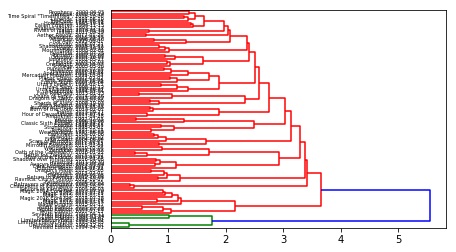

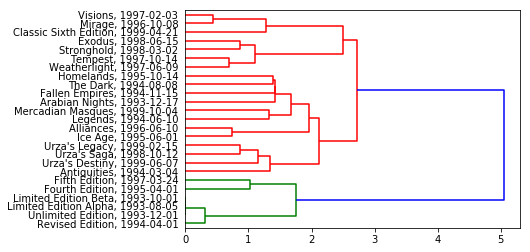

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(distances)
a = dendrogram(linkage_matrix, labels=names, orientation="right");
plt.show(a) 

linkage_matrixB = ward(distances[:25])
b = dendrogram(linkage_matrixB, labels=names[:25], orientation="right");
plt.show(b)

While there are too many names to make sense of the first entry, what is clear is that a certain few are coloured differently and largely offset from the rest. Upon furher inspection, we can see that the green cluster comprises the Alpha, Beta and Fourth Edition Sets, while the red cluster similarly consists of sets from Magic's early years. Temporaly, they're all situated at the very beggining of Magic the Gathering's development and perhaps illustrate a disjunction between earlier flavour texts and the subsequent ones which the developer's were able to learn from. 

In order to see this in a different, more decipherable light, I'll try displaying the data as a scatter plot instead:

In [20]:
## making a scatter plot in raw density
xvalues = positions[:, 0] # the left colunn (x axis) for all rows
yvalues = positions[: ,1] # the right column (y axis) for all rows

scatterList = []
for x, y, name, date in zip(xvalues, yvalues, names, namesInTuples):
    scatterList.append((x,y,name,date[1][:4]))

scatterPlotDF = pd.DataFrame(scatterList, columns=["X value", "Y value", "Set Name", "Release Date"])

scatterPlotDF.to_csv("mtgScatterPlotInfoWithDates.csv", index=False)

In [21]:
svg = """<svg width="847" height="500" xmlns="http://www.w3.org/2000/svg"><g><g class="x axis" transform="translate(0,465)" style="stroke-width: 1px; font-size: 10px; font-family: Arial, Helvetica;"><g class="tick" transform="translate(114.3249290608395,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">-0.6</text></g><g class="tick" transform="translate(220.20242304906952,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">-0.4</text></g><g class="tick" transform="translate(326.07991703729954,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">-0.2</text></g><g class="tick" transform="translate(431.9574110255296,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">-0.0</text></g><g class="tick" transform="translate(537.8349050137596,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">0.2</text></g><g class="tick" transform="translate(643.7123990019895,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">0.4</text></g><g class="tick" transform="translate(749.5898929902197,0)" style="opacity: 1;"><line y2="-450" x2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text y="3" x="0" dy=".71em" style="text-anchor: middle;">0.6</text></g><path class="domain" d="M15,-450V0H832V-450" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></path></g><g class="y axis" transform="translate(15,0)" style="stroke-width: 1px; font-size: 10px; font-family: Arial, Helvetica;"><g class="tick" transform="translate(0,431.54736574027345)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">-0.6</text></g><g class="tick" transform="translate(0,370.8048778330519)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">-0.4</text></g><g class="tick" transform="translate(0,310.0623899258303)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">-0.2</text></g><g class="tick" transform="translate(0,249.3199020186088)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">-0.0</text></g><g class="tick" transform="translate(0,188.57741411138716)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">0.2</text></g><g class="tick" transform="translate(0,127.83492620416564)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">0.4</text></g><g class="tick" transform="translate(0,67.09243829694412)" style="opacity: 1;"><line x2="817" y2="0" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></line><text x="-3" y="0" dy=".32em" style="text-anchor: end;">0.6</text></g><path class="domain" d="M817,15H0V465H817" style="shape-rendering: crispedges; fill: none; stroke: rgb(204, 204, 204);"></path></g><g class="circle"><circle transform="translate(15,285.34925714451083)" r="15" style="fill: rgb(189, 209, 64); fill-opacity: 0.9;"></circle><text transform="translate(15,285.34925714451083)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Commander's Arsenal</text></g><g class="circle"><circle transform="translate(47.49820672021582,169.02438017329956)" r="15" style="fill: rgb(191, 105, 141); fill-opacity: 0.9;"></circle><text transform="translate(47.49820672021582,169.02438017329956)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Homelands</text></g><g class="circle"><circle transform="translate(66.59068578069122,233.47101482750043)" r="15" style="fill: rgb(191, 105, 151); fill-opacity: 0.9;"></circle><text transform="translate(66.59068578069122,233.47101482750043)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">The Dark</text></g><g class="circle"><circle transform="translate(72.28399087283452,203.79727748692642)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(72.28399087283452,203.79727748692642)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Mercadian Masques</text></g><g class="circle"><circle transform="translate(76.68577207895052,329.078407732664)" r="15" style="fill: rgb(235, 169, 41); fill-opacity: 0.9;"></circle><text transform="translate(76.68577207895052,329.078407732664)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Fate Reforged</text></g><g class="circle"><circle transform="translate(79.53551003847457,267.3479906642534)" r="15" style="fill: rgb(133, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(79.53551003847457,267.3479906642534)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Torment</text></g><g class="circle"><circle transform="translate(84.5768246540436,371.4662621165856)" r="15" style="fill: rgb(235, 169, 41); fill-opacity: 0.9;"></circle><text transform="translate(84.5768246540436,371.4662621165856)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Dragons of Tarkir</text></g><g class="circle"><circle transform="translate(97.10051688301955,333.42042441046294)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(97.10051688301955,333.42042441046294)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Khans of Tarkir</text></g><g class="circle"><circle transform="translate(99.88061736472,121.20109915146077)" r="15" style="fill: rgb(191, 105, 151); fill-opacity: 0.9;"></circle><text transform="translate(99.88061736472,121.20109915146077)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Fallen Empires</text></g><g class="circle"><circle transform="translate(99.96174138306367,173.28154826861726)" r="15" style="fill: rgb(133, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(99.96174138306367,173.28154826861726)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Judgment</text></g><g class="circle"><circle transform="translate(131.582355830368,222.84619233218456)" r="15" style="fill: rgb(105, 114, 191); fill-opacity: 0.9;"></circle><text transform="translate(131.582355830368,222.84619233218456)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Scourge</text></g><g class="circle"><circle transform="translate(159.34518514198822,305.82488678579625)" r="15" style="fill: rgb(105, 191, 155); fill-opacity: 0.9;"></circle><text transform="translate(159.34518514198822,305.82488678579625)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Eventide</text></g><g class="circle"><circle transform="translate(163.2133791770103,126.40134672118427)" r="15" style="fill: rgb(184, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(163.2133791770103,126.40134672118427)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Weatherlight</text></g><g class="circle"><circle transform="translate(172.68419514211607,378.5938098092081)" r="15" style="fill: rgb(105, 191, 155); fill-opacity: 0.9;"></circle><text transform="translate(172.68419514211607,378.5938098092081)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Morningtide</text></g><g class="circle"><circle transform="translate(176.49167055534085,71.5572657746655)" r="15" style="fill: rgb(191, 105, 157); fill-opacity: 0.9;"></circle><text transform="translate(176.49167055534085,71.5572657746655)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Alliances</text></g><g class="circle"><circle transform="translate(188.12589572715345,186.99092087309486)" r="15" style="fill: rgb(105, 191, 139); fill-opacity: 0.9;"></circle><text transform="translate(188.12589572715345,186.99092087309486)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Alara Reborn</text></g><g class="circle"><circle transform="translate(188.20173510837407,393.7346907452478)" r="15" style="fill: rgb(105, 191, 170); fill-opacity: 0.9;"></circle><text transform="translate(188.20173510837407,393.7346907452478)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Lorwyn</text></g><g class="circle"><circle transform="translate(192.27642249985809,354.45595954211984)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(192.27642249985809,354.45595954211984)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Worldwake</text></g><g class="circle"><circle transform="translate(197.8122010854736,259.91617692348984)" r="15" style="fill: rgb(148, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(197.8122010854736,259.91617692348984)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Planeshift</text></g><g class="circle"><circle transform="translate(198.85091856985818,102.12952571623492)" r="15" style="fill: rgb(105, 191, 155); fill-opacity: 0.9;"></circle><text transform="translate(198.85091856985818,102.12952571623492)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Masters Edition II</text></g><g class="circle"><circle transform="translate(201.23226716294772,422.6183453430942)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(201.23226716294772,422.6183453430942)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Born of the Gods</text></g><g class="circle"><circle transform="translate(204.54457331817326,227.51964990510766)" r="15" style="fill: rgb(105, 191, 170); fill-opacity: 0.9;"></circle><text transform="translate(204.54457331817326,227.51964990510766)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Planar Chaos</text></g><g class="circle"><circle transform="translate(207.1616731594535,88.73804336457283)" r="15" style="fill: rgb(191, 105, 141); fill-opacity: 0.9;"></circle><text transform="translate(207.1616731594535,88.73804336457283)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Ice Age</text></g><g class="circle"><circle transform="translate(215.01359690479126,320.5508976012991)" r="15" style="fill: rgb(105, 191, 155); fill-opacity: 0.9;"></circle><text transform="translate(215.01359690479126,320.5508976012991)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Shadowmoor</text></g><g class="circle"><circle transform="translate(249.06992030163372,123.29636907781492)" r="15" style="fill: rgb(105, 191, 170); fill-opacity: 0.9;"></circle><text transform="translate(249.06992030163372,123.29636907781492)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Masters Edition</text></g><g class="circle"><circle transform="translate(263.6607038823308,237.04572160699203)" r="15" style="fill: rgb(133, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(263.6607038823308,237.04572160699203)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Onslaught</text></g><g class="circle"><circle transform="translate(265.4331803093511,437.90437823092077)" r="15" style="fill: rgb(105, 191, 181); fill-opacity: 0.9;"></circle><text transform="translate(265.4331803093511,437.90437823092077)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Dissension</text></g><g class="circle"><circle transform="translate(265.84521555813285,396.3367415210459)" r="15" style="fill: rgb(242, 218, 93); fill-opacity: 0.9;"></circle><text transform="translate(265.84521555813285,396.3367415210459)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Theros</text></g><g class="circle"><circle transform="translate(286.3998677437794,72.32915040004315)" r="15" style="fill: rgb(184, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(286.3998677437794,72.32915040004315)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Visions</text></g><g class="circle"><circle transform="translate(301.7455413008624,277.5028108452923)" r="15" style="fill: rgb(105, 191, 181); fill-opacity: 0.9;"></circle><text transform="translate(301.7455413008624,277.5028108452923)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Time Spiral</text></g><g class="circle"><circle transform="translate(307.69040810799754,446.7173495978573)" r="15" style="fill: rgb(105, 191, 181); fill-opacity: 0.9;"></circle><text transform="translate(307.69040810799754,446.7173495978573)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Guildpact</text></g><g class="circle"><circle transform="translate(310.49158338115,331.0921369033606)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(310.49158338115,331.0921369033606)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic: The Gathering-Commander</text></g><g class="circle"><circle transform="translate(312.8848576074222,91.235651118161)" r="15" style="fill: rgb(191, 105, 157); fill-opacity: 0.9;"></circle><text transform="translate(312.8848576074222,91.235651118161)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Mirage</text></g><g class="circle"><circle transform="translate(319.1424340964634,15)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(319.1424340964634,15)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Portal Three Kingdoms</text></g><g class="circle"><circle transform="translate(321.07572077910646,146.86754258308486)" r="15" style="fill: rgb(191, 105, 151); fill-opacity: 0.9;"></circle><text transform="translate(321.07572077910646,146.86754258308486)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Legends</text></g><g class="circle"><circle transform="translate(328.07086108047196,43.09465529949239)" r="15" style="fill: rgb(105, 191, 139); fill-opacity: 0.9;"></circle><text transform="translate(328.07086108047196,43.09465529949239)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Masters Edition III</text></g><g class="circle"><circle transform="translate(328.4385276473643,214.90863008036408)" r="15" style="fill: rgb(184, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(328.4385276473643,214.90863008036408)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Portal</text></g><g class="circle"><circle transform="translate(341.6095242536213,456.9248596036164)" r="15" style="fill: rgb(242, 218, 93); fill-opacity: 0.9;"></circle><text transform="translate(341.6095242536213,456.9248596036164)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Gatecrash</text></g><g class="circle"><circle transform="translate(360.55497479939754,382.2117440964024)" r="15" style="fill: rgb(105, 191, 155); fill-opacity: 0.9;"></circle><text transform="translate(360.55497479939754,382.2117440964024)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Shards of Alara</text></g><g class="circle"><circle transform="translate(360.61644241480195,413.2837652252706)" r="15" style="fill: rgb(105, 191, 139); fill-opacity: 0.9;"></circle><text transform="translate(360.61644241480195,413.2837652252706)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Conflux</text></g><g class="circle"><circle transform="translate(364.6377802872126,168.90442108999616)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(364.6377802872126,168.90442108999616)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Vintage Masters</text></g><g class="circle"><circle transform="translate(371.62404334318506,456.52166237414116)" r="15" style="fill: rgb(189, 209, 64); fill-opacity: 0.9;"></circle><text transform="translate(371.62404334318506,456.52166237414116)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Return to Ravnica</text></g><g class="circle"><circle transform="translate(380.39148867729153,338.6808051781255)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(380.39148867729153,338.6808051781255)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2015 Core Set</text></g><g class="circle"><circle transform="translate(383.0069663823784,81.04595105334721)" r="15" style="fill: rgb(184, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(383.0069663823784,81.04595105334721)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Tempest</text></g><g class="circle"><circle transform="translate(397.0752725906258,135.23105703603864)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(397.0752725906258,135.23105703603864)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Classic Sixth Edition</text></g><g class="circle"><circle transform="translate(402.8705222460051,231.65122847210898)" r="15" style="fill: rgb(148, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(402.8705222460051,231.65122847210898)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Seventh Edition</text></g><g class="circle"><circle transform="translate(409.45953691946,60.22757076820113)" r="15" style="fill: rgb(179, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(409.45953691946,60.22757076820113)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Stronghold</text></g><g class="circle"><circle transform="translate(420.06851212985225,291.3324746451208)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(420.06851212985225,291.3324746451208)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2012</text></g><g class="circle"><circle transform="translate(426.84031042169323,432.4551146609159)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(426.84031042169323,432.4551146609159)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Journey into Nyx</text></g><g class="circle"><circle transform="translate(430.055820028675,465)" r="15" style="fill: rgb(105, 191, 181); fill-opacity: 0.9;"></circle><text transform="translate(430.055820028675,465)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Coldsnap</text></g><g class="circle"><circle transform="translate(435.418672115102,36.90476756612395)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(435.418672115102,36.90476756612395)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Nemesis</text></g><g class="circle"><circle transform="translate(442.009908065688,322.2147121645521)" r="15" style="fill: rgb(189, 209, 64); fill-opacity: 0.9;"></circle><text transform="translate(442.009908065688,322.2147121645521)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2013</text></g><g class="circle"><circle transform="translate(444.0786363435127,222.5699845452919)" r="15" style="fill: rgb(105, 191, 170); fill-opacity: 0.9;"></circle><text transform="translate(444.0786363435127,222.5699845452919)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Tenth Edition</text></g><g class="circle"><circle transform="translate(463.7732597644742,361.6955342658887)" r="15" style="fill: rgb(242, 218, 93); fill-opacity: 0.9;"></circle><text transform="translate(463.7732597644742,361.6955342658887)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Commander 2013 Edition</text></g><g class="circle"><circle transform="translate(471.731985922725,149.5619331428323)" r="15" style="fill: rgb(184, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(471.731985922725,149.5619331428323)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Fifth Edition</text></g><g class="circle"><circle transform="translate(480.0783528401541,202.75713282865433)" r="15" style="fill: rgb(105, 176, 191); fill-opacity: 0.9;"></circle><text transform="translate(480.0783528401541,202.75713282865433)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Ninth Edition</text></g><g class="circle"><circle transform="translate(487.5904234939372,447.00726984391144)" r="15" style="fill: rgb(179, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(487.5904234939372,447.00726984391144)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Portal Second Age</text></g><g class="circle"><circle transform="translate(488.9484390788299,101.42862479802352)" r="15" style="fill: rgb(179, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(488.9484390788299,101.42862479802352)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Urza's Saga</text></g><g class="circle"><circle transform="translate(491.8405199777341,215.07299713763388)" r="15" style="fill: rgb(105, 114, 191); fill-opacity: 0.9;"></circle><text transform="translate(491.8405199777341,215.07299713763388)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Eighth Edition</text></g><g class="circle"><circle transform="translate(492.27514258739336,51.59971730034766)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(492.27514258739336,51.59971730034766)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Urza's Legacy</text></g><g class="circle"><circle transform="translate(504.382872147691,268.1699384454927)" r="15" style="fill: rgb(105, 191, 139); fill-opacity: 0.9;"></circle><text transform="translate(504.382872147691,268.1699384454927)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2010</text></g><g class="circle"><circle transform="translate(506.91776117447,408.9169638631031)" r="15" style="fill: rgb(105, 176, 191); fill-opacity: 0.9;"></circle><text transform="translate(506.91776117447,408.9169638631031)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Ravnica: City of Guilds</text></g><g class="circle"><circle transform="translate(507.8496516100985,324.12491518211385)" r="15" style="fill: rgb(242, 218, 93); fill-opacity: 0.9;"></circle><text transform="translate(507.8496516100985,324.12491518211385)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2014 Core Set</text></g><g class="circle"><circle transform="translate(534.6392603140508,289.92055767513443)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(534.6392603140508,289.92055767513443)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Magic 2011</text></g><g class="circle"><circle transform="translate(542.5770778756637,71.75332658460638)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(542.5770778756637,71.75332658460638)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Masters Edition IV</text></g><g class="circle"><circle transform="translate(548.7881085542258,29.840961898575017)" r="15" style="fill: rgb(191, 105, 151); fill-opacity: 0.9;"></circle><text transform="translate(548.7881085542258,29.840961898575017)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Antiquities</text></g><g class="circle"><circle transform="translate(558.509042428266,453.38409524657914)" r="15" style="fill: rgb(105, 176, 191); fill-opacity: 0.9;"></circle><text transform="translate(558.509042428266,453.38409524657914)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Saviors of Kamigawa</text></g><g class="circle"><circle transform="translate(571.5388693277391,133.84683403640219)" r="15" style="fill: rgb(191, 105, 141); fill-opacity: 0.9;"></circle><text transform="translate(571.5388693277391,133.84683403640219)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Fourth Edition</text></g><g class="circle"><circle transform="translate(574.3606915133018,459.9883271093762)" r="15" style="fill: rgb(105, 155, 191); fill-opacity: 0.9;"></circle><text transform="translate(574.3606915133018,459.9883271093762)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Champions of Kamigawa</text></g><g class="circle"><circle transform="translate(580.2259179041712,55.726155981625766)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(580.2259179041712,55.726155981625766)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Urza's Destiny</text></g><g class="circle"><circle transform="translate(581.9897333299463,317.95208744222464)" r="15" style="fill: rgb(148, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(581.9897333299463,317.95208744222464)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Odyssey</text></g><g class="circle"><circle transform="translate(593.1586183060841,458.1910763043195)" r="15" style="fill: rgb(105, 176, 191); fill-opacity: 0.9;"></circle><text transform="translate(593.1586183060841,458.1910763043195)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Betrayers of Kamigawa</text></g><g class="circle"><circle transform="translate(602.3125290096823,428.8412492144691)" r="15" style="fill: rgb(242, 218, 93); fill-opacity: 0.9;"></circle><text transform="translate(602.3125290096823,428.8412492144691)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Dragon's Maze</text></g><g class="circle"><circle transform="translate(606.2577106314045,195.0279063664567)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(606.2577106314045,195.0279063664567)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Invasion</text></g><g class="circle"><circle transform="translate(614.7763244351614,263.40372224253497)" r="15" style="fill: rgb(212, 143, 39); fill-opacity: 0.9;"></circle><text transform="translate(614.7763244351614,263.40372224253497)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Commander 2014</text></g><g class="circle"><circle transform="translate(616.0055993130417,126.77660936988593)" r="15" style="fill: rgb(191, 105, 151); fill-opacity: 0.9;"></circle><text transform="translate(616.0055993130417,126.77660936988593)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Revised Edition</text></g><g class="circle"><circle transform="translate(625.9006333301552,358.0364253207668)" r="15" style="fill: rgb(148, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(625.9006333301552,358.0364253207668)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Apocalypse</text></g><g class="circle"><circle transform="translate(628.0632659628169,128.73087761778896)" r="15" style="fill: rgb(191, 105, 115); fill-opacity: 0.9;"></circle><text transform="translate(628.0632659628169,128.73087761778896)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Unlimited Edition</text></g><g class="circle"><circle transform="translate(628.0632659628169,128.73087761778908)" r="15" style="fill: rgb(191, 105, 115); fill-opacity: 0.9;"></circle><text transform="translate(628.0632659628169,128.73087761778908)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Limited Edition Alpha</text></g><g class="circle"><circle transform="translate(628.0632659628169,128.73087761778908)" r="15" style="fill: rgb(191, 105, 115); fill-opacity: 0.9;"></circle><text transform="translate(628.0632659628169,128.73087761778908)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Limited Edition Beta</text></g><g class="circle"><circle transform="translate(630.9661129995193,386.1684716021764)" r="15" style="fill: rgb(105, 191, 170); fill-opacity: 0.9;"></circle><text transform="translate(630.9661129995193,386.1684716021764)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Future Sight</text></g><g class="circle"><circle transform="translate(641.0051547859491,63.375369823980634)" r="15" style="fill: rgb(105, 191, 181); fill-opacity: 0.9;"></circle><text transform="translate(641.0051547859491,63.375369823980634)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Time Spiral "Timeshifted"</text></g><g class="circle"><circle transform="translate(674.9447702394922,202.80661400953807)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(674.9447702394922,202.80661400953807)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Starter 1999</text></g><g class="circle"><circle transform="translate(683.0443161606274,337.62390091793145)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(683.0443161606274,337.62390091793145)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Innistrad</text></g><g class="circle"><circle transform="translate(689.5781750963669,278.30076596631807)" r="15" style="fill: rgb(105, 191, 139); fill-opacity: 0.9;"></circle><text transform="translate(689.5781750963669,278.30076596631807)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Zendikar</text></g><g class="circle"><circle transform="translate(689.9891253481466,96.63839923063495)" r="15" style="fill: rgb(191, 105, 157); fill-opacity: 0.9;"></circle><text transform="translate(689.9891253481466,96.63839923063495)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Introductory Two-Player Set</text></g><g class="circle"><circle transform="translate(690.3144878622459,409.22486456678485)" r="15" style="fill: rgb(105, 114, 191); fill-opacity: 0.9;"></circle><text transform="translate(690.3144878622459,409.22486456678485)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Legions</text></g><g class="circle"><circle transform="translate(724.3245398226505,298.7003407717682)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(724.3245398226505,298.7003407717682)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Rise of the Eldrazi</text></g><g class="circle"><circle transform="translate(728.8178191126959,356.06940525298836)" r="15" style="fill: rgb(189, 209, 64); fill-opacity: 0.9;"></circle><text transform="translate(728.8178191126959,356.06940525298836)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Avacyn Restored</text></g><g class="circle"><circle transform="translate(732.0133316611035,129.14023002514824)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(732.0133316611035,129.14023002514824)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Starter 2000</text></g><g class="circle"><circle transform="translate(733.0051413336435,167.57084010554132)" r="15" style="fill: rgb(179, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(733.0051413336435,167.57084010554132)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Exodus</text></g><g class="circle"><circle transform="translate(745.8006771888702,341.69103561183726)" r="15" style="fill: rgb(189, 209, 64); fill-opacity: 0.9;"></circle><text transform="translate(745.8006771888702,341.69103561183726)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Dark Ascension</text></g><g class="circle"><circle transform="translate(747.4026348411955,381.04829891922077)" r="15" style="fill: rgb(163, 105, 191); fill-opacity: 0.9;"></circle><text transform="translate(747.4026348411955,381.04829891922077)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Prophecy</text></g><g class="circle"><circle transform="translate(769.3219623702726,248.12169010245816)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(769.3219623702726,248.12169010245816)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Scars of Mirrodin</text></g><g class="circle"><circle transform="translate(779.5032632192896,287.8708771189041)" r="15" style="fill: rgb(105, 155, 191); fill-opacity: 0.9;"></circle><text transform="translate(779.5032632192896,287.8708771189041)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Fifth Dawn</text></g><g class="circle"><circle transform="translate(789.6361239849634,228.68826737377785)" r="15" style="fill: rgb(105, 114, 191); fill-opacity: 0.9;"></circle><text transform="translate(789.6361239849634,228.68826737377785)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Mirrodin</text></g><g class="circle"><circle transform="translate(790.936306214551,211.2927618135899)" r="15" style="fill: rgb(105, 155, 191); fill-opacity: 0.9;"></circle><text transform="translate(790.936306214551,211.2927618135899)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Darksteel</text></g><g class="circle"><circle transform="translate(807.3314822303881,139.0190573377094)" r="15" style="fill: rgb(191, 105, 115); fill-opacity: 0.9;"></circle><text transform="translate(807.3314822303881,139.0190573377094)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Arabian Nights</text></g><g class="circle"><circle transform="translate(819.2701873486475,278.69347488905385)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(819.2701873486475,278.69347488905385)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">Mirrodin Besieged</text></g><g class="circle"><circle transform="translate(832,252.92191280992404)" r="15" style="fill: rgb(107, 191, 105); fill-opacity: 0.9;"></circle><text transform="translate(832,252.92191280992404)" text-anchor="middle" dy="15" style="font-size: 10px; font-family: Arial, Helvetica;">New Phyrexia</text></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g><g class="point"><circle></circle></g></g></svg>"""

HTML(svg)

Well, at first this looks rather uninformative and presents a widespread distribution of sets with little positional patterns. The colour placement, however, seems to be a bit more revealing. When making this graph I manually scaled the colour by the release date for each set, with the earliest ones being pink/purple and the most recent being yellow/orange. There's a stark contrast, then, between the top half of the graph--the sets with positive tf-idf vectorized Yscores--and the bottom half. Judging by the few teal and light green circles appearing clustered with the purple ones, this shift appears to be happening in the mid 2000s. There are noticeable exceptions, of course, like the Time Spiral "Timeshifted" set which, suprisingly, fits quite well as an outlier amongst the other purples! This 'set' is really a subsection of Time Spiral, which was thematically centered around time and nostalgia, and features reprints of cards from each of the earlier publications. In this light, seing it completely apart from the rest of Time Spiral and amongst the older expansions makes perfect sense and help visually represent a chronological jump which could be tied in to an overarching narrative.

Other colour clumps can be seen, too. In our dendrogram we saw that the alpha, beta and fourth edition sets were somewhat excised from the primary blue group. And while it is made more clear in the dendrogram, here we can see that the sets lie in a small cluster that's slightly isolated from a surrounding ring. The point here is that this vectorized TF-IDF model shows at least some kind of progression and discrepency between sets over time. While it may not tell us what kind of story emerges, that something changes from momement to moment--that Darkscensions/Innistrad/Avacyn Restored are linked in a way that is radically different from how Fate Reforged/Khans/Dragons of Tarkir are--is indicative of some kind of prgoression in flavour text across time. To examine this further, I'd like to look at some of the more common TF-IDF words, and then use sentiment analysis to possibly find more trends. 

### <a id='topterms'></a> 3.2 TF-IDF Top Terms

The above graphs relied on a compressed document term matrix that was then vectorized. Instead of compressing the data, here I'm going to sort the different values by the few most common, or most unique, words per each set. With that being done, I figured an alluvial graph could be one useful way to show the flows between sets and the long list top terms. While some of the words might be difficult to work out, I'm hoping that by sorting the graph by set in chronological order some telling flows might emerge. 

In [110]:
terms = tfidfVectorizer.get_feature_names()
names = [setName[0][:4] + " "+ setName[2] for setName in fullMTGListFiltered]

tfidfMatrix = pd.DataFrame(mtgDocumentTermMatrix.toarray(), index=names, columns=terms)


In [113]:
for name, series in tfidfMatrix.iterrows():
    print(series)

abandon         0.000000
abandoned       0.000000
abandoning      0.000000
abar            0.036973
abbey           0.000000
aberrant        0.036973
abilities       0.000000
ability         0.019377
able            0.000000
aboard          0.000000
abomination     0.000000
abominations    0.000000
absence         0.000000
absolute        0.000000
absolutely      0.000000
absolution      0.000000
absorb          0.000000
absorbs         0.000000
absurd          0.035273
abundance       0.000000
abuse           0.000000
abyss           0.000000
abzan           0.000000
academy         0.000000
accept          0.000000
accepted        0.000000
access          0.000000
accompanies     0.000000
accomplished    0.000000
accordance      0.000000
                  ...   
ye              0.000000
yeah            0.028063
year            0.022744
yearning        0.000000
yearns          0.000000
years           0.014786
yes             0.000000
yesterday       0.000000
yield           0.000000


In [112]:
documentTopTerms = [] # for each document we want the top few terms
for name, series in tfidfMatrix.iterrows(): # gives a tuple of(name/index, series -- a data type of pandas)
    # each row of values, the series, is sorted alphabetically; we want to reorder them by highest value
    series.order(ascending=False, inplace=True) # inplace not only returns a value, but modifies the tfidfMatrix
    for term, tfidf in series[0:5].iteritems():
        documentTopTerms.append((name, term, tfidf))

TypeError: 'numpy.float64' object is not callable

In [107]:
topTermsDF = pd.DataFrame(documentTopTerms, columns=["File", "Term", "tf-idf"])

In [108]:
topTermsDF.to_csv("mtgTopFiveTerms.csv", index=False)

In [109]:
svg2 = """<svg width="700" height="1320" xmlns="http://www.w3.org/2000/svg"><g transform="translate(0,10)"><g><path class="link" d="M8,649.26239547156C350,649.26239547156 350,565.8667420128951 692,565.8667420128951" style="stroke-width: 2.64388687381732px; fill: none; stroke: rgb(105, 191, 188); stroke-opacity: 0.4;"></path><path class="link" d="M8,516.3534706010265C350,516.3534706010265 350,176.9612835817453 692,176.9612835817453" style="stroke-width: 2.23263285487962px; fill: none; stroke: rgb(135, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,812.2455730988993C350,812.2455730988993 350,301.25946564785716 692,301.25946564785716" style="stroke-width: 2.20474847283776px; fill: none; stroke: rgb(158, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,691.043615219168C350,691.043615219168 350,570.1477802914011 692,570.1477802914011" style="stroke-width: 2.14750379694187px; fill: none; stroke: rgb(105, 160, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,478.09739059674087C350,478.09739059674087 350,1252.7707263139964 692,1252.7707263139964" style="stroke-width: 2.13575730703377px; fill: none; stroke: rgb(169, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,384.1388869815868C350,384.1388869815868 350,988.7755893786402 692,988.7755893786402" style="stroke-width: 1.94298699886997px; fill: none; stroke: rgb(191, 133, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,670.7002900629304C350,670.7002900629304 350,568.1313569213669 692,568.1313569213669" style="stroke-width: 1.88534294312635px; fill: none; stroke: rgb(105, 177, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,376.78824405091257C350,376.78824405091257 350,1187.08278095154 692,1187.08278095154" style="stroke-width: 1.74778445981434px; fill: none; stroke: rgb(191, 128, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,685.405753633786C350,685.405753633786 350,923.3546096100293 692,923.3546096100293" style="stroke-width: 1.58097266628831px; fill: none; stroke: rgb(105, 165, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,498.3955502499696C350,498.3955502499696 350,1233.1232380229226 692,1233.1232380229226" style="stroke-width: 1.56154316193349px; fill: none; stroke: rgb(152, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,636.2356710730958C350,636.2356710730958 350,761.4386826024166 692,761.4386826024166" style="stroke-width: 1.49480823896041px; fill: none; stroke: rgb(105, 191, 177); stroke-opacity: 0.4;"></path><path class="link" d="M8,937.7865208915114C350,937.7865208915114 350,277.89359397143295 692,277.89359397143295" style="stroke-width: 1.4432539729764px; fill: none; stroke: rgb(191, 105, 116); stroke-opacity: 0.4;"></path><path class="link" d="M8,706.5657574469632C350,706.5657574469632 350,914.2694738526714 692,914.2694738526714" style="stroke-width: 1.40500079147097px; fill: none; stroke: rgb(105, 148, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,382.00106394787986C350,382.00106394787986 350,313.72239969399493 692,313.72239969399493" style="stroke-width: 1.39911062806201px; fill: none; stroke: rgb(191, 133, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,595.7294278678659C350,595.7294278678659 350,868.111136301509 692,868.111136301509" style="stroke-width: 1.39530898304184px; fill: none; stroke: rgb(105, 191, 143); stroke-opacity: 0.4;"></path><path class="link" d="M8,941.206405305738C350,941.206405305738 350,1048.5873602321972 692,1048.5873602321972" style="stroke-width: 1.38050380023829px; fill: none; stroke: rgb(191, 105, 116); stroke-opacity: 0.4;"></path><path class="link" d="M8,857.2249931284526C350,857.2249931284526 350,85.5228739261986 692,85.5228739261986" style="stroke-width: 1.36745548074321px; fill: none; stroke: rgb(191, 105, 184); stroke-opacity: 0.4;"></path><path class="link" d="M8,629.3727148038569C350,629.3727148038569 350,959.840144777404 692,959.840144777404" style="stroke-width: 1.30614128928494px; fill: none; stroke: rgb(105, 191, 171); stroke-opacity: 0.4;"></path><path class="link" d="M8,699.8508293590749C350,699.8508293590749 350,955.400042899671 692,955.400042899671" style="stroke-width: 1.29380768911103px; fill: none; stroke: rgb(105, 154, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,713.6442484313469C350,713.6442484313469 350,449.207505314112 692,449.207505314112" style="stroke-width: 1.29265215181098px; fill: none; stroke: rgb(105, 143, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,947.4025235909908C350,947.4025235909908 350,692.2892330978083 692,692.2892330978083" style="stroke-width: 1.29040308905376px; fill: none; stroke: rgb(191, 105, 111); stroke-opacity: 0.4;"></path><path class="link" d="M8,788.7676077576388C350,788.7676077576388 350,334.99620625316084 692,334.99620625316084" style="stroke-width: 1.28165003635185px; fill: none; stroke: rgb(135, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,790.6088706825461C350,790.6088706825461 350,548.5737816339644 692,548.5737816339644" style="stroke-width: 1.28165003635185px; fill: none; stroke: rgb(135, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,787.4859577212869C350,787.4859577212869 350,100.46683988356168 692,100.46683988356168" style="stroke-width: 1.28165003635185px; fill: none; stroke: rgb(135, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,385.7476467517667C350,385.7476467517667 350,1227.0920772572515 692,1227.0920772572515" style="stroke-width: 1.27453254148985px; fill: none; stroke: rgb(191, 133, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,672.2714091822024C350,672.2714091822024 350,575.8330856496517 692,575.8330856496517" style="stroke-width: 1.25689529541757px; fill: none; stroke: rgb(105, 177, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,936.4373921776421C350,936.4373921776421 350,63.962361877413414 692,63.962361877413414" style="stroke-width: 1.25500345476208px; fill: none; stroke: rgb(191, 105, 116); stroke-opacity: 0.4;"></path><path class="link" d="M8,430.9293487203853C350,430.9293487203853 350,627.4863093691778 692,627.4863093691778" style="stroke-width: 1.25276886275629px; fill: none; stroke: rgb(191, 173, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,781.2269544467607C350,781.2269544467607 350,339.39617696025647 692,339.39617696025647" style="stroke-width: 1.23803660076942px; fill: none; stroke: rgb(130, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,462.8276137924247C350,462.8276137924247 350,1251.0879798870344 692,1251.0879798870344" style="stroke-width: 1.22973554689065px; fill: none; stroke: rgb(180, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,615.7912210904606C350,615.7912210904606 350,168.21170843863214 692,168.21170843863214" style="stroke-width: 1.19630273800772px; fill: none; stroke: rgb(105, 191, 160); stroke-opacity: 0.4;"></path><path class="link" d="M8,642.3999801673548C350,642.3999801673548 350,145.15766231186421 692,145.15766231186421" style="stroke-width: 1.19618460842445px; fill: none; stroke: rgb(105, 191, 182); stroke-opacity: 0.4;"></path><path class="link" d="M8,657.0198308096769C350,657.0198308096769 350,711.5481818304157 692,711.5481818304157" style="stroke-width: 1.19567227952371px; fill: none; stroke: rgb(105, 188, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,876.896012401656C350,876.896012401656 350,524.7415954460596 692,524.7415954460596" style="stroke-width: 1.18578425559373px; fill: none; stroke: rgb(191, 105, 167); stroke-opacity: 0.4;"></path><path class="link" d="M8,926.0698111471107C350,926.0698111471107 350,1119.4460994768465 692,1119.4460994768465" style="stroke-width: 1.17476743755895px; fill: none; stroke: rgb(191, 105, 128); stroke-opacity: 0.4;"></path><path class="link" d="M8,538.5994931160844C350,538.5994931160844 350,1190.589941103431 692,1190.589941103431" style="stroke-width: 1.1565544668604px; fill: none; stroke: rgb(118, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,736.6196945605635C350,736.6196945605635 350,68.30717152683415 692,68.30717152683415" style="stroke-width: 1.15436106700931px; fill: none; stroke: rgb(105, 120, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,850.6133106280707C350,850.6133106280707 350,884.0094784926481 692,884.0094784926481" style="stroke-width: 1.14997551590627px; fill: none; stroke: rgb(191, 105, 190); stroke-opacity: 0.4;"></path><path class="link" d="M8,475.76938875345246C350,475.76938875345246 350,394.18108678512243 692,394.18108678512243" style="stroke-width: 1.14379317877912px; fill: none; stroke: rgb(169, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,552.3943256376831C350,552.3943256376831 350,1192.5766375242958 692,1192.5766375242958" style="stroke-width: 1.14277534904297px; fill: none; stroke: rgb(107, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,442.10577738297343C350,442.10577738297343 350,58.06334126002715 692,58.06334126002715" style="stroke-width: 1.12934054546498px; fill: none; stroke: rgb(191, 184, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,444.7673298642984C350,444.7673298642984 350,1098.8559899765746 692,1098.8559899765746" style="stroke-width: 1.12934054546498px; fill: none; stroke: rgb(191, 184, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,714.8445682866001C350,714.8445682866001 350,523.5947095389153 692,523.5947095389153" style="stroke-width: 1.10798755869512px; fill: none; stroke: rgb(105, 143, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,707.8202224393481C350,707.8202224393481 350,1052.9697041175004 692,1052.9697041175004" style="stroke-width: 1.10392919329862px; fill: none; stroke: rgb(105, 148, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,924.9317551919755C350,924.9317551919755 350,1093.7402513529155 692,1093.7402513529155" style="stroke-width: 1.10134447271151px; fill: none; stroke: rgb(191, 105, 128); stroke-opacity: 0.4;"></path><path class="link" d="M8,922.0740230113762C350,922.0740230113762 350,0.5506722363560523 692,0.5506722363560523" style="stroke-width: 1.10134447271151px; fill: none; stroke: rgb(191, 105, 128); stroke-opacity: 0.4;"></path><path class="link" d="M8,698.0263701958227C350,698.0263701958227 350,481.255435745163 692,481.255435745163" style="stroke-width: 1.09476035232471px; fill: none; stroke: rgb(105, 154, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,524.7153928641337C350,524.7153928641337 350,609.6434515160523 692,609.6434515160523" style="stroke-width: 1.08680152011836px; fill: none; stroke: rgb(130, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,945.5744525481646C350,945.5744525481646 350,1.639012426484209 692,1.639012426484209" style="stroke-width: 1.0753359075448px; fill: none; stroke: rgb(191, 105, 111); stroke-opacity: 0.4;"></path><path class="link" d="M8,767.5417259378828C350,767.5417259378828 350,619.5328099334353 692,619.5328099334353" style="stroke-width: 1.07451282267497px; fill: none; stroke: rgb(118, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,939.982776937345C350,939.982776937345 350,835.2842922210034 692,835.2842922210034" style="stroke-width: 1.06675293654777px; fill: none; stroke: rgb(191, 105, 116); stroke-opacity: 0.4;"></path><path class="link" d="M8,614.6599272278248C350,614.6599272278248 350,144.0264275140201 692,144.0264275140201" style="stroke-width: 1.06628498726374px; fill: none; stroke: rgb(105, 191, 160); stroke-opacity: 0.4;"></path><path class="link" d="M8,601.1209977249925C350,601.1209977249925 350,112.51477710545741 692,112.51477710545741" style="stroke-width: 1.06029275327511px; fill: none; stroke: rgb(105, 191, 148); stroke-opacity: 0.4;"></path><path class="link" d="M8,891.2198789503376C350,891.2198789503376 350,859.957500713052 692,859.957500713052" style="stroke-width: 1.04828436088238px; fill: none; stroke: rgb(191, 105, 156); stroke-opacity: 0.4;"></path><path class="link" d="M8,374.4237702606243C350,374.4237702606243 350,768.3391300547514 692,768.3391300547514" style="stroke-width: 1.04590058497576px; fill: none; stroke: rgb(191, 128, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,564.8387933476671C350,564.8387933476671 350,593.1702329225103 692,593.1702329225103" style="stroke-width: 1.04127596180396px; fill: none; stroke: rgb(105, 191, 114); stroke-opacity: 0.4;"></path><path class="link" d="M8,849.5193663723383C350,849.5193663723383 350,752.8916289295096 692,752.8916289295096" style="stroke-width: 1.03791299555858px; fill: none; stroke: rgb(191, 105, 190); stroke-opacity: 0.4;"></path><path class="link" d="M8,923.8671222016876C350,923.8671222016876 350,691.1300707993493 692,691.1300707993493" style="stroke-width: 1.02792150786408px; fill: none; stroke: rgb(191, 105, 128); stroke-opacity: 0.4;"></path><path class="link" d="M8,726.6952173331242C350,726.6952173331242 350,831.0970006095213 692,831.0970006095213" style="stroke-width: 1.02757550934626px; fill: none; stroke: rgb(105, 131, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,930.3095429092812C350,930.3095429092812 350,246.86176213487008 692,246.86176213487008" style="stroke-width: 1.02444130971196px; fill: none; stroke: rgb(191, 105, 122); stroke-opacity: 0.4;"></path><path class="link" d="M8,774.6949691238397C350,774.6949691238397 350,443.69989881477943 692,443.69989881477943" style="stroke-width: 1.02170867501528px; fill: none; stroke: rgb(124, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,417.55659828133963C350,417.55659828133963 350,1278.0427304656407 692,1278.0427304656407" style="stroke-width: 1.01411888800037px; fill: none; stroke: rgb(191, 162, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,415.77938902483686C350,415.77938902483686 350,1013.2673465739807 692,1013.2673465739807" style="stroke-width: 1.01325886614489px; fill: none; stroke: rgb(191, 162, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,830.5999431142902C350,830.5999431142902 350,84.33842974232513 692,84.33842974232513" style="stroke-width: 1.00143288700371px; fill: none; stroke: rgb(175, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,504.9536137253134C350,504.9536137253134 350,1189.511268311085 692,1189.511268311085" style="stroke-width: 1.00079111783206px; fill: none; stroke: rgb(146, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,490.8250600980953C350,490.8250600980953 350,901.4782328919059 692,901.4782328919059" style="stroke-width: 1px; fill: none; stroke: rgb(158, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,863.7567610998365C350,863.7567610998365 350,86.69201898630833 692,86.69201898630833" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 179); stroke-opacity: 0.4;"></path><path class="link" d="M8,404.57635556868985C350,404.57635556868985 350,1215.1602713258867 692,1215.1602713258867" style="stroke-width: 1px; fill: none; stroke: rgb(191, 150, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,525.7431285935024C350,525.7431285935024 350,1044.2726459742335 692,1044.2726459742335" style="stroke-width: 1px; fill: none; stroke: rgb(130, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,460.85614872620624C350,460.85614872620624 350,1201.1098959188055 692,1201.1098959188055" style="stroke-width: 1px; fill: none; stroke: rgb(180, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,608.0580777065502C350,608.0580777065502 350,143.00900697554948 692,143.00900697554948" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 154); stroke-opacity: 0.4;"></path><path class="link" d="M8,949.3918950199486C350,949.3918950199486 350,1120.5173843540213 692,1120.5173843540213" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 111); stroke-opacity: 0.4;"></path><path class="link" d="M8,375.43053618705875C350,375.43053618705875 350,1152.6731250261716 692,1152.6731250261716" style="stroke-width: 1px; fill: none; stroke: rgb(191, 128, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,626.6660475314276C350,626.6660475314276 350,748.7550211338475 692,748.7550211338475" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 171); stroke-opacity: 0.4;"></path><path class="link" d="M8,909.337270668874C350,909.337270668874 350,420.13389637828806 692,420.13389637828806" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 139); stroke-opacity: 0.4;"></path><path class="link" d="M8,519.1109351077401C350,519.1109351077401 350,725.6509185954986 692,725.6509185954986" style="stroke-width: 1px; fill: none; stroke: rgb(135, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,938.9787741735353C350,938.9787741735353 350,636.0711434373779 692,636.0711434373779" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 116); stroke-opacity: 0.4;"></path><path class="link" d="M8,563.8487542375403C350,563.8487542375403 350,589.0400664238485 692,589.0400664238485" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 114); stroke-opacity: 0.4;"></path><path class="link" d="M8,664.6992982562084C350,664.6992982562084 350,712.6153046801026 692,712.6153046801026" style="stroke-width: 1px; fill: none; stroke: rgb(105, 182, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,890.22675451321C350,890.22675451321 350,451.1648762129863 692,451.1648762129863" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 156); stroke-opacity: 0.4;"></path><path class="link" d="M8,556.5721315673447C350,556.5721315673447 350,209.6379008627829 692,209.6379008627829" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 109); stroke-opacity: 0.4;"></path><path class="link" d="M8,875.8393841161976C350,875.8393841161976 350,94.76293712449316 692,94.76293712449316" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 167); stroke-opacity: 0.4;"></path><path class="link" d="M8,543.9690961787173C350,543.9690961787173 350,909.9654329705799 692,909.9654329705799" style="stroke-width: 1px; fill: none; stroke: rgb(113, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,852.9398433348532C350,852.9398433348532 350,1237.8555747325056 692,1237.8555747325056" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 190); stroke-opacity: 0.4;"></path><path class="link" d="M8,658.0780762177708C350,658.0780762177708 350,762.6464959902289 692,762.6464959902289" style="stroke-width: 1px; fill: none; stroke: rgb(105, 188, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,692.5775465026979C350,692.5775465026979 350,576.9217126824194 692,576.9217126824194" style="stroke-width: 1px; fill: none; stroke: rgb(105, 160, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,603.3664227874316C350,603.3664227874316 350,997.2014679774453 692,997.2014679774453" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 148); stroke-opacity: 0.4;"></path><path class="link" d="M8,401.298777731756C350,401.298777731756 350,265.7866746870595 692,265.7866746870595" style="stroke-width: 1px; fill: none; stroke: rgb(191, 150, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,402.20631228482455C350,402.20631228482455 350,679.2092416429343 692,679.2092416429343" style="stroke-width: 1px; fill: none; stroke: rgb(191, 150, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,844.0607511076515C350,844.0607511076515 350,893.3850030659906 692,893.3850030659906" style="stroke-width: 1px; fill: none; stroke: rgb(186, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,429.08792206789286C350,429.08792206789286 350,221.0209225283079 692,221.0209225283079" style="stroke-width: 1px; fill: none; stroke: rgb(191, 173, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,665.6203474483257C350,665.6203474483257 350,763.5586677407531 692,763.5586677407531" style="stroke-width: 1px; fill: none; stroke: rgb(105, 182, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,638.2106160948917C350,638.2106160948917 350,1206.5091075626337 692,1206.5091075626337" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 177); stroke-opacity: 0.4;"></path><path class="link" d="M8,904.4036733261341C350,904.4036733261341 350,1137.2333672889201 692,1137.2333672889201" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 145); stroke-opacity: 0.4;"></path><path class="link" d="M8,443.11882588652554C350,443.11882588652554 350,358.12813114312337 692,358.12813114312337" style="stroke-width: 1px; fill: none; stroke: rgb(191, 184, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,431.9994221239897C350,431.9994221239897 350,1070.4992515741433 692,1070.4992515741433" style="stroke-width: 1px; fill: none; stroke: rgb(191, 173, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,503.4046514948757C350,503.4046514948757 350,407.8981905693539 692,407.8981905693539" style="stroke-width: 1px; fill: none; stroke: rgb(146, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,565.7980351662802C350,565.7980351662802 350,597.8288708122815 692,597.8288708122815" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 114); stroke-opacity: 0.4;"></path><path class="link" d="M8,459.93435728864876C350,459.93435728864876 350,393.1717288535992 692,393.1717288535992" style="stroke-width: 1px; fill: none; stroke: rgb(180, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,461.77661242030473C350,461.77661242030473 350,1231.3056045152061 692,1231.3056045152061" style="stroke-width: 1px; fill: none; stroke: rgb(180, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,908.4280372528633C350,908.4280372528633 350,321.84752582564806 692,321.84752582564806" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 139); stroke-opacity: 0.4;"></path><path class="link" d="M8,911.5365312430457C350,911.5365312430457 350,1132.6702906195135 692,1132.6702906195135" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 139); stroke-opacity: 0.4;"></path><path class="link" d="M8,948.4778594985356C350,948.4778594985356 350,1094.7210579522894 692,1094.7210579522894" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 111); stroke-opacity: 0.4;"></path><path class="link" d="M8,627.5734648679841C350,627.5734648679841 350,897.408750032101 692,897.408750032101" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 171); stroke-opacity: 0.4;"></path><path class="link" d="M8,630.4556788757081C350,630.4556788757081 350,1065.5934497566548 692,1065.5934497566548" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 171); stroke-opacity: 0.4;"></path><path class="link" d="M8,403.6617395236788C350,403.6617395236788 350,716.6540016195568 692,716.6540016195568" style="stroke-width: 1px; fill: none; stroke: rgb(191, 150, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,467.8070671901382C350,467.8070671901382 350,59.056175840631596 692,59.056175840631596" style="stroke-width: 1px; fill: none; stroke: rgb(175, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,470.3198296376465C350,470.3198296376465 350,1099.8488245571793 692,1099.8488245571793" style="stroke-width: 1px; fill: none; stroke: rgb(175, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,866.2052130435452C350,866.2052130435452 350,1141.2475980766596 692,1141.2475980766596" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 179); stroke-opacity: 0.4;"></path><path class="link" d="M8,773.7598359405953C350,773.7598359405953 350,333.9311023892483 692,333.9311023892483" style="stroke-width: 1px; fill: none; stroke: rgb(124, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,468.65910919247136C350,468.65910919247136 350,359.0003870684043 692,359.0003870684043" style="stroke-width: 1px; fill: none; stroke: rgb(175, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,683.0471937371071C350,683.0471937371071 350,138.1513716490632 692,138.1513716490632" style="stroke-width: 1px; fill: none; stroke: rgb(105, 165, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,739.059343996392C350,739.059343996392 350,674.5237368794756 692,674.5237368794756" style="stroke-width: 1px; fill: none; stroke: rgb(105, 120, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,651.0058281202366C350,651.0058281202366 350,574.7831487901749 692,574.7831487901749" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 188); stroke-opacity: 0.4;"></path><path class="link" d="M8,882.8835462042216C350,882.8835462042216 350,450.2748626731587 692,450.2748626731587" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 162); stroke-opacity: 0.4;"></path><path class="link" d="M8,791.6694053671387C350,791.6694053671387 350,792.9635978105651 692,792.9635978105651" style="stroke-width: 1px; fill: none; stroke: rgb(135, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,544.8490250329951C350,544.8490250329951 350,1191.5867340933178 692,1191.5867340933178" style="stroke-width: 1px; fill: none; stroke: rgb(113, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,760.5217410314556C350,760.5217410314556 350,367.52888309269974 692,367.52888309269974" style="stroke-width: 1px; fill: none; stroke: rgb(113, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,769.008664662893C350,769.008664662893 350,1032.518747191926 692,1032.518747191926" style="stroke-width: 1px; fill: none; stroke: rgb(118, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,414.8584823560358C350,414.8584823560358 350,104.6620695260013 692,104.6620695260013" style="stroke-width: 1px; fill: none; stroke: rgb(191, 162, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,350.5380331459203C350,350.5380331459203 350,24.454289663551563 692,24.454289663551563" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,739.8910280152618C350,739.8910280152618 350,733.5079797814534 692,733.5079797814534" style="stroke-width: 1px; fill: none; stroke: rgb(105, 120, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,609.417280889629C350,609.417280889629 350,876.171655579158 692,876.171655579158" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 154); stroke-opacity: 0.4;"></path><path class="link" d="M8,755.9945584811807C350,755.9945584811807 350,1031.6976677565451 692,1031.6976677565451" style="stroke-width: 1px; fill: none; stroke: rgb(107, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,889.352894720631C350,889.352894720631 350,138.97972400628305 692,138.97972400628305" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 156); stroke-opacity: 0.4;"></path><path class="link" d="M8,469.4873261083535C350,469.4873261083535 350,557.296940854857 692,557.296940854857" style="stroke-width: 1px; fill: none; stroke: rgb(175, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,674.4080004903925C350,674.4080004903925 350,847.0083584509207 692,847.0083584509207" style="stroke-width: 1px; fill: none; stroke: rgb(105, 177, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,584.0376626058476C350,584.0376626058476 350,812.4928296900089 692,812.4928296900089" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 131); stroke-opacity: 0.4;"></path><path class="link" d="M8,562.9772545937082C350,562.9772545937082 350,16.905062596320228 692,16.905062596320228" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 114); stroke-opacity: 0.4;"></path><path class="link" d="M8,566.6387375185988C350,566.6387375185988 350,613.7290781792537 692,613.7290781792537" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 114); stroke-opacity: 0.4;"></path><path class="link" d="M8,801.847275610513C350,801.847275610513 350,968.3668480500871 692,968.3668480500871" style="stroke-width: 1px; fill: none; stroke: rgb(146, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,776.3786250954037C350,776.3786250954037 350,791.6219539461866 692,791.6219539461866" style="stroke-width: 1px; fill: none; stroke: rgb(124, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,578.3571753376341C350,578.3571753376341 350,1294.2208226801877 692,1294.2208226801877" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 126); stroke-opacity: 0.4;"></path><path class="link" d="M8,466.98075591833566C350,466.98075591833566 350,53.960396634829024 692,53.960396634829024" style="stroke-width: 1px; fill: none; stroke: rgb(175, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,559.0373069159946C350,559.0373069159946 350,1001.1977240184033 692,1001.1977240184033" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 109); stroke-opacity: 0.4;"></path><path class="link" d="M8,488.9399226447857C350,488.9399226447857 350,309.4940475461694 692,309.4940475461694" style="stroke-width: 1px; fill: none; stroke: rgb(158, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,637.371273453876C350,637.371273453876 350,783.3540060209381 692,783.3540060209381" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 177); stroke-opacity: 0.4;"></path><path class="link" d="M8,423.7549511271117C350,423.7549511271117 350,670.5725827220792 692,670.5725827220792" style="stroke-width: 1px; fill: none; stroke: rgb(191, 167, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,422.3449331728649C350,422.3449331728649 350,285.6368963183274 692,285.6368963183274" style="stroke-width: 1px; fill: none; stroke: rgb(191, 167, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,550.067199705298C350,550.067199705298 350,396.9423727039327 692,396.9423727039327" style="stroke-width: 1px; fill: none; stroke: rgb(107, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,772.9498490532799C350,772.9498490532799 350,98.75250871226844 692,98.75250871226844" style="stroke-width: 1px; fill: none; stroke: rgb(124, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,775.5915315029259C350,775.5915315029259 350,546.859450462671 692,546.859450462671" style="stroke-width: 1px; fill: none; stroke: rgb(124, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,915.4971629793282C350,915.4971629793282 350,420.9938875545248 692,420.9938875545248" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 133); stroke-opacity: 0.4;"></path><path class="link" d="M8,843.2230146986263C350,843.2230146986263 350,888.7486751495093 692,888.7486751495093" style="stroke-width: 1px; fill: none; stroke: rgb(186, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,416.6677786476244C350,416.6677786476244 350,1024.2873971448698 692,1024.2873971448698" style="stroke-width: 1px; fill: none; stroke: rgb(191, 162, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,495.84051160007556C350,495.84051160007556 350,395.13442277285895 692,395.13442277285895" style="stroke-width: 1px; fill: none; stroke: rgb(152, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,429.92182192400463C350,429.92182192400463 350,552.7358764056778 692,552.7358764056778" style="stroke-width: 1px; fill: none; stroke: rgb(191, 173, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,842.4594296254065C350,842.4594296254065 350,797.594451846055 692,797.594451846055" style="stroke-width: 1px; fill: none; stroke: rgb(186, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,901.6285292415791C350,901.6285292415791 350,172.32741348097076 692,172.32741348097076" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 145); stroke-opacity: 0.4;"></path><path class="link" d="M8,421.58047862122436C350,421.58047862122436 350,254.34862947871966 692,254.34862947871966" style="stroke-width: 1px; fill: none; stroke: rgb(191, 167, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,424.5194056787523C350,424.5194056787523 350,947.4403620211481 692,947.4403620211481" style="stroke-width: 1px; fill: none; stroke: rgb(191, 167, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,523.7957213574674C350,523.7957213574674 350,389.2178693763232 692,389.2178693763232" style="stroke-width: 1px; fill: none; stroke: rgb(130, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,844.8907435134066C350,844.8907435134066 350,1040.2719173610005 692,1040.2719173610005" style="stroke-width: 1px; fill: none; stroke: rgb(186, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,483.79490514660404C350,483.79490514660404 350,507.9758594906235 692,507.9758594906235" style="stroke-width: 1px; fill: none; stroke: rgb(163, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,635.1141417103206C350,635.1141417103206 350,721.0440247694575 692,721.0440247694575" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 177); stroke-opacity: 0.4;"></path><path class="link" d="M8,738.2627850030478C350,738.2627850030478 350,617.6445973511701 692,617.6445973511701" style="stroke-width: 1px; fill: none; stroke: rgb(105, 120, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,708.7445969992992C350,708.7445969992992 350,1222.9422736346698 692,1222.9422736346698" style="stroke-width: 1px; fill: none; stroke: rgb(105, 148, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,877.8594621093259C350,877.8594621093259 350,915.3425318282799 692,915.3425318282799" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 167); stroke-opacity: 0.4;"></path><path class="link" d="M8,902.3753578260149C350,902.3753578260149 350,419.2901339564019 692,419.2901339564019" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 145); stroke-opacity: 0.4;"></path><path class="link" d="M8,892.7353957063617C350,892.7353957063617 350,1054.5217016976867 692,1054.5217016976867" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 156); stroke-opacity: 0.4;"></path><path class="link" d="M8,884.2595526200681C350,884.2595526200681 350,700.1033592145682 692,700.1033592145682" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 162); stroke-opacity: 0.4;"></path><path class="link" d="M8,353.2817980933959C350,353.2817980933959 350,1156.6621534926587 692,1156.6621534926587" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,351.9135369597307C350,351.9135369597307 350,805.0831614301387 692,805.0831614301387" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,922.9889283477437C350,922.9889283477437 350,605.5956902674462 692,605.5956902674462" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 128); stroke-opacity: 0.4;"></path><path class="link" d="M8,550.818782194821C350,550.818782194821 350,584.485292401095 692,584.485292401095" style="stroke-width: 1px; fill: none; stroke: rgb(107, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,392.111720597017C350,392.111720597017 350,1272.9954730406855 692,1272.9954730406855" style="stroke-width: 1px; fill: none; stroke: rgb(191, 139, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,588.8846059932224C350,588.8846059932224 350,330.00835714719176 692,330.00835714719176" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 137); stroke-opacity: 0.4;"></path><path class="link" d="M8,628.3615012272037C350,628.3615012272037 350,939.8269625176201 692,939.8269625176201" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 171); stroke-opacity: 0.4;"></path><path class="link" d="M8,634.3828580792388C350,634.3828580792388 350,651.59703693888 692,651.59703693888" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 177); stroke-opacity: 0.4;"></path><path class="link" d="M8,474.8411875783049C350,474.8411875783049 350,329.29371355364896 692,329.29371355364896" style="stroke-width: 1px; fill: none; stroke: rgb(169, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,916.2388629604271C350,916.2388629604271 350,775.8658151064635 692,775.8658151064635" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 133); stroke-opacity: 0.4;"></path><path class="link" d="M8,459.14167457311936C350,459.14167457311936 350,317.9173037699567 692,317.9173037699567" style="stroke-width: 1px; fill: none; stroke: rgb(180, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,509.64895613716016C350,509.64895613716016 350,59.83953645500045 692,59.83953645500045" style="stroke-width: 1px; fill: none; stroke: rgb(141, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,511.1030962573113C350,511.1030962573113 350,1100.6321851715481 692,1100.6321851715481" style="stroke-width: 1px; fill: none; stroke: rgb(141, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,496.57621871213604C350,496.57621871213604 350,643.7708300089803 692,643.7708300089803" style="stroke-width: 1px; fill: none; stroke: rgb(152, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,701.4482978140924C350,701.4482978140924 350,1282.043339898279 692,1282.043339898279" style="stroke-width: 1px; fill: none; stroke: rgb(105, 154, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,505.8038208631788C350,505.8038208631788 350,1293.4725133610198 692,1293.4725133610198" style="stroke-width: 1px; fill: none; stroke: rgb(146, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,519.9304743387503C350,519.9304743387503 350,729.6105852150438 692,729.6105852150438" style="stroke-width: 1px; fill: none; stroke: rgb(135, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,663.8812798116408C350,663.8812798116408 350,652.3029270613096 692,652.3029270613096" style="stroke-width: 1px; fill: none; stroke: rgb(105, 182, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,737.5431834141709C350,737.5431834141709 350,366.7648595389599 692,366.7648595389599" style="stroke-width: 1px; fill: none; stroke: rgb(105, 120, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,852.132577671641C350,852.132577671641 350,1178.9970305047111 692,1178.9970305047111" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 190); stroke-opacity: 0.4;"></path><path class="link" d="M8,821.0859824432479C350,821.0859824432479 350,796.8691559485053 692,796.8691559485053" style="stroke-width: 1px; fill: none; stroke: rgb(163, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,659.4820196057935C350,659.4820196057935 350,1175.1652341377276 692,1175.1652341377276" style="stroke-width: 1px; fill: none; stroke: rgb(105, 188, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,865.4360540585814C350,865.4360540585814 350,1128.223101130038 692,1128.223101130038" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 179); stroke-opacity: 0.4;"></path><path class="link" d="M8,476.685398643033C350,476.685398643033 350,756.8948261160149 692,756.8948261160149" style="stroke-width: 1px; fill: none; stroke: rgb(169, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,782.8405576117435C350,782.8405576117435 350,547.5890575600191 692,547.5890575600191" style="stroke-width: 1px; fill: none; stroke: rgb(130, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,780.2640370906067C350,780.2640370906067 350,99.48211580961647 692,99.48211580961647" style="stroke-width: 1px; fill: none; stroke: rgb(130, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,497.27263254742616C350,497.27263254742616 350,1202.5756896728064 692,1202.5756896728064" style="stroke-width: 1px; fill: none; stroke: rgb(152, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,859.7893525213774C350,859.7893525213774 350,601.7494659087135 692,601.7494659087135" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 184); stroke-opacity: 0.4;"></path><path class="link" d="M8,368.29580124561033C350,368.29580124561033 350,829.1104347173126 692,829.1104347173126" style="stroke-width: 1px; fill: none; stroke: rgb(191, 122, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,357.56559774559577C350,357.56559774559577 350,827.7453092524509 692,827.7453092524509" style="stroke-width: 1px; fill: none; stroke: rgb(191, 111, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,362.93069949560305C350,362.93069949560305 350,828.4278719848818 692,828.4278719848818" style="stroke-width: 1px; fill: none; stroke: rgb(191, 116, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,517.8108216758833C350,517.8108216758833 350,396.21384008361883 692,396.21384008361883" style="stroke-width: 1px; fill: none; stroke: rgb(135, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,903.0856501151824C350,903.0856501151824 350,424.86053598657793 692,424.86053598657793" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 145); stroke-opacity: 0.4;"></path><path class="link" d="M8,390.9867843567352C350,390.9867843567352 350,1036.4148736289058 692,1036.4148736289058" style="stroke-width: 1px; fill: none; stroke: rgb(191, 139, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,441.201921284001C350,441.201921284001 350,9.4197289299559 692,9.4197289299559" style="stroke-width: 1px; fill: none; stroke: rgb(191, 184, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,754.6804705146096C350,754.6804705146096 350,872.2870269108215 692,872.2870269108215" style="stroke-width: 1px; fill: none; stroke: rgb(107, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,715.735656170909C350,715.735656170909 350,858.5472878009813 692,858.5472878009813" style="stroke-width: 1px; fill: none; stroke: rgb(105, 143, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,918.046527922312C350,918.046527922312 350,1289.645878929362 692,1289.645878929362" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 133); stroke-opacity: 0.4;"></path><path class="link" d="M8,910.146020588947C350,910.146020588947 350,425.53581577393226 692,425.53581577393226" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 139); stroke-opacity: 0.4;"></path><path class="link" d="M8,761.8139456523567C350,761.8139456523567 350,675.2811747909552 692,675.2811747909552" style="stroke-width: 1px; fill: none; stroke: rgb(113, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,818.5052620286622C350,818.5052620286622 350,72.9219936270058 692,72.9219936270058" style="stroke-width: 1px; fill: none; stroke: rgb(163, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,819.7928350262215C350,819.7928350262215 350,764.3432412983369 692,764.3432412983369" style="stroke-width: 1px; fill: none; stroke: rgb(163, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,814.7008929645979C350,814.7008929645979 350,1299.11095811704 692,1299.11095811704" style="stroke-width: 1px; fill: none; stroke: rgb(158, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,543.1764550367993C350,543.1764550367993 350,819.9564352456745 692,819.9564352456745" style="stroke-width: 1px; fill: none; stroke: rgb(113, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,744.8210910590892C350,744.8210910590892 350,975.9217271693526 692,975.9217271693526" style="stroke-width: 1px; fill: none; stroke: rgb(105, 114, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,577.043813096623C350,577.043813096623 350,892.6020448561635 692,892.6020448561635" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 126); stroke-opacity: 0.4;"></path><path class="link" d="M8,720.1087162524766C350,720.1087162524766 350,492.5429726571542 692,492.5429726571542" style="stroke-width: 1px; fill: none; stroke: rgb(105, 137, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,720.7645450020244C350,720.7645450020244 350,951.2850972918066 692,951.2850972918066" style="stroke-width: 1px; fill: none; stroke: rgb(105, 137, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,582.7232668670251C350,582.7232668670251 350,164.14610106102717 692,164.14610106102717" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 131); stroke-opacity: 0.4;"></path><path class="link" d="M8,390.3203421988513C350,390.3203421988513 350,863.9475623517407 692,863.9475623517407" style="stroke-width: 1px; fill: none; stroke: rgb(191, 139, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,782.1713156515599C350,782.1713156515599 350,444.5360960567015 692,444.5360960567015" style="stroke-width: 1px; fill: none; stroke: rgb(130, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,832.5937174822069C350,832.5937174822069 350,1197.160718878603 692,1197.160718878603" style="stroke-width: 1px; fill: none; stroke: rgb(175, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,602.5840013095517C350,602.5840013095517 350,296.6929494228749 692,296.6929494228749" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 148); stroke-opacity: 0.4;"></path><path class="link" d="M8,502.6402569784463C350,502.6402569784463 350,39.431310348106734 692,39.431310348106734" style="stroke-width: 1px; fill: none; stroke: rgb(146, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,946.4347212742005C350,946.4347212742005 350,532.2573229102078 692,532.2573229102078" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 111); stroke-opacity: 0.4;"></path><path class="link" d="M8,545.5895429716489C350,545.5895429716489 350,1219.1077341006358 692,1219.1077341006358" style="stroke-width: 1px; fill: none; stroke: rgb(113, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,396.3448941711937C350,396.3448941711937 350,829.7726113172564 692,829.7726113172564" style="stroke-width: 1px; fill: none; stroke: rgb(191, 145, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,551.5029023373044C350,551.5029023373044 350,888.0446292649934 692,888.0446292649934" style="stroke-width: 1px; fill: none; stroke: rgb(107, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,484.4907387144161C350,484.4907387144161 350,1201.9138847827296 692,1201.9138847827296" style="stroke-width: 1px; fill: none; stroke: rgb(163, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,511.7776596744299C350,511.7776596744299 350,1254.1579720781353 692,1254.1579720781353" style="stroke-width: 1px; fill: none; stroke: rgb(141, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,352.59766752656327C350,352.59766752656327 350,905.4368674473294 692,905.4368674473294" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,443.8849318544556C350,443.8849318544556 350,556.5748738963256 692,556.5748738963256" style="stroke-width: 1px; fill: none; stroke: rgb(191, 184, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,423.0499421499883C350,423.0499421499883 350,631.5700691219232 692,631.5700691219232" style="stroke-width: 1px; fill: none; stroke: rgb(191, 167, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,686.5129879495461C350,686.5129879495461 350,1008.7626973148671 692,1008.7626973148671" style="stroke-width: 1px; fill: none; stroke: rgb(105, 165, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,610.6705742507896C350,610.6705742507896 350,1285.8529729817853 692,1285.8529729817853" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 154); stroke-opacity: 0.4;"></path><path class="link" d="M8,885.4921163338473C350,885.4921163338473 350,1053.8374421765059 692,1053.8374421765059" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 162); stroke-opacity: 0.4;"></path><path class="link" d="M8,698.8888379432522C350,698.8888379432522 350,504.1444697315094 692,504.1444697315094" style="stroke-width: 1px; fill: none; stroke: rgb(105, 154, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,549.3656871373912C350,549.3656871373912 350,108.53048874527491 692,108.53048874527491" style="stroke-width: 1px; fill: none; stroke: rgb(107, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,656.1101906967203C350,656.1101906967203 350,5.628611741986304 692,5.628611741986304" style="stroke-width: 1px; fill: none; stroke: rgb(105, 188, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,892.0554653891577C350,892.0554653891577 350,925.0077635900088 692,925.0077635900088" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 156); stroke-opacity: 0.4;"></path><path class="link" d="M8,819.1490485274419C350,819.1490485274419 350,721.7291254361405 692,721.7291254361405" style="stroke-width: 1px; fill: none; stroke: rgb(163, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,414.133428888302C350,414.133428888302 350,80.3868096782831 692,80.3868096782831" style="stroke-width: 1px; fill: none; stroke: rgb(191, 162, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,910.7910341680276C350,910.7910341680276 350,707.4995945208613 692,707.4995945208613" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 139); stroke-opacity: 0.4;"></path><path class="link" d="M8,616.6997142376418C350,616.6997142376418 350,239.32857996864664 692,239.32857996864664" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 160); stroke-opacity: 0.4;"></path><path class="link" d="M8,820.4329537309362C350,820.4329537309362 350,784.0495119115611 692,784.0495119115611" style="stroke-width: 1px; fill: none; stroke: rgb(163, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,604.1292509692298C350,604.1292509692298 350,1171.3749874653167 692,1171.3749874653167" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 148); stroke-opacity: 0.4;"></path><path class="link" d="M8,601.9555654055767C350,601.9555654055767 350,160.37422374847944 692,160.37422374847944" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 148); stroke-opacity: 0.4;"></path><path class="link" d="M8,504.14922820936374C350,504.14922820936374 350,909.2000299157252 692,909.2000299157252" style="stroke-width: 1px; fill: none; stroke: rgb(146, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,535.990751666606C350,535.990751666606 350,343.45756536691783 692,343.45756536691783" style="stroke-width: 1px; fill: none; stroke: rgb(118, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,482.6063364782423C350,482.6063364782423 350,439.74797724928726 692,439.74797724928726" style="stroke-width: 1px; fill: none; stroke: rgb(163, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,485.11076164695373C350,485.11076164695373 350,1232.0421022779183 692,1232.0421022779183" style="stroke-width: 1px; fill: none; stroke: rgb(163, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,410.3822211069847C350,410.3822211069847 350,1188.2569773422242 692,1188.2569773422242" style="stroke-width: 1px; fill: none; stroke: rgb(191, 156, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,428.33569557571013C350,428.33569557571013 350,217.12856864759016 692,217.12856864759016" style="stroke-width: 1px; fill: none; stroke: rgb(191, 173, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,851.4874525295726C350,851.4874525295726 350,943.6243869817148 692,943.6243869817148" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 190); stroke-opacity: 0.4;"></path><path class="link" d="M8,537.7221290206435C350,537.7221290206435 350,964.5259553896109 692,964.5259553896109" style="stroke-width: 1px; fill: none; stroke: rgb(118, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,683.7696759468577C350,683.7696759468577 350,204.62712769626322 692,204.62712769626322" style="stroke-width: 1px; fill: none; stroke: rgb(105, 165, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,658.8374035559837C350,658.8374035559837 350,1115.4196702996512 692,1115.4196702996512" style="stroke-width: 1px; fill: none; stroke: rgb(105, 188, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,700.7963042088099C350,700.7963042088099 350,1124.4399839061307 692,1124.4399839061307" style="stroke-width: 1px; fill: none; stroke: rgb(105, 154, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,474.18650216330025C350,474.18650216330025 350,208.36464330246832 692,208.36464330246832" style="stroke-width: 1px; fill: none; stroke: rgb(169, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,351.2501569929549C350,351.2501569929549 350,458.7995692774631 692,458.7995692774631" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,673.7067295385095C350,673.7067295385095 350,639.9791660140902 692,639.9791660140902" style="stroke-width: 1px; fill: none; stroke: rgb(105, 177, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,725.884332469244C350,725.884332469244 350,496.7852560537241 692,496.7852560537241" style="stroke-width: 1px; fill: none; stroke: rgb(105, 131, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,643.6720796673904C350,643.6720796673904 350,960.7899782805558 692,960.7899782805558" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 182); stroke-opacity: 0.4;"></path><path class="link" d="M8,845.5636461274095C350,845.5636461274095 350,1265.556574165539 692,1265.556574165539" style="stroke-width: 1px; fill: none; stroke: rgb(186, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,762.4436970095985C350,762.4436970095985 350,851.2571154113037 692,851.2571154113037" style="stroke-width: 1px; fill: none; stroke: rgb(113, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,766.1733083418367C350,766.1733083418367 350,188.74273139172334 692,188.74273139172334" style="stroke-width: 1px; fill: none; stroke: rgb(118, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,594.7380241167573C350,594.7380241167573 350,842.7183021293185 692,842.7183021293185" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 143); stroke-opacity: 0.4;"></path><path class="link" d="M8,883.5981582413378C350,883.5981582413378 350,455.06756661218265 692,455.06756661218265" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 162); stroke-opacity: 0.4;"></path><path class="link" d="M8,859.1544624767467C350,859.1544624767467 350,511.78518785291544 692,511.78518785291544" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 184); stroke-opacity: 0.4;"></path><path class="link" d="M8,577.6658613767496C350,577.6658613767496 350,1182.7759451124318 692,1182.7759451124318" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 126); stroke-opacity: 0.4;"></path><path class="link" d="M8,831.3927441498349C350,831.3927441498349 350,185.01661463777438 692,185.01661463777438" style="stroke-width: 1px; fill: none; stroke: rgb(175, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,831.9769133339204C350,831.9769133339204 350,385.40938664913824 692,385.40938664913824" style="stroke-width: 1px; fill: none; stroke: rgb(175, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,583.3423425257579C350,583.3423425257579 350,787.788693968086 692,787.788693968086" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 131); stroke-opacity: 0.4;"></path><path class="link" d="M8,527.0842619250088C350,527.0842619250088 350,1164.164292075931 692,1164.164292075931" style="stroke-width: 1px; fill: none; stroke: rgb(130, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,576.4240005429788C350,576.4240005429788 350,585.1399574119048 692,585.1399574119048" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 126); stroke-opacity: 0.4;"></path><path class="link" d="M8,916.8830258015C350,916.8830258015 350,880.0062694321989 692,880.0062694321989" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 133); stroke-opacity: 0.4;"></path><path class="link" d="M8,931.108762598078C350,931.108762598078 350,473.27766754686894 692,473.27766754686894" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 122); stroke-opacity: 0.4;"></path><path class="link" d="M8,932.3827640277851C350,932.3827640277851 350,1145.0994646539064 692,1145.0994646539064" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 122); stroke-opacity: 0.4;"></path><path class="link" d="M8,449.095860173852C350,449.095860173852 350,632.1738534040312 692,632.1738534040312" style="stroke-width: 1px; fill: none; stroke: rgb(191, 190, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,402.9462681220217C350,402.9462681220217 350,683.5612782706794 692,683.5612782706794" style="stroke-width: 1px; fill: none; stroke: rgb(191, 150, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,537.1376526128016C350,537.1376526128016 350,919.1386063425191 692,919.1386063425191" style="stroke-width: 1px; fill: none; stroke: rgb(118, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,755.3037036249696C350,755.3037036249696 350,1005.0206975626129 692,1005.0206975626129" style="stroke-width: 1px; fill: none; stroke: rgb(107, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,719.496839771054C350,719.496839771054 350,261.9088179153417 692,261.9088179153417" style="stroke-width: 1px; fill: none; stroke: rgb(105, 137, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,526.5105622531175C350,526.5105622531175 350,1160.4504650155047 692,1160.4504650155047" style="stroke-width: 1px; fill: none; stroke: rgb(130, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,663.2501965256279C350,663.2501965256279 350,72.30683100024403 692,72.30683100024403" style="stroke-width: 1px; fill: none; stroke: rgb(105, 182, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,759.8222210713211C350,759.8222210713211 350,127.12918444571842 692,127.12918444571842" style="stroke-width: 1px; fill: none; stroke: rgb(113, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,617.8546477575893C350,617.8546477575893 350,561.1230393261321 692,561.1230393261321" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 160); stroke-opacity: 0.4;"></path><path class="link" d="M8,617.2915359560446C350,617.2915359560446 350,270.1340026943672 692,270.1340026943672" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 160); stroke-opacity: 0.4;"></path><path class="link" d="M8,789.6882392200923C350,789.6882392200923 350,445.1412454053937 692,445.1412454053937" style="stroke-width: 1px; fill: none; stroke: rgb(135, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,536.572628725659C350,536.572628725659 350,597.1106326332588 692,597.1106326332588" style="stroke-width: 1px; fill: none; stroke: rgb(118, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,838.660747282143C350,838.660747282143 350,1210.924740743366 692,1210.924740743366" style="stroke-width: 1px; fill: none; stroke: rgb(180, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,826.6802936408425C350,826.6802936408425 350,1299.7211943585885 692,1299.7211943585885" style="stroke-width: 1px; fill: none; stroke: rgb(169, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,588.2500025787144C350,588.2500025787144 350,224.89007181467537 692,224.89007181467537" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 137); stroke-opacity: 0.4;"></path><path class="link" d="M8,589.5192094077305C350,589.5192094077305 350,354.2633611170455 692,354.2633611170455" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 137); stroke-opacity: 0.4;"></path><path class="link" d="M8,878.505631383427C350,878.505631383427 350,924.4207076374016 692,924.4207076374016" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 167); stroke-opacity: 0.4;"></path><path class="link" d="M8,884.9018545581574C350,884.9018545581574 350,859.1588702192768 692,859.1588702192768" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 162); stroke-opacity: 0.4;"></path><path class="link" d="M8,590.069397181957C350,590.069397181957 350,1193.4219485663207 692,1193.4219485663207" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 137); stroke-opacity: 0.4;"></path><path class="link" d="M8,684.3419753179616C350,684.3419753179616 350,522.7674237768872 692,522.7674237768872" style="stroke-width: 1px; fill: none; stroke: rgb(105, 165, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,666.3448005666751C350,666.3448005666751 350,1207.2329425785067 692,1207.2329425785067" style="stroke-width: 1px; fill: none; stroke: rgb(105, 182, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,558.3683701186923C350,558.3683701186923 350,972.1798688712835 692,972.1798688712835" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 109); stroke-opacity: 0.4;"></path><path class="link" d="M8,557.3092127793175C350,557.3092127793175 350,515.4891317612629 692,515.4891317612629" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 109); stroke-opacity: 0.4;"></path><path class="link" d="M8,879.0518153051003C350,879.0518153051003 350,1009.3500175249281 692,1009.3500175249281" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 167); stroke-opacity: 0.4;"></path><path class="link" d="M8,531.9180804651656C350,531.9180804651656 350,936.0581259490453 692,936.0581259490453" style="stroke-width: 1px; fill: none; stroke: rgb(124, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,753.6345291001486C350,753.6345291001486 350,76.66541907433768 692,76.66541907433768" style="stroke-width: 1px; fill: none; stroke: rgb(107, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,761.2096148652699C350,761.2096148652699 350,618.7253949219206 692,618.7253949219206" style="stroke-width: 1px; fill: none; stroke: rgb(113, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,917.4404760867998C350,917.4404760867998 350,1133.3745202846128 692,1133.3745202846128" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 133); stroke-opacity: 0.4;"></path><path class="link" d="M8,766.7358413208766C350,766.7358413208766 350,192.44539175929827 692,192.44539175929827" style="stroke-width: 1px; fill: none; stroke: rgb(118, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,800.1823858046898C350,800.1823858046898 350,476.97304637321355 692,476.97304637321355" style="stroke-width: 1px; fill: none; stroke: rgb(146, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,590.611408843983C350,590.611408843983 350,1294.8874087149286 692,1294.8874087149286" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 137); stroke-opacity: 0.4;"></path><path class="link" d="M8,801.1776482245308C350,801.1776482245308 350,644.3930466987455 692,644.3930466987455" style="stroke-width: 1px; fill: none; stroke: rgb(146, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,870.5017603815697C350,870.5017603815697 350,130.81900180702254 692,130.81900180702254" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 173); stroke-opacity: 0.4;"></path><path class="link" d="M8,833.1862112130062C350,833.1862112130062 350,1258.202328459144 692,1258.202328459144" style="stroke-width: 1px; fill: none; stroke: rgb(175, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,575.8678302257393C350,575.8678302257393 350,235.61252097887836 692,235.61252097887836" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 126); stroke-opacity: 0.4;"></path><path class="link" d="M8,610.0890822980476C350,610.0890822980476 350,928.7247440947964 692,928.7247440947964" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 154); stroke-opacity: 0.4;"></path><path class="link" d="M8,373.14621561265636C350,373.14621561265636 350,38.84360315243361 692,38.84360315243361" style="stroke-width: 1px; fill: none; stroke: rgb(191, 128, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,903.6904250932072C350,903.6904250932072 350,1131.9715323372595 692,1131.9715323372595" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 145); stroke-opacity: 0.4;"></path><path class="link" d="M8,542.5815623653759C350,542.5815623653759 350,28.27191100367705 692,28.27191100367705" style="stroke-width: 1px; fill: none; stroke: rgb(113, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,721.8110574364357C350,721.8110574364357 350,1148.787886540036 692,1148.787886540036" style="stroke-width: 1px; fill: none; stroke: rgb(105, 137, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,858.600261063623C350,858.600261063623 350,485.2041185485392 692,485.2041185485392" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 184); stroke-opacity: 0.4;"></path><path class="link" d="M8,490.06516996883033C350,490.06516996883033 350,696.3349901160739 692,696.3349901160739" style="stroke-width: 1px; fill: none; stroke: rgb(158, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,783.4447309910444C350,783.4447309910444 350,792.283613820617 692,792.283613820617" style="stroke-width: 1px; fill: none; stroke: rgb(130, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,557.8385791103232C350,557.8385791103232 350,932.3888563268433 692,932.3888563268433" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 109); stroke-opacity: 0.4;"></path><path class="link" d="M8,768.33614902592C350,768.33614902592 350,737.313692140988 692,737.313692140988" style="stroke-width: 1px; fill: none; stroke: rgb(118, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,596.6841129615261C350,596.6841129615261 350,1074.3400985370438 692,1074.3400985370438" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 143); stroke-opacity: 0.4;"></path><path class="link" d="M8,483.163003332492C350,483.163003332492 350,469.59481410959285 692,469.59481410959285" style="stroke-width: 1px; fill: none; stroke: rgb(163, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,673.1546587378896C350,673.1546587378896 350,623.4649956412861 692,623.4649956412861" style="stroke-width: 1px; fill: none; stroke: rgb(105, 177, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,597.1959337617427C350,597.1959337617427 350,1261.8650202203119 692,1261.8650202203119" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 143); stroke-opacity: 0.4;"></path><path class="link" d="M8,495.20477926949724C350,495.20477926949724 350,208.91731706394637 692,208.91731706394637" style="stroke-width: 1px; fill: none; stroke: rgb(152, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,871.985000471573C350,871.985000471573 350,1269.2438580111163 692,1269.2438580111163" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 173); stroke-opacity: 0.4;"></path><path class="link" d="M8,871.0201657262696C350,871.0201657262696 350,381.7266545701323 692,381.7266545701323" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 173); stroke-opacity: 0.4;"></path><path class="link" d="M8,582.1458693566733C350,582.1458693566733 350,159.8197335542471 692,159.8197335542471" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 131); stroke-opacity: 0.4;"></path><path class="link" d="M8,381.0518861516018C350,381.0518861516018 350,292.9791849520645 692,292.9791849520645" style="stroke-width: 1px; fill: none; stroke: rgb(191, 133, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,570.879460898697C350,570.879460898697 350,119.89061107184905 692,119.89061107184905" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 120); stroke-opacity: 0.4;"></path><path class="link" d="M8,373.65546750874546C350,373.65546750874546 350,43.14059795500765 692,43.14059795500765" style="stroke-width: 1px; fill: none; stroke: rgb(191, 128, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,409.83706379427576C350,409.83706379427576 350,830.3383597029165 692,830.3383597029165" style="stroke-width: 1px; fill: none; stroke: rgb(191, 156, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,518.3960505418027C350,518.3960505418027 350,687.2317884383798 692,687.2317884383798" style="stroke-width: 1px; fill: none; stroke: rgb(135, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,491.56744054544373C350,491.56744054544373 350,1104.3704272698672 692,1104.3704272698672" style="stroke-width: 1px; fill: none; stroke: rgb(158, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,802.4909055799012C350,802.4909055799012 350,1298.5375759574442 692,1298.5375759574442" style="stroke-width: 1px; fill: none; stroke: rgb(146, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,705.1833718888798C350,705.1833718888798 350,94.05767688068242 692,94.05767688068242" style="stroke-width: 1px; fill: none; stroke: rgb(105, 148, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,694.0973426017157C350,694.0973426017157 350,1247.0914646956444 692,1247.0914646956444" style="stroke-width: 1px; fill: none; stroke: rgb(105, 160, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,896.4825814157485C350,896.4825814157485 350,493.10945929395507 692,493.10945929395507" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 150); stroke-opacity: 0.4;"></path><path class="link" d="M8,807.7649566873044C350,807.7649566873044 350,535.9581658576474 692,535.9581658576474" style="stroke-width: 1px; fill: none; stroke: rgb(152, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,806.468271494497C350,806.468271494497 350,273.79372480976866 692,273.79372480976866" style="stroke-width: 1px; fill: none; stroke: rgb(152, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,489.56666698683586C350,489.56666698683586 350,415.5425293714401 692,415.5425293714401" style="stroke-width: 1px; fill: none; stroke: rgb(158, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,408.43779286224816C350,408.43779286224816 350,266.47641866460026 692,266.47641866460026" style="stroke-width: 1px; fill: none; stroke: rgb(191, 156, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,408.9097462642612C350,408.9097462642612 350,679.8989856204751 692,679.8989856204751" style="stroke-width: 1px; fill: none; stroke: rgb(191, 156, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,571.3602231281773C350,571.3602231281773 350,196.08945655731625 692,196.08945655731625" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 120); stroke-opacity: 0.4;"></path><path class="link" d="M8,389.75979527009275C350,389.75979527009275 350,488.84017603479913 692,488.84017603479913" style="stroke-width: 1px; fill: none; stroke: rgb(191, 139, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,608.7766220452365C350,608.7766220452365 350,748.043230930652 692,748.043230930652" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 154); stroke-opacity: 0.4;"></path><path class="link" d="M8,382.9340063720314C350,382.9340063720314 350,500.4558676615867 692,500.4558676615867" style="stroke-width: 1px; fill: none; stroke: rgb(191, 133, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,455.4144150809023C350,455.4144150809023 350,539.5683187631098 692,539.5683187631098" style="stroke-width: 1px; fill: none; stroke: rgb(186, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,870.0019778610746C350,870.0019778610746 350,13.130939418954405 692,13.130939418954405" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 173); stroke-opacity: 0.4;"></path><path class="link" d="M8,871.5025830989213C350,871.5025830989213 350,801.3460513233747 692,801.3460513233747" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 173); stroke-opacity: 0.4;"></path><path class="link" d="M8,824.8036653892677C350,824.8036653892677 350,228.53829808442984 692,228.53829808442984" style="stroke-width: 1px; fill: none; stroke: rgb(169, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,825.7059845759428C350,825.7059845759428 350,465.9671252317615 692,465.9671252317615" style="stroke-width: 1px; fill: none; stroke: rgb(169, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,826.1696535249353C350,826.1696535249353 350,779.5938458966068 692,779.5938458966068" style="stroke-width: 1px; fill: none; stroke: rgb(169, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,806.9380280009199C350,806.9380280009199 350,305.73360899259296 692,305.73360899259296" style="stroke-width: 1px; fill: none; stroke: rgb(152, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,727.782800330544C350,727.782800330544 350,1066.254613256828 692,1066.254613256828" style="stroke-width: 1px; fill: none; stroke: rgb(105, 131, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,864.4717909730365C350,864.4717909730365 350,156.1999247219644 692,156.1999247219644" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 179); stroke-opacity: 0.4;"></path><path class="link" d="M8,800.6801687285189C350,800.6801687285189 350,580.7515499759737 692,580.7515499759737" style="stroke-width: 1px; fill: none; stroke: rgb(146, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,721.32111067479C350,721.32111067479 350,1061.7947776429194 692,1061.7947776429194" style="stroke-width: 1px; fill: none; stroke: rgb(105, 137, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,436.67827999149915C350,436.67827999149915 350,519.1270269504187 692,519.1270269504187" style="stroke-width: 1px; fill: none; stroke: rgb(191, 179, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,449.94638844672164C350,449.94638844672164 350,1188.784077127585 692,1188.784077127585" style="stroke-width: 1px; fill: none; stroke: rgb(191, 190, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,570.407485647386C350,570.407485647386 350,20.67381072510743 692,20.67381072510743" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 120); stroke-opacity: 0.4;"></path><path class="link" d="M8,622.1732133751598C350,622.1732133751598 350,843.2381401960253 692,843.2381401960253" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 165); stroke-opacity: 0.4;"></path><path class="link" d="M8,837.71112407117C350,837.71112407117 350,816.2608049665046 692,816.2608049665046" style="stroke-width: 1px; fill: none; stroke: rgb(180, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,409.3689668038058C350,409.3689668038058 350,717.3065282990892 692,717.3065282990892" style="stroke-width: 1px; fill: none; stroke: rgb(191, 156, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,838.1585830298418C350,838.1585830298418 350,984.4407843785364 692,984.4407843785364" style="stroke-width: 1px; fill: none; stroke: rgb(180, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,836.8172968882308C350,836.8172968882308 350,50.1989381702295 692,50.1989381702295" style="stroke-width: 1px; fill: none; stroke: rgb(180, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,837.2636651124985C350,837.2636651124985 350,656.0149702966212 692,656.0149702966212" style="stroke-width: 1px; fill: none; stroke: rgb(180, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,454.59250089500097C350,454.59250089500097 350,213.46664568795242 692,213.46664568795242" style="stroke-width: 1px; fill: none; stroke: rgb(186, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,825.2548249826053C350,825.2548249826053 350,350.62764420294604 692,350.62764420294604" style="stroke-width: 1px; fill: none; stroke: rgb(169, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,705.6440765131284C350,705.6440765131284 350,820.5068438278709 692,820.5068438278709" style="stroke-width: 1px; fill: none; stroke: rgb(105, 148, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,571.8143038935965C350,571.8143038935965 350,703.8300717894635 692,703.8300717894635" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 120); stroke-opacity: 0.4;"></path><path class="link" d="M8,754.1236889344535C350,754.1236889344535 350,618.2365634708439 692,618.2365634708439" style="stroke-width: 1px; fill: none; stroke: rgb(107, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,357.0056636526583C350,357.0056636526583 350,199.68354587638748 692,199.68354587638748" style="stroke-width: 1px; fill: none; stroke: rgb(191, 111, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,367.7358671526729C350,367.7358671526729 350,200.55815678327545 692,200.55815678327545" style="stroke-width: 1px; fill: none; stroke: rgb(191, 122, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,362.3707654026656C350,362.3707654026656 350,200.12085132983148 692,200.12085132983148" style="stroke-width: 1px; fill: none; stroke: rgb(191, 116, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,436.2328009328163C350,436.2328009328163 350,152.61168317653775 692,152.61168317653775" style="stroke-width: 1px; fill: none; stroke: rgb(191, 179, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,644.5824254916809C350,644.5824254916809 350,1077.9551556821534 692,1077.9551556821534" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 182); stroke-opacity: 0.4;"></path><path class="link" d="M8,652.0546424300616C350,652.0546424300616 350,1111.7631267828494 692,1111.7631267828494" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 188); stroke-opacity: 0.4;"></path><path class="link" d="M8,435.7987689070688C350,435.7987689070688 350,123.49172190836805 692,123.49172190836805" style="stroke-width: 1px; fill: none; stroke: rgb(191, 179, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,858.1239033468842C350,858.1239033468842 350,242.9942316134191 692,242.9942316134191" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 184); stroke-opacity: 0.4;"></path><path class="link" d="M8,897.234557718796C350,897.234557718796 350,1066.700659271587 692,1066.700659271587" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 150); stroke-opacity: 0.4;"></path><path class="link" d="M8,572.2475942346749C350,572.2475942346749 350,1089.8349329485513 692,1089.8349329485513" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 120); stroke-opacity: 0.4;"></path><path class="link" d="M8,363.485811916939C350,363.485811916939 350,980.0338636100523 692,980.0338636100523" style="stroke-width: 1px; fill: none; stroke: rgb(191, 116, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,368.85091366694627C350,368.85091366694627 350,980.4615257202935 692,980.4615257202935" style="stroke-width: 1px; fill: none; stroke: rgb(191, 122, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,358.1207101669317C350,358.1207101669317 350,979.6062014998113 692,979.6062014998113" style="stroke-width: 1px; fill: none; stroke: rgb(191, 111, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,594.231949692105C350,594.231949692105 350,289.377109916218 692,289.377109916218" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 143); stroke-opacity: 0.4;"></path><path class="link" d="M8,391.5390937496588C350,391.5390937496588 350,1242.7676045393289 692,1242.7676045393289" style="stroke-width: 1px; fill: none; stroke: rgb(191, 139, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,395.81840723281175C350,395.81840723281175 350,200.98240121465116 692,200.98240121465116" style="stroke-width: 1px; fill: none; stroke: rgb(191, 145, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,531.0812522561331C350,531.0812522561331 350,411.6844116789753 692,411.6844116789753" style="stroke-width: 1px; fill: none; stroke: rgb(124, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,679.2782919596727C350,679.2782919596727 350,659.5835813648621 692,659.5835813648621" style="stroke-width: 1px; fill: none; stroke: rgb(105, 171, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,651.6322308518402C350,651.6322308518402 350,1017.1190169154238 692,1017.1190169154238" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 188); stroke-opacity: 0.4;"></path><path class="link" d="M8,693.2422500588942C350,693.2422500588942 350,744.4643130771321 692,744.4643130771321" style="stroke-width: 1px; fill: none; stroke: rgb(105, 160, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,693.6512984011689C350,693.6512984011689 350,847.6168846812993 692,847.6168846812993" style="stroke-width: 1px; fill: none; stroke: rgb(105, 160, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,437.1095951023708C350,437.1095951023708 350,740.9153238618413 692,740.9153238618413" style="stroke-width: 1px; fill: none; stroke: rgb(191, 179, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,437.5182704136077C350,437.5182704136077 350,1081.5175198807424 692,1081.5175198807424" style="stroke-width: 1px; fill: none; stroke: rgb(191, 179, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,396.86684745614866C350,396.86684745614866 350,980.8764148266407 692,980.8764148266407" style="stroke-width: 1px; fill: none; stroke: rgb(191, 145, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,732.3680939401427C350,732.3680939401427 350,824.0650261261028 692,824.0650261261028" style="stroke-width: 1px; fill: none; stroke: rgb(105, 126, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,644.1666844315725C350,644.1666844315725 350,1058.2281570507198 692,1058.2281570507198" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 182); stroke-opacity: 0.4;"></path><path class="link" d="M8,744.293946096973C350,744.293946096973 350,543.1369859572442 692,543.1369859572442" style="stroke-width: 1px; fill: none; stroke: rgb(105, 114, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,584.6374232153634C350,584.6374232153634 350,1085.0581724929887 692,1085.0581724929887" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 131); stroke-opacity: 0.4;"></path><path class="link" d="M8,864.8965193774435C350,864.8965193774435 350,666.8495784383081 692,666.8495784383081" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 179); stroke-opacity: 0.4;"></path><path class="link" d="M8,510.1975545647377C350,510.1975545647377 350,359.61766688394613 692,359.61766688394613" style="stroke-width: 1px; fill: none; stroke: rgb(141, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,652.465199911719C350,652.465199911719 350,1246.6568852429632 692,1246.6568852429632" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 188); stroke-opacity: 0.4;"></path><path class="link" d="M8,712.8052971526063C350,712.8052971526063 350,432.64364154312943 692,432.64364154312943" style="stroke-width: 1px; fill: none; stroke: rgb(105, 143, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,931.585025204738C350,931.585025204738 350,993.4136701383395 692,993.4136701383395" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 122); stroke-opacity: 0.4;"></path><path class="link" d="M8,643.1866946402241C350,643.1866946402241 350,854.8814441388278 692,854.8814441388278" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 182); stroke-opacity: 0.4;"></path><path class="link" d="M8,725.3998578243308C350,725.3998578243308 350,325.6099040436498 692,325.6099040436498" style="stroke-width: 1px; fill: none; stroke: rgb(105, 131, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,813.5320754465058C350,813.5320754465058 350,347.0840635843822 692,347.0840635843822" style="stroke-width: 1px; fill: none; stroke: rgb(158, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,454.9986659078231C350,454.9986659078231 350,371.27056415766475 692,371.27056415766475" style="stroke-width: 1px; fill: none; stroke: rgb(186, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,749.723121493391C350,749.723121493391 350,772.1859132632953 692,772.1859132632953" style="stroke-width: 1px; fill: none; stroke: rgb(105, 109, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,454.18683669523347C350,454.18683669523347 350,181.40106502745837 692,181.40106502745837" style="stroke-width: 1px; fill: none; stroke: rgb(186, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,369.55903071261594C350,369.55903071261594 350,1242.3727871597694 692,1242.3727871597694" style="stroke-width: 1px; fill: none; stroke: rgb(191, 122, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,364.19392896260865C350,364.19392896260865 350,1242.0064710101549 692,1242.0064710101549" style="stroke-width: 1px; fill: none; stroke: rgb(191, 116, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,358.82882721260137C350,358.82882721260137 350,1241.6401548605404 692,1241.6401548605404" style="stroke-width: 1px; fill: none; stroke: rgb(191, 111, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,531.4671367184509C350,531.4671367184509 350,808.7687517613649 692,808.7687517613649" style="stroke-width: 1px; fill: none; stroke: rgb(124, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,530.6953677938153C350,530.6953677938153 350,134.40739194051508 692,134.40739194051508" style="stroke-width: 1px; fill: none; stroke: rgb(124, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,532.3685141367619C350,532.3685141367619 350,1273.8680339010973 692,1273.8680339010973" style="stroke-width: 1px; fill: none; stroke: rgb(124, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,453.8242682097869C350,453.8242682097869 350,90.49679455028982 692,90.49679455028982" style="stroke-width: 1px; fill: none; stroke: rgb(186, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,806.0515706178751C350,806.0515706178751 350,149.07446809459225 692,149.07446809459225" style="stroke-width: 1px; fill: none; stroke: rgb(152, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,807.3482558106825C350,807.3482558106825 350,462.4165772787494 692,462.4165772787494" style="stroke-width: 1px; fill: none; stroke: rgb(152, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,510.56942831831634C350,510.56942831831634 350,395.6943338037039 692,395.6943338037039" style="stroke-width: 1px; fill: none; stroke: rgb(141, 191, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,712.4349031504537C350,712.4349031504537 350,400.6477668646822 692,400.6477668646822" style="stroke-width: 1px; fill: none; stroke: rgb(105, 143, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,731.640576428193C350,731.640576428193 350,281.9321781159787 692,281.9321781159787" style="stroke-width: 1px; fill: none; stroke: rgb(105, 126, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,731.9933128831302C350,731.9933128831302 350,404.1415697379496 692,404.1415697379496" style="stroke-width: 1px; fill: none; stroke: rgb(105, 126, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,745.3266784835864C350,745.3266784835864 350,1234.0790811415834 692,1234.0790811415834" style="stroke-width: 1px; fill: none; stroke: rgb(105, 114, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,622.8745750793244C350,622.8745750793244 350,1274.221722478885 692,1274.221722478885" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 165); stroke-opacity: 0.4;"></path><path class="link" d="M8,397.53266577314895C350,397.53266577314895 350,1243.1514811376185 692,1243.1514811376185" style="stroke-width: 1px; fill: none; stroke: rgb(191, 145, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,727.3802676726883C350,727.3802676726883 350,1027.9805473080112 692,1027.9805473080112" style="stroke-width: 1px; fill: none; stroke: rgb(105, 131, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,621.7767427385802C350,621.7767427385802 350,374.7649118184531 692,374.7649118184531" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 165); stroke-opacity: 0.4;"></path><path class="link" d="M8,449.5509946726329C350,449.5509946726329 350,989.9156810275803 692,989.9156810275803" style="stroke-width: 1px; fill: none; stroke: rgb(191, 190, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,448.64072567507105C350,448.64072567507105 350,35.27097817769532 692,35.27097817769532" style="stroke-width: 1px; fill: none; stroke: rgb(191, 190, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,732.734677475132C350,732.734677475132 350,1167.7627296094433 692,1167.7627296094433" style="stroke-width: 1px; fill: none; stroke: rgb(105, 126, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,450.3390470184244C350,450.3390470184244 350,1273.522303530411 692,1273.522303530411" style="stroke-width: 1px; fill: none; stroke: rgb(191, 190, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,897.9454306433437C350,897.9454306433437 350,1211.3692658084342 692,1211.3692658084342" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 150); stroke-opacity: 0.4;"></path><path class="link" d="M8,897.614609689517C350,897.614609689517 350,1107.9187490906156 692,1107.9187490906156" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 150); stroke-opacity: 0.4;"></path><path class="link" d="M8,743.9320590782585C350,743.9320590782585 350,436.14165207790114 692,436.14165207790114" style="stroke-width: 1px; fill: none; stroke: rgb(105, 114, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,621.4413839582817C350,621.4413839582817 350,258.03042732544225 692,258.03042732544225" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 165); stroke-opacity: 0.4;"></path><path class="link" d="M8,743.6031874164768C350,743.6031874164768 350,363.11481011194195 692,363.11481011194195" style="stroke-width: 1px; fill: none; stroke: rgb(105, 114, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,814.2061476627684C350,814.2061476627684 350,839.121110779504 692,839.121110779504" style="stroke-width: 1px; fill: none; stroke: rgb(158, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,813.879518259385C350,813.879518259385 350,477.40461347877397 692,477.40461347877397" style="stroke-width: 1px; fill: none; stroke: rgb(158, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,931.9350268856507C350,931.9350268856507 350,1108.2447632277353 692,1108.2447632277353" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 122); stroke-opacity: 0.4;"></path><path class="link" d="M8,796.6140161187772C350,796.6140161187772 350,528.6346048559004 692,528.6346048559004" style="stroke-width: 1px; fill: none; stroke: rgb(141, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,795.6757819357161C350,795.6757819357161 350,116.34504076413896 692,116.34504076413896" style="stroke-width: 1px; fill: none; stroke: rgb(141, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,795.9946210315121C350,795.9946210315121 350,250.67295938054815 692,250.67295938054815" style="stroke-width: 1px; fill: none; stroke: rgb(141, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,750.0653708745601C350,750.0653708745601 350,1254.6358830424053 692,1254.6358830424053" style="stroke-width: 1px; fill: none; stroke: rgb(105, 109, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,749.3833101267722C350,749.3833101267722 350,757.3950452553037 692,757.3950452553037" style="stroke-width: 1px; fill: none; stroke: rgb(105, 109, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,363.8552069299305C350,363.8552069299305 350,1088.8611793232292 692,1088.8611793232292" style="stroke-width: 1px; fill: none; stroke: rgb(191, 116, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,369.2203086799378C350,369.2203086799378 350,1089.1723072389711 692,1089.1723072389711" style="stroke-width: 1px; fill: none; stroke: rgb(191, 122, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,358.4901051799232C350,358.4901051799232 350,1088.5500514074874 692,1088.5500514074874" style="stroke-width: 1px; fill: none; stroke: rgb(191, 111, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,731.3089722253569C350,731.3089722253569 350,46.6808522362471 692,46.6808522362471" style="stroke-width: 1px; fill: none; stroke: rgb(105, 126, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,622.5500280536913C350,622.5500280536913 350,1020.614783695207 692,1020.614783695207" style="stroke-width: 1px; fill: none; stroke: rgb(105, 191, 165); stroke-opacity: 0.4;"></path><path class="link" d="M8,796.3037482295337C350,796.3037482295337 350,429.1606109560248 692,429.1606109560248" style="stroke-width: 1px; fill: none; stroke: rgb(141, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,896.8704677273884C350,896.8704677273884 350,647.9504371129451 692,647.9504371129451" style="stroke-width: 1px; fill: none; stroke: rgb(191, 105, 150); stroke-opacity: 0.4;"></path><path class="link" d="M8,678.100401848082C350,678.100401848082 350,232.0585318573743 692,232.0585318573743" style="stroke-width: 1px; fill: none; stroke: rgb(105, 171, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,748.7890049899803C350,748.7890049899803 350,659.9360085125988 692,659.9360085125988" style="stroke-width: 1px; fill: none; stroke: rgb(105, 109, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,397.2141769934933C350,397.2141769934933 350,1089.4741426829598 692,1089.4741426829598" style="stroke-width: 1px; fill: none; stroke: rgb(191, 145, 105); stroke-opacity: 0.4;"></path><path class="link" d="M8,749.0816684289096C350,749.0816684289096 350,663.3687993400631 692,663.3687993400631" style="stroke-width: 1px; fill: none; stroke: rgb(105, 109, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,678.3933358299341C350,678.3933358299341 350,258.34006634821924 692,258.34006634821924" style="stroke-width: 1px; fill: none; stroke: rgb(105, 171, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,795.3725172321488C350,795.3725172321488 350,31.818977829596793 692,31.818977829596793" style="stroke-width: 1px; fill: none; stroke: rgb(141, 105, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,678.9357881703471C350,678.9357881703471 350,412.0271228643608 692,412.0271228643608" style="stroke-width: 1px; fill: none; stroke: rgb(105, 171, 191); stroke-opacity: 0.4;"></path><path class="link" d="M8,678.6682909252332C350,678.6682909252332 350,378.2057140598089 692,378.2057140598089" style="stroke-width: 1px; fill: none; stroke: rgb(105, 171, 191); stroke-opacity: 0.4;"></path></g><g><g class="node" transform="translate(0,350.1242038216561)"><rect height="3.5226797157451455" width="8"><title>1993 Arabian Nights
1</title></rect><text x="14" y="1.7613398578725727" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1993 Arabian Nights</text></g><g class="node" transform="translate(0,356.78701092593633)"><rect height="2.224974361472256" width="8"><title>1993 Limited Edition Alpha
1</title></rect><text x="14" y="1.112487180736128" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1993 Limited Edition Alpha</text></g><g class="node" transform="translate(0,362.1521126759436)"><rect height="2.224974361472256" width="8"><title>1993 Limited Edition Beta
1</title></rect><text x="14" y="1.112487180736128" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1993 Limited Edition Beta</text></g><g class="node" transform="translate(0,367.5172144259509)"><rect height="2.224974361472256" width="8"><title>1993 Unlimited Edition
1</title></rect><text x="14" y="1.112487180736128" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1993 Unlimited Edition</text></g><g class="node" transform="translate(0,372.8823161759582)"><rect height="4.779820104861562" width="8"><title>1994 Antiquities
1</title></rect><text x="14" y="2.389910052430781" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1994 Antiquities</text></g><g class="node" transform="translate(0,380.8022636693548)"><rect height="5.582649353156833" width="8"><title>1994 Fallen Empires
2</title></rect><text x="14" y="2.7913246765784163" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1994 Fallen Empires</text></g><g class="node" transform="translate(0,389.52504041104663)"><rect height="2.947647728576379" width="8"><title>1994 Legends
1</title></rect><text x="14" y="1.4738238642881896" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1994 Legends</text></g><g class="node" transform="translate(0,395.612815528158)"><rect height="2.092067538528681" width="8"><title>1994 Revised Edition
1</title></rect><text x="14" y="1.0460337692643404" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1994 Revised Edition</text></g><g class="node" transform="translate(0,400.8450104552217)"><rect height="4.2166783174848925" width="8"><title>1994 The Dark
1</title></rect><text x="14" y="2.1083391587424463" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1994 The Dark</text></g><g class="node" transform="translate(0,408.20181616124165)"><rect height="2.48070910652017" width="8"><title>1995 Fourth Edition
1</title></rect><text x="14" y="1.240354553260085" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1995 Fourth Edition</text></g><g class="node" transform="translate(0,413.82265265629684)"><rect height="4.2410050690430205" width="8"><title>1995 Homelands
1</title></rect><text x="14" y="2.1205025345215103" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1995 Homelands</text></g><g class="node" transform="translate(0,421.2037851138749)"><rect height="3.692314072226786" width="8"><title>1995 Ice Age
1</title></rect><text x="14" y="1.846157036113393" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1995 Ice Age</text></g><g class="node" transform="translate(0,428.0362265746367)"><rect height="4.406884521579124" width="8"><title>1996 Alliances
1</title></rect><text x="14" y="2.203442260789562" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1996 Alliances</text></g><g class="node" transform="translate(0,435.5832384847509)"><rect height="2.1393695844752196" width="8"><title>1996 Introductory Two-Player Set
1</title></rect><text x="14" y="1.0696847922376098" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1996 Introductory Two-Player Set</text></g><g class="node" transform="translate(0,440.8627354577611)"><rect height="4.469264679269799" width="8"><title>1996 Mirage
1</title></rect><text x="14" y="2.2346323396348997" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1996 Mirage</text></g><g class="node" transform="translate(0,448.47212752556595)"><rect height="2.0327824399776566" width="8"><title>1997 Fifth Edition
1</title></rect><text x="14" y="1.0163912199888283" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1997 Fifth Edition</text></g><g class="node" transform="translate(0,453.6450373540786)"><rect height="2.0012884571100327" width="8"><title>1997 Portal
1</title></rect><text x="14" y="1.0006442285550163" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1997 Portal</text></g><g class="node" transform="translate(0,458.78645319972367)"><rect height="4.656028366146349" width="8"><title>1997 Tempest
1</title></rect><text x="14" y="2.3280141830731744" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1997 Tempest</text></g><g class="node" transform="translate(0,466.58260895440503)"><rect height="4.165384991113411" width="8"><title>1997 Visions
1</title></rect><text x="14" y="2.0826924955567057" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1997 Visions</text></g><g class="node" transform="translate(0,473.8881213340535)"><rect height="5.2771479162042745" width="8"><title>1997 Weatherlight
2</title></rect><text x="14" y="2.6385739581021372" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1997 Weatherlight</text></g><g class="node" transform="translate(0,482.3053966387928)"><rect height="3.1057291721983864" width="8"><title>1998 Exodus
1</title></rect><text x="14" y="1.5528645860991932" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1998 Exodus</text></g><g class="node" transform="translate(0,488.55125319952623)"><rect height="3.2591057492046804" width="8"><title>1998 Portal Second Age
1</title></rect><text x="14" y="1.6295528746023402" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1998 Portal Second Age</text></g><g class="node" transform="translate(0,494.95048633726594)"><rect height="4.2258354936703455" width="8"><title>1998 Stronghold
1</title></rect><text x="14" y="2.1129177468351727" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1998 Stronghold</text></g><g class="node" transform="translate(0,502.31644921947134)"><rect height="3.8371832226568676" width="8"><title>1998 Urza's Saga
1</title></rect><text x="14" y="1.9185916113284338" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1998 Urza's Saga</text></g><g class="node" transform="translate(0,509.29375983066325)"><rect height="2.803266954388478" width="8"><title>1999 Classic Sixth Edition
1</title></rect><text x="14" y="1.401633477194239" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Classic Sixth Edition</text></g><g class="node" transform="translate(0,515.2371541735868)"><rect height="5.042169048738384" width="8"><title>1999 Mercadian Masques
2</title></rect><text x="14" y="2.521084524369192" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Mercadian Masques</text></g><g class="node" transform="translate(0,523.4194506108602)"><rect height="3.955412295734277" width="8"><title>1999 Portal Three Kingdoms
1</title></rect><text x="14" y="1.9777061478671385" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Portal Three Kingdoms</text></g><g class="node" transform="translate(0,530.5149902951295)"><rect height="2.0333912651998274" width="8"><title>1999 Starter 1999
1</title></rect><text x="14" y="1.0166956325999137" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Starter 1999</text></g><g class="node" transform="translate(0,535.6885089488643)"><rect height="3.489261400650303" width="8"><title>1999 Urza's Destiny
1</title></rect><text x="14" y="1.7446307003251516" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Urza's Destiny</text></g><g class="node" transform="translate(0,542.3178977380496)"><rect height="3.5936474157966494" width="8"><title>1999 Urza's Legacy
1</title></rect><text x="14" y="1.7968237078983247" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">1999 Urza's Legacy</text></g><g class="node" transform="translate(0,549.0516725423813)"><rect height="3.9140407698232416" width="8"><title>2000 Invasion
1</title></rect><text x="14" y="1.9570203849116208" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2000 Invasion</text></g><g class="node" transform="translate(0,556.1058407007396)"><rect height="3.3291879898263175" width="8"><title>2000 Nemesis
1</title></rect><text x="14" y="1.6645939949131587" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2000 Nemesis</text></g><g class="node" transform="translate(0,562.5751560791009)"><rect height="4.465679954105057" width="8"><title>2000 Prophecy
1</title></rect><text x="14" y="2.2328399770525285" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2000 Prophecy</text></g><g class="node" transform="translate(0,570.180963421741)"><rect height="2.281149592407484" width="8"><title>2000 Starter 2000
1</title></rect><text x="14" y="1.140574796203742" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2000 Starter 2000</text></g><g class="node" transform="translate(0,575.6022404026835)"><rect height="3.1534326751690234" width="8"><title>2001 Apocalypse
1</title></rect><text x="14" y="1.5767163375845117" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2001 Apocalypse</text></g><g class="node" transform="translate(0,581.8958004663875)"><rect height="2.9378103170687115" width="8"><title>2001 Odyssey
1</title></rect><text x="14" y="1.4689051585343558" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2001 Odyssey</text></g><g class="node" transform="translate(0,587.9737381719913)"><rect height="2.905758966514315" width="8"><title>2001 Planeshift
1</title></rect><text x="14" y="1.4528794832571574" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2001 Planeshift</text></g><g class="node" transform="translate(0,594.0196245270406)"><rect height="3.431099432779461" width="8"><title>2001 Seventh Edition
1</title></rect><text x="14" y="1.7155497163897304" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2001 Seventh Edition</text></g><g class="node" transform="translate(0,600.590851348355)"><rect height="3.842820924821316" width="8"><title>2002 Judgment
1</title></rect><text x="14" y="1.921410462410658" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2002 Judgment</text></g><g class="node" transform="translate(0,607.5737996617114)"><rect height="3.412857683946452" width="8"><title>2002 Onslaught
1</title></rect><text x="14" y="1.706428841973226" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2002 Onslaught</text></g><g class="node" transform="translate(0,614.1267847341929)"><rect height="4.009494884715561" width="8"><title>2002 Torment
1</title></rect><text x="14" y="2.0047474423577807" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2002 Torment</text></g><g class="node" transform="translate(0,621.2764070074435)"><rect height="1.7719892261012402" width="8"><title>2003 Eighth Edition
1</title></rect><text x="14" y="0.8859946130506201" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2003 Eighth Edition</text></g><g class="node" transform="translate(0,626.1885236220797)"><rect height="4.697048680837125" width="8"><title>2003 Legions
1</title></rect><text x="14" y="2.3485243404185625" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2003 Legions</text></g><g class="node" transform="translate(0,634.0256996914519)"><rect height="4.636060783155653" width="8"><title>2003 Mirrodin
1</title></rect><text x="14" y="2.3180303915778264" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2003 Mirrodin</text></g><g class="node" transform="translate(0,641.8018878631426)"><rect height="2.998436782973697" width="8"><title>2003 Scourge
1</title></rect><text x="14" y="1.4992183914868484" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2003 Scourge</text></g><g class="node" transform="translate(0,647.9404520346513)"><rect height="4.7178073003393886" width="8"><title>2004 Champions of Kamigawa
1</title></rect><text x="14" y="2.3589036501696943" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2004 Champions of Kamigawa</text></g><g class="node" transform="translate(0,655.7983867235257)"><rect height="4.0293308621969155" width="8"><title>2004 Darksteel
1</title></rect><text x="14" y="2.0146654310984577" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2004 Darksteel</text></g><g class="node" transform="translate(0,662.9678449742577)"><rect height="3.649646228574585" width="8"><title>2004 Fifth Dawn
1</title></rect><text x="14" y="1.8248231142872926" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2004 Fifth Dawn</text></g><g class="node" transform="translate(0,669.7576185913673)"><rect height="5.054383958266494" width="8"><title>2005 Betrayers of Kamigawa
2</title></rect><text x="14" y="2.527191979133247" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2005 Betrayers of Kamigawa</text></g><g class="node" transform="translate(0,677.9521299381688)"><rect height="1.5314615890760834" width="8"><title>2005 Ninth Edition
0</title></rect><text x="14" y="0.7657307945380417" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2005 Ninth Edition</text></g><g class="node" transform="translate(0,682.6237189157799)"><rect height="4.206017016382137" width="8"><title>2005 Ravnica: City of Guilds
1</title></rect><text x="14" y="2.1030085081910683" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2005 Ravnica: City of Guilds</text></g><g class="node" transform="translate(0,689.9698633206971)"><rect height="4.368999310428197" width="8"><title>2005 Saviors of Kamigawa
1</title></rect><text x="14" y="2.1844996552140983" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2005 Saviors of Kamigawa</text></g><g class="node" transform="translate(0,697.4789900196603)"><rect height="4.322730394535217" width="8"><title>2006 Coldsnap
1</title></rect><text x="14" y="2.1613651972676085" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2006 Coldsnap</text></g><g class="node" transform="translate(0,704.9418478027305)"><rect height="4.175159159870449" width="8"><title>2006 Dissension
1</title></rect><text x="14" y="2.0875795799352246" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2006 Dissension</text></g><g class="node" transform="translate(0,712.2571343511361)"><rect height="3.815615924734437" width="8"><title>2006 Guildpact
1</title></rect><text x="14" y="1.9078079623672184" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2006 Guildpact</text></g><g class="node" transform="translate(0,719.2128776644056)"><rect height="2.859475235683989" width="8"><title>2006 Time Spiral
1</title></rect><text x="14" y="1.4297376178419945" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2006 Time Spiral</text></g><g class="node" transform="translate(0,725.2124802886246)"><rect height="2.801590114883782" width="8"><title>2006 Time Spiral "Timeshifted"
1</title></rect><text x="14" y="1.400795057441891" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2006 Time Spiral "Timeshifted"</text></g><g class="node" transform="translate(0,731.1541977920434)"><rect height="1.7481888464803388" width="8"><title>2007 Future Sight
1</title></rect><text x="14" y="0.8740944232401694" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2007 Future Sight</text></g><g class="node" transform="translate(0,736.0425140270588)"><rect height="4.256932282502808" width="8"><title>2007 Lorwyn
1</title></rect><text x="14" y="2.128466141251404" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2007 Lorwyn</text></g><g class="node" transform="translate(0,743.4395736980966)"><rect height="2.062176323184072" width="8"><title>2007 Planar Chaos
1</title></rect><text x="14" y="1.031088161592036" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2007 Planar Chaos</text></g><g class="node" transform="translate(0,748.6418774098157)"><rect height="1.5820373183926484" width="8"><title>2007 Tenth Edition
0</title></rect><text x="14" y="0.7910186591963242" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2007 Tenth Edition</text></g><g class="node" transform="translate(0,753.3640421167433)"><rect height="3.036246839545204" width="8"><title>2008 Eventide
1</title></rect><text x="14" y="1.518123419772602" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2008 Eventide</text></g><g class="node" transform="translate(0,759.5404163448236)"><rect height="3.198859835106831" width="8"><title>2008 Morningtide
1</title></rect><text x="14" y="1.5994299175534155" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2008 Morningtide</text></g><g class="node" transform="translate(0,765.8794035684655)"><rect height="3.5446100547006973" width="8"><title>2008 Shadowmoor
1</title></rect><text x="14" y="1.7723050273503487" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2008 Shadowmoor</text></g><g class="node" transform="translate(0,772.5641410117012)"><rect height="4.215869634601277" width="8"><title>2008 Shards of Alara
1</title></rect><text x="14" y="2.1079348173006385" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2008 Shards of Alara</text></g><g class="node" transform="translate(0,779.9201380348375)"><rect height="3.784867279738435" width="8"><title>2009 Alara Reborn
1</title></rect><text x="14" y="1.8924336398692174" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2009 Alara Reborn</text></g><g class="node" transform="translate(0,786.845132703111)"><rect height="5.243982330444328" width="8"><title>2009 Conflux
2</title></rect><text x="14" y="2.621991165222164" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2009 Conflux</text></g><g class="node" transform="translate(0,795.2292424220904)"><rect height="1.544763590195726" width="8"><title>2009 Magic 2010
0</title></rect><text x="14" y="0.772381795097863" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2009 Magic 2010</text></g><g class="node" transform="translate(0,799.9141334008211)"><rect height="2.8187237385381367" width="8"><title>2009 Zendikar
1</title></rect><text x="14" y="1.4093618692690684" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2009 Zendikar</text></g><g class="node" transform="translate(0,805.8729845278943)"><rect height="2.130086946051069" width="8"><title>2010 Magic 2011
1</title></rect><text x="14" y="1.0650434730255345" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2010 Magic 2011</text></g><g class="node" transform="translate(0,811.1431988624804)"><rect height="3.889124702255174" width="8"><title>2010 Rise of the Eldrazi
1</title></rect><text x="14" y="1.944562351127587" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2010 Rise of the Eldrazi</text></g><g class="node" transform="translate(0,818.1724509532706)"><rect height="3.2592525729657473" width="8"><title>2010 Scars of Mirrodin
1</title></rect><text x="14" y="1.6296262864828737" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2010 Scars of Mirrodin</text></g><g class="node" transform="translate(0,824.5718309147715)"><rect height="2.387268367481894" width="8"><title>2010 Worldwake
1</title></rect><text x="14" y="1.193634183740947" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2010 Worldwake</text></g><g class="node" transform="translate(0,830.0992266707884)"><rect height="3.354758716773375" width="8"><title>2011 Innistrad
1</title></rect><text x="14" y="1.6773793583866874" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2011 Innistrad</text></g><g class="node" transform="translate(0,836.5941127760968)"><rect height="2.345614646213549" width="8"><title>2011 Magic 2012
1</title></rect><text x="14" y="1.1728073231067746" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2011 Magic 2012</text></g><g class="node" transform="translate(0,842.0798548108454)"><rect height="3.780427675178523" width="8"><title>2011 Mirrodin Besieged
1</title></rect><text x="14" y="1.8902138375892614" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2011 Mirrodin Besieged</text></g><g class="node" transform="translate(0,849.000409874559)"><rect height="4.400728124986976" width="8"><title>2011 New Phyrexia
1</title></rect><text x="14" y="2.200364062493488" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2011 New Phyrexia</text></g><g class="node" transform="translate(0,856.541265388081)"><rect height="3.589951003482297" width="8"><title>2012 Avacyn Restored
1</title></rect><text x="14" y="1.7949755017411484" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2012 Avacyn Restored</text></g><g class="node" transform="translate(0,863.2713437800983)"><rect height="3.3586094182177324" width="8"><title>2012 Dark Ascension
1</title></rect><text x="14" y="1.6793047091088662" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2012 Dark Ascension</text></g><g class="node" transform="translate(0,869.770080586851)"><rect height="2.465439983150093" width="8"><title>2012 Magic 2013
1</title></rect><text x="14" y="1.2327199915750464" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2012 Magic 2013</text></g><g class="node" transform="translate(0,875.3756479585361)"><rect height="3.9467395740092828" width="8"><title>2012 Return to Ravnica
1</title></rect><text x="14" y="1.9733697870046414" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2012 Return to Ravnica</text></g><g class="node" transform="translate(0,882.4625149210804)"><rect height="3.345374875122977" width="8"><title>2013 Dragon's Maze
1</title></rect><text x="14" y="1.6726874375614884" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2013 Dragon's Maze</text></g><g class="node" transform="translate(0,888.9480171847383)"><rect height="4.1558645804483625" width="8"><title>2013 Gatecrash
1</title></rect><text x="14" y="2.0779322902241812" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2013 Gatecrash</text></g><g class="node" transform="translate(0,896.2440091537217)"><rect height="1.8669664145226523" width="8"><title>2013 Magic 2014 Core Set
1</title></rect><text x="14" y="0.9334832072613262" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2013 Magic 2014 Core Set</text></g><g class="node" transform="translate(0,901.2511029567794)"><rect height="3.6019336137882747" width="8"><title>2013 Theros
1</title></rect><text x="14" y="1.8009668068941374" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2013 Theros</text></g><g class="node" transform="translate(0,907.9931639591027)"><rect height="3.9782405777036454" width="8"><title>2014 Born of the Gods
1</title></rect><text x="14" y="1.9891202888518227" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2014 Born of the Gods</text></g><g class="node" transform="translate(0,915.1115319253414)"><rect height="3.2716914611439316" width="8"><title>2014 Journey into Nyx
1</title></rect><text x="14" y="1.6358457305719658" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2014 Journey into Nyx</text></g><g class="node" transform="translate(0,921.5233507750204)"><rect height="5.133844090869745" width="8"><title>2014 Khans of Tarkir
2</title></rect><text x="14" y="2.5669220454348727" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2014 Khans of Tarkir</text></g><g class="node" transform="translate(0,929.7973222544251)"><rect height="2.8724408073008907" width="8"><title>2014 Magic 2015 Core Set
1</title></rect><text x="14" y="1.4362204036504453" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2014 Magic 2015 Core Set</text></g><g class="node" transform="translate(0,935.809890450261)"><rect height="6.086766755596101" width="8"><title>2015 Dragons of Tarkir
2</title></rect><text x="14" y="3.0433833777980506" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2015 Dragons of Tarkir</text></g><g class="node" transform="translate(0,945.0367845943922)"><rect height="4.839011583951609" width="8"><title>2015 Fate Reforged
1</title></rect><text x="14" y="2.4195057919758045" dy=".35em" text-anchor="start" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">2015 Fate Reforged</text></g><g class="node" transform="translate(692,2.9687363678476686e-13)"><rect height="2.176680380256313" width="8" style="fill: rgb(102, 102, 102);"><title>abzan
1</title></rect><text x="-6" y="1.0883401901281564" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">abzan</text></g><g class="node" transform="translate(692,5.316807768791641)"><rect height="0.6236079463893266" width="8" style="fill: rgb(102, 102, 102);"><title>adopts
0</title></rect><text x="-6" y="0.3118039731946633" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">adopts</text></g><g class="node" transform="translate(692,9.080543103716)"><rect height="0.6783716524797988" width="8" style="fill: rgb(102, 102, 102);"><title>afari
0</title></rect><text x="-6" y="0.3391858262398994" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">afari</text></g><g class="node" transform="translate(692,12.899042144730831)"><rect height="0.4637945484471459" width="8" style="fill: rgb(102, 102, 102);"><title>ajani
0</title></rect><text x="-6" y="0.23189727422357295" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ajani</text></g><g class="node" transform="translate(692,16.50296408171301)"><rect height="0.8041970292144356" width="8" style="fill: rgb(102, 102, 102);"><title>alexi
0</title></rect><text x="-6" y="0.4020985146072178" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">alexi</text></g><g class="node" transform="translate(692,20.447288499462477)"><rect height="0.4530444512899088" width="8" style="fill: rgb(102, 102, 102);"><title>ankle
0</title></rect><text x="-6" y="0.2265222256449544" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ankle</text></g><g class="node" transform="translate(692,24.040460339287417)"><rect height="0.8276586485282926" width="8" style="fill: rgb(102, 102, 102);"><title>arabian
0</title></rect><text x="-6" y="0.4138293242641463" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">arabian</text></g><g class="node" transform="translate(692,28.00824637635074)"><rect height="0.5273292546526203" width="8" style="fill: rgb(102, 102, 102);"><title>archangel
0</title></rect><text x="-6" y="0.26366462732631013" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">archangel</text></g><g class="node" transform="translate(692,31.675703019538393)"><rect height="0.28654962011680174" width="8" style="fill: rgb(102, 102, 102);"><title>archdruid
0</title></rect><text x="-6" y="0.14327481005840087" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">archdruid</text></g><g class="node" transform="translate(692,35.102380028190225)"><rect height="0.3371962990101857" width="8" style="fill: rgb(102, 102, 102);"><title>arenson
0</title></rect><text x="-6" y="0.16859814950509286" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">arenson</text></g><g class="node" transform="translate(692,38.57970371573544)"><rect height="1.1754143913462505" width="8" style="fill: rgb(102, 102, 102);"><title>argoth
0</title></rect><text x="-6" y="0.5877071956731252" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">argoth</text></g><g class="node" transform="translate(692,42.89524549561672)"><rect height="0.49070491878185296" width="8" style="fill: rgb(102, 102, 102);"><title>artifact
0</title></rect><text x="-6" y="0.24535245939092648" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">artifact</text></g><g class="node" transform="translate(692,46.52607780293361)"><rect height="0.30954886662697806" width="8" style="fill: rgb(102, 102, 102);"><title>artifice
0</title></rect><text x="-6" y="0.15477443331348903" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">artifice</text></g><g class="node" transform="translate(692,49.97575405809562)"><rect height="0.44636822426777806" width="8" style="fill: rgb(102, 102, 102);"><title>ashur
0</title></rect><text x="-6" y="0.22318411213388903" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ashur</text></g><g class="node" transform="translate(692,53.562249670898424)"><rect height="0.7962939278612053" width="8" style="fill: rgb(102, 102, 102);"><title>asmira
0</title></rect><text x="-6" y="0.39814696393060267" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">asmira</text></g><g class="node" transform="translate(692,57.49867098729466)"><rect height="2.696061774202683" width="8" style="fill: rgb(102, 102, 102);"><title>ata
1</title></rect><text x="-6" y="1.3480308871013416" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ata</text></g><g class="node" transform="translate(692,63.33486015003238)"><rect height="1.2550034547620825" width="8" style="fill: rgb(102, 102, 102);"><title>atarka
0</title></rect><text x="-6" y="0.6275017273810413" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">atarka</text></g><g class="node" transform="translate(692,67.7299909933295)"><rect height="1.15436106700931" width="8" style="fill: rgb(102, 102, 102);"><title>auntie
0</title></rect><text x="-6" y="0.577180533504655" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">auntie</text></g><g class="node" transform="translate(692,72.02447944887383)"><rect height="1.2303252535235596" width="8" style="fill: rgb(102, 102, 102);"><title>auriok
0</title></rect><text x="-6" y="0.6151626267617798" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">auriok</text></g><g class="node" transform="translate(692,76.39493209093243)"><rect height="0.540973966810497" width="8" style="fill: rgb(102, 102, 102);"><title>aurora
0</title></rect><text x="-6" y="0.2704869834052485" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">aurora</text></g><g class="node" transform="translate(692,80.07603344627796)"><rect height="0.6215524640102877" width="8" style="fill: rgb(102, 102, 102);"><title>autumn
0</title></rect><text x="-6" y="0.31077623200514387" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">autumn</text></g><g class="node" transform="translate(692,83.83771329882327)"><rect height="3.339723007223197" width="8" style="fill: rgb(102, 102, 102);"><title>avacyn
1</title></rect><text x="-6" y="1.6698615036115985" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">avacyn</text></g><g class="node" transform="translate(692,90.31756369458151)"><rect height="0.3584617114166127" width="8" style="fill: rgb(102, 102, 102);"><title>axe
0</title></rect><text x="-6" y="0.17923085570830635" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">axe</text></g><g class="node" transform="translate(692,93.81615279453315)"><rect height="1.4105204876215005" width="8" style="fill: rgb(102, 102, 102);"><title>azorius
0</title></rect><text x="-6" y="0.7052602438107503" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">azorius</text></g><g class="node" transform="translate(692,98.36680067068968)"><rect height="2.7408642310479223" width="8" style="fill: rgb(102, 102, 102);"><title>bant
1</title></rect><text x="-6" y="1.3704321155239612" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">bant</text></g><g class="node" transform="translate(692,104.24779229027264)"><rect height="0.8285544714573132" width="8" style="fill: rgb(102, 102, 102);"><title>baron
0</title></rect><text x="-6" y="0.4142772357286566" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">baron</text></g><g class="node" transform="translate(692,108.21647415026499)"><rect height="0.628029190019837" width="8" style="fill: rgb(102, 102, 102);"><title>barrin
0</title></rect><text x="-6" y="0.3140145950099185" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">barrin</text></g><g class="node" transform="translate(692,111.98463072881985)"><rect height="1.0602927532751136" width="8" style="fill: rgb(102, 102, 102);"><title>beginnings
0</title></rect><text x="-6" y="0.5301463766375568" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">beginnings</text></g><g class="node" transform="translate(692,116.18505087063)"><rect height="0.31997978701793756" width="8" style="fill: rgb(102, 102, 102);"><title>beleren
0</title></rect><text x="-6" y="0.15998989350896878" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">beleren</text></g><g class="node" transform="translate(692,119.64515804618296)"><rect height="0.4909060513321841" width="8" style="fill: rgb(102, 102, 102);"><title>bible
0</title></rect><text x="-6" y="0.24545302566609206" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">bible</text></g><g class="node" transform="translate(692,123.27619148605017)"><rect height="0.4310608446357599" width="8" style="fill: rgb(102, 102, 102);"><title>blow
0</title></rect><text x="-6" y="0.21553042231787994" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">blow</text></g><g class="node" transform="translate(692,126.84737971922095)"><rect height="0.5636094529949395" width="8" style="fill: rgb(102, 102, 102);"><title>boggarts
0</title></rect><text x="-6" y="0.28180472649746974" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">boggarts</text></g><g class="node" transform="translate(692,130.55111656075093)"><rect height="0.5357704925432321" width="8" style="fill: rgb(102, 102, 102);"><title>bolas
0</title></rect><text x="-6" y="0.26788524627161603" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">bolas</text></g><g class="node" transform="translate(692,134.2270144418292)"><rect height="0.360754997371751" width="8" style="fill: rgb(102, 102, 102);"><title>boot
0</title></rect><text x="-6" y="0.1803774986858755" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">boot</text></g><g class="node" transform="translate(692,137.72789682773598)"><rect height="1.6567047144397011" width="8" style="fill: rgb(102, 102, 102);"><title>boros
0</title></rect><text x="-6" y="0.8283523572198506" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">boros</text></g><g class="node" transform="translate(692,142.5247289307107)"><rect height="3.2310256853657404" width="8" style="fill: rgb(102, 102, 102);"><title>cabal
1</title></rect><text x="-6" y="1.6155128426828702" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cabal</text></g><g class="node" transform="translate(692,148.89588200461148)"><rect height="0.35717217996154954" width="8" style="fill: rgb(102, 102, 102);"><title>calla
0</title></rect><text x="-6" y="0.17858608998077477" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">calla</text></g><g class="node" transform="translate(692,152.39318157310805)"><rect height="0.4370032068593846" width="8" style="fill: rgb(102, 102, 102);"><title>cannelbrae
0</title></rect><text x="-6" y="0.2185016034296923" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cannelbrae</text></g><g class="node" transform="translate(692,155.97031216850246)"><rect height="0.4592251069238678" width="8" style="fill: rgb(102, 102, 102);"><title>cathar
0</title></rect><text x="-6" y="0.2296125534619339" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cathar</text></g><g class="node" transform="translate(692,159.56966466396136)"><rect height="1.108980388464677" width="8" style="fill: rgb(102, 102, 102);"><title>centaur
0</title></rect><text x="-6" y="0.5544901942323385" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">centaur</text></g><g class="node" transform="translate(692,163.81877244096108)"><rect height="0.6546572401321795" width="8" style="fill: rgb(102, 102, 102);"><title>cephalids
0</title></rect><text x="-6" y="0.32732862006608976" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cephalids</text></g><g class="node" transform="translate(692,167.61355706962829)"><rect height="1.1963027380077238" width="8" style="fill: rgb(102, 102, 102);"><title>chainer
0</title></rect><text x="-6" y="0.5981513690038619" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">chainer</text></g><g class="node" transform="translate(692,171.94998719617104)"><rect height="0.7548525695994313" width="8" style="fill: rgb(102, 102, 102);"><title>champion
0</title></rect><text x="-6" y="0.37742628479971563" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">champion</text></g><g class="node" transform="translate(692,175.8449671543055)"><rect height="2.2326328548796215" width="8" style="fill: rgb(102, 102, 102);"><title>cho
1</title></rect><text x="-6" y="1.1163164274398107" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cho</text></g><g class="node" transform="translate(692,181.21772739772015)"><rect height="0.366675259476434" width="8" style="fill: rgb(102, 102, 102);"><title>chopped
0</title></rect><text x="-6" y="0.183337629738217" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">chopped</text></g><g class="node" transform="translate(692,184.72453004573163)"><rect height="0.5841691840854972" width="8" style="fill: rgb(102, 102, 102);"><title>church
0</title></rect><text x="-6" y="0.2920845920427486" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">church</text></g><g class="node" transform="translate(692,188.44882661835214)"><rect height="0.5878095467423775" width="8" style="fill: rgb(102, 102, 102);"><title>cinder
0</title></rect><text x="-6" y="0.29390477337118875" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cinder</text></g><g class="node" transform="translate(692,192.17676355362954)"><rect height="0.5372564113374827" width="8" style="fill: rgb(102, 102, 102);"><title>cinders
0</title></rect><text x="-6" y="0.26862820566874135" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">cinders</text></g><g class="node" transform="translate(692,195.85414735350204)"><rect height="0.470618407628412" width="8" style="fill: rgb(102, 102, 102);"><title>claiming
0</title></rect><text x="-6" y="0.235309203814206" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">claiming</text></g><g class="node" transform="translate(692,199.4648931496655)"><rect height="1.7230997696393517" width="8" style="fill: rgb(102, 102, 102);"><title>coleridge
1</title></rect><text x="-6" y="0.8615498848196759" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">coleridge</text></g><g class="node" transform="translate(692,204.3281203078399)"><rect height="0.5980147768466639" width="8" style="fill: rgb(102, 102, 102);"><title>conclave
0</title></rect><text x="-6" y="0.29900738842333197" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">conclave</text></g><g class="node" transform="translate(692,208.0662624732216)"><rect height="2.0379292561665148" width="8" style="fill: rgb(102, 102, 102);"><title>crovax
1</title></rect><text x="-6" y="1.0189646280832574" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">crovax</text></g><g class="node" transform="translate(692,213.24431911792314)"><rect height="0.444653140058566" width="8" style="fill: rgb(102, 102, 102);"><title>crow
0</title></rect><text x="-6" y="0.222326570029283" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">crow</text></g><g class="node" transform="translate(692,216.82909964651674)"><rect height="0.598938002146832" width="8" style="fill: rgb(102, 102, 102);"><title>dagsson
0</title></rect><text x="-6" y="0.299469001073416" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dagsson</text></g><g class="node" transform="translate(692,220.5681650371986)"><rect height="0.9055149822185654" width="8" style="fill: rgb(102, 102, 102);"><title>darien
0</title></rect><text x="-6" y="0.4527574911092827" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">darien</text></g><g class="node" transform="translate(692,224.6138074079522)"><rect height="0.5525288134463384" width="8" style="fill: rgb(102, 102, 102);"><title>darigaaz
0</title></rect><text x="-6" y="0.2762644067231692" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">darigaaz</text></g><g class="node" transform="translate(692,228.3064636099336)"><rect height="0.46366894899250927" width="8" style="fill: rgb(102, 102, 102);"><title>daya
0</title></rect><text x="-6" y="0.23183447449625463" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">daya</text></g><g class="node" transform="translate(692,231.91025994746113)"><rect height="0.29654381982638256" width="8" style="fill: rgb(102, 102, 102);"><title>death
0</title></rect><text x="-6" y="0.14827190991319128" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">death</text></g><g class="node" transform="translate(692,235.34693115582255)"><rect height="0.5311796461116369" width="8" style="fill: rgb(102, 102, 102);"><title>defenders
0</title></rect><text x="-6" y="0.26558982305581846" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">defenders</text></g><g class="node" transform="translate(692,239.01823819046922)"><rect height="0.62068355635483" width="8" style="fill: rgb(102, 102, 102);"><title>dementia
0</title></rect><text x="-6" y="0.310341778177415" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dementia</text></g><g class="node" transform="translate(692,242.7790491353591)"><rect height="0.4303649561199771" width="8" style="fill: rgb(102, 102, 102);"><title>demon
0</title></rect><text x="-6" y="0.21518247805998855" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">demon</text></g><g class="node" transform="translate(692,246.3495414800141)"><rect height="1.0244413097119607" width="8" style="fill: rgb(102, 102, 102);"><title>designed
0</title></rect><text x="-6" y="0.5122206548559803" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">designed</text></g><g class="node" transform="translate(692,250.5141101782611)"><rect height="0.31769840457411286" width="8" style="fill: rgb(102, 102, 102);"><title>dionus
0</title></rect><text x="-6" y="0.15884920228705643" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dionus</text></g><g class="node" transform="translate(692,253.97193597137024)"><rect height="0.7533870146988485" width="8" style="fill: rgb(102, 102, 102);"><title>disa
0</title></rect><text x="-6" y="0.37669350734942425" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">disa</text></g><g class="node" transform="translate(692,257.8654503746041)"><rect height="0.6192780455540263" width="8" style="fill: rgb(102, 102, 102);"><title>does
0</title></rect><text x="-6" y="0.30963902277701316" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">does</text></g><g class="node" transform="translate(692,261.62485580869316)"><rect height="0.5679242132969843" width="8" style="fill: rgb(102, 102, 102);"><title>dominaria
0</title></rect><text x="-6" y="0.28396210664849214" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dominaria</text></g><g class="node" transform="translate(692,265.3329074105252)"><rect height="1.379487955081562" width="8" style="fill: rgb(102, 102, 102);"><title>donagh
0</title></rect><text x="-6" y="0.689743977540781" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">donagh</text></g><g class="node" transform="translate(692,269.8525227541418)"><rect height="0.5629598804508597" width="8" style="fill: rgb(102, 102, 102);"><title>dreams
0</title></rect><text x="-6" y="0.2814799402254298" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dreams</text></g><g class="node" transform="translate(692,273.55561002312766)"><rect height="0.476229573282066" width="8" style="fill: rgb(102, 102, 102);"><title>dreya
0</title></rect><text x="-6" y="0.238114786641033" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dreya</text></g><g class="node" transform="translate(692,277.17196698494473)"><rect height="1.443253972976395" width="8" style="fill: rgb(102, 102, 102);"><title>dromoka
0</title></rect><text x="-6" y="0.7216269864881975" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">dromoka</text></g><g class="node" transform="translate(692,281.7553483464562)"><rect height="0.3536595390450321" width="8" style="fill: rgb(102, 102, 102);"><title>druid
0</title></rect><text x="-6" y="0.17682976952251606" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">druid</text></g><g class="node" transform="translate(692,285.24913527403623)"><rect height="0.775522088582298" width="8" style="fill: rgb(102, 102, 102);"><title>d�l
0</title></rect><text x="-6" y="0.387761044291149" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">d�l</text></g><g class="node" transform="translate(692,289.16478475115355)"><rect height="0.42465033012888337" width="8" style="fill: rgb(102, 102, 102);"><title>eastern
0</title></rect><text x="-6" y="0.21232516506444168" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">eastern</text></g><g class="node" transform="translate(692,292.72956246981744)"><rect height="0.4992449644940894" width="8" style="fill: rgb(102, 102, 102);"><title>ebon
0</title></rect><text x="-6" y="0.2496224822470447" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ebon</text></g><g class="node" transform="translate(692,296.36893482284654)"><rect height="0.6480292000567249" width="8" style="fill: rgb(102, 102, 102);"><title>eesha
0</title></rect><text x="-6" y="0.32401460002836246" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">eesha</text></g><g class="node" transform="translate(692,300.1570914114383)"><rect height="2.2047484728377587" width="8" style="fill: rgb(102, 102, 102);"><title>eldrazi
1</title></rect><text x="-6" y="1.1023742364188793" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">eldrazi</text></g><g class="node" transform="translate(692,305.50196727281104)"><rect height="0.46328343956383755" width="8" style="fill: rgb(102, 102, 102);"><title>elements
0</title></rect><text x="-6" y="0.23164171978191878" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">elements</text></g><g class="node" transform="translate(692,309.1053781009099)"><rect height="0.7773388905190121" width="8" style="fill: rgb(102, 102, 102);"><title>elvish
0</title></rect><text x="-6" y="0.38866944525950603" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">elvish</text></g><g class="node" transform="translate(692,313.02284437996394)"><rect height="1.3991106280620127" width="8" style="fill: rgb(102, 102, 102);"><title>empires
0</title></rect><text x="-6" y="0.6995553140310063" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">empires</text></g><g class="node" transform="translate(692,317.562082396561)"><rect height="0.7104427467914048" width="8" style="fill: rgb(102, 102, 102);"><title>en
0</title></rect><text x="-6" y="0.3552213733957024" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">en</text></g><g class="node" transform="translate(692,321.41265253188743)"><rect height="0.8697465875212251" width="8" style="fill: rgb(102, 102, 102);"><title>erebos
0</title></rect><text x="-6" y="0.43487329376061257" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">erebos</text></g><g class="node" transform="translate(692,325.4225265079437)"><rect height="0.3747550714122438" width="8" style="fill: rgb(102, 102, 102);"><title>eron
0</title></rect><text x="-6" y="0.1873775357061219" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">eron</text></g><g class="node" transform="translate(692,328.937408967891)"><rect height="1.4292871870856534" width="8" style="fill: rgb(102, 102, 102);"><title>ertai
0</title></rect><text x="-6" y="0.7146435935428267" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ertai</text></g><g class="node" transform="translate(692,333.50682354351164)"><rect height="2.1302077278251095" width="8" style="fill: rgb(102, 102, 102);"><title>esper
1</title></rect><text x="-6" y="1.0651038639125547" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">esper</text></g><g class="node" transform="translate(692,338.77715865987176)"><rect height="1.238036600769415" width="8" style="fill: rgb(102, 102, 102);"><title>etherium
0</title></rect><text x="-6" y="0.6190183003847075" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">etherium</text></g><g class="node" transform="translate(692,343.1553226491762)"><rect height="0.604485435483335" width="8" style="fill: rgb(102, 102, 102);"><title>evincar
0</title></rect><text x="-6" y="0.3022427177416675" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">evincar</text></g><g class="node" transform="translate(692,346.89993547319455)"><rect height="0.36825622237523986" width="8" style="fill: rgb(102, 102, 102);"><title>expeditionary
0</title></rect><text x="-6" y="0.18412811118761993" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">expeditionary</text></g><g class="node" transform="translate(692,350.4083190841048)"><rect height="0.43865023768255523" width="8" style="fill: rgb(102, 102, 102);"><title>fada
0</title></rect><text x="-6" y="0.21932511884127762" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">fada</text></g><g class="node" transform="translate(692,353.98709671032236)"><rect height="0.5525288134463384" width="8" style="fill: rgb(102, 102, 102);"><title>familiars
0</title></rect><text x="-6" y="0.2762644067231692" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">familiars</text></g><g class="node" transform="translate(692,357.67975291230374)"><rect height="2.131316092723024" width="8" style="fill: rgb(102, 102, 102);"><title>femeref
1</title></rect><text x="-6" y="1.065658046361512" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">femeref</text></g><g class="node" transform="translate(692,362.9511963935618)"><rect height="0.3272274367602244" width="8" style="fill: rgb(102, 102, 102);"><title>field
0</title></rect><text x="-6" y="0.1636137183801122" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">field</text></g><g class="node" transform="translate(692,366.4185512188571)"><rect height="1.5280471074797728" width="8" style="fill: rgb(102, 102, 102);"><title>flamekin
0</title></rect><text x="-6" y="0.7640235537398864" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">flamekin</text></g><g class="node" transform="translate(692,371.0867257148719)"><rect height="0.36767688558572253" width="8" style="fill: rgb(102, 102, 102);"><title>flies
0</title></rect><text x="-6" y="0.18383844279286127" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">flies</text></g><g class="node" transform="translate(692,374.59452998899263)"><rect height="0.3407636589209256" width="8" style="fill: rgb(102, 102, 102);"><title>forest
0</title></rect><text x="-6" y="0.1703818294604628" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">forest</text></g><g class="node" transform="translate(692,378.0754210364486)"><rect height="0.26058604672061436" width="8" style="fill: rgb(102, 102, 102);"><title>fruit
0</title></rect><text x="-6" y="0.13029302336030718" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">fruit</text></g><g class="node" transform="translate(692,381.4761344717042)"><rect height="0.5010401968562844" width="8" style="fill: rgb(102, 102, 102);"><title>garruk
0</title></rect><text x="-6" y="0.2505200984281422" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">garruk</text></g><g class="node" transform="translate(692,385.1173020570955)"><rect height="0.5841691840854972" width="8" style="fill: rgb(102, 102, 102);"><title>geists
0</title></rect><text x="-6" y="0.2920845920427486" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">geists</text></g><g class="node" transform="translate(692,388.84159862971603)"><rect height="0.752541493214421" width="8" style="fill: rgb(102, 102, 102);"><title>generals
0</title></rect><text x="-6" y="0.3762707466072105" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">generals</text></g><g class="node" transform="translate(692,392.7342675114655)"><rect height="4.595603165364126" width="8" style="fill: rgb(102, 102, 102);"><title>gerrard
1</title></rect><text x="-6" y="2.297801582682063" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">gerrard</text></g><g class="node" transform="translate(692,400.4699980653646)"><rect height="0.3555375986351263" width="8" style="fill: rgb(102, 102, 102);"><title>ghost
0</title></rect><text x="-6" y="0.17776879931756315" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ghost</text></g><g class="node" transform="translate(692,403.96566305253475)"><rect height="0.3518133708296985" width="8" style="fill: rgb(102, 102, 102);"><title>gifted
0</title></rect><text x="-6" y="0.17590668541484925" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">gifted</text></g><g class="node" transform="translate(692,407.4576038118995)"><rect height="0.8811735149088479" width="8" style="fill: rgb(102, 102, 102);"><title>gix
0</title></rect><text x="-6" y="0.44058675745442394" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">gix</text></g><g class="node" transform="translate(692,411.4789047153434)"><rect height="0.6854223707710058" width="8" style="fill: rgb(102, 102, 102);"><title>goblin
0</title></rect><text x="-6" y="0.3427111853855029" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">goblin</text></g><g class="node" transform="translate(692,415.30445447464945)"><rect height="0.47614979358128623" width="8" style="fill: rgb(102, 102, 102);"><title>goblins
0</title></rect><text x="-6" y="0.23807489679064311" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">goblins</text></g><g class="node" transform="translate(692,418.9207316567658)"><rect height="2.4587869517458554" width="8" style="fill: rgb(102, 102, 102);"><title>god
1</title></rect><text x="-6" y="1.2293934758729277" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">god</text></g><g class="node" transform="translate(692,424.51964599704667)"><rect height="1.3505595747086305" width="8" style="fill: rgb(102, 102, 102);"><title>gods
0</title></rect><text x="-6" y="0.6752797873543153" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">gods</text></g><g class="node" transform="translate(692,429.0103329602903)"><rect height="0.3005559914689362" width="8" style="fill: rgb(102, 102, 102);"><title>goldmane
0</title></rect><text x="-6" y="0.1502779957344681" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">goldmane</text></g><g class="node" transform="translate(692,432.4510163402943)"><rect height="0.385250405670258" width="8" style="fill: rgb(102, 102, 102);"><title>golgari
0</title></rect><text x="-6" y="0.192625202835129" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">golgari</text></g><g class="node" transform="translate(692,435.97639413449957)"><rect height="0.3305158868031015" width="8" style="fill: rgb(102, 102, 102);"><title>greenseeker
0</title></rect><text x="-6" y="0.16525794340155076" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">greenseeker</text></g><g class="node" transform="translate(692,439.4470374098377)"><rect height="0.601879678899078" width="8" style="fill: rgb(102, 102, 102);"><title>greven
0</title></rect><text x="-6" y="0.300939839449539" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">greven</text></g><g class="node" transform="translate(692,443.1890444772718)"><rect height="2.2320073723996194" width="8" style="fill: rgb(102, 102, 102);"><title>grixis
1</title></rect><text x="-6" y="1.1160036861998097" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">grixis</text></g><g class="node" transform="translate(692,448.5611792382065)"><rect height="3.0726792314662195" width="8" style="fill: rgb(102, 102, 102);"><title>gruul
1</title></rect><text x="-6" y="1.5363396157331097" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">gruul</text></g><g class="node" transform="translate(692,454.7739858582077)"><rect height="0.5871615079499003" width="8" style="fill: rgb(102, 102, 102);"><title>guilds
0</title></rect><text x="-6" y="0.29358075397495015" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">guilds</text></g><g class="node" transform="translate(692,458.50127475469264)"><rect height="0.5965890455409101" width="8" style="fill: rgb(102, 102, 102);"><title>haddawy
0</title></rect><text x="-6" y="0.29829452277045504" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">haddawy</text></g><g class="node" transform="translate(692,462.2379911887686)"><rect height="0.35717217996154954" width="8" style="fill: rgb(102, 102, 102);"><title>hadi
0</title></rect><text x="-6" y="0.17858608998077477" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">hadi</text></g><g class="node" transform="translate(692,465.7352907572652)"><rect height="0.46366894899250927" width="8" style="fill: rgb(102, 102, 102);"><title>halimar
0</title></rect><text x="-6" y="0.23183447449625463" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">halimar</text></g><g class="node" transform="translate(692,469.3390870947927)"><rect height="0.5114540296002652" width="8" style="fill: rgb(102, 102, 102);"><title>hanna
0</title></rect><text x="-6" y="0.2557270148001326" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">hanna</text></g><g class="node" transform="translate(692,472.99066851292804)"><rect height="0.573998067881747" width="8" style="fill: rgb(102, 102, 102);"><title>hastric
0</title></rect><text x="-6" y="0.2869990339408735" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">hastric</text></g><g class="node" transform="translate(692,476.7047939693448)"><rect height="0.8631342111208863" width="8" style="fill: rgb(102, 102, 102);"><title>hedrons
0</title></rect><text x="-6" y="0.43156710556044314" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">hedrons</text></g><g class="node" transform="translate(692,480.7080555690007)"><rect height="1.0947603523247136" width="8" style="fill: rgb(102, 102, 102);"><title>heidar
0</title></rect><text x="-6" y="0.5473801761623568" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">heidar</text></g><g class="node" transform="translate(692,484.9429433098604)"><rect height="0.5223504773575492" width="8" style="fill: rgb(102, 102, 102);"><title>helvault
0</title></rect><text x="-6" y="0.2611752386787746" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">helvault</text></g><g class="node" transform="translate(692,488.605421175753)"><rect height="0.4695097180922883" width="8" style="fill: rgb(102, 102, 102);"><title>henry
0</title></rect><text x="-6" y="0.23475485904614415" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">henry</text></g><g class="node" transform="translate(692,492.2150582823803)"><rect height="1.132973273601616" width="8" style="fill: rgb(102, 102, 102);"><title>hive
0</title></rect><text x="-6" y="0.566486636800808" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">hive</text></g><g class="node" transform="translate(692,496.48815894451695)"><rect height="0.5941942184142063" width="8" style="fill: rgb(102, 102, 102);"><title>ho
0</title></rect><text x="-6" y="0.29709710920710314" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ho</text></g><g class="node" transform="translate(692,500.2224805514662)"><rect height="0.46677422024090304" width="8" style="fill: rgb(102, 102, 102);"><title>icatia
0</title></rect><text x="-6" y="0.23338711012045152" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">icatia</text></g><g class="node" transform="translate(692,503.8293821602422)"><rect height="0.6301751425344219" width="8" style="fill: rgb(102, 102, 102);"><title>ice
0</title></rect><text x="-6" y="0.31508757126721093" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ice</text></g><g class="node" transform="translate(692,507.5996846913116)"><rect height="0.7523495986238474" width="8" style="fill: rgb(102, 102, 102);"><title>il
0</title></rect><text x="-6" y="0.3761747993119237" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">il</text></g><g class="node" transform="translate(692,511.4921616784705)"><rect height="0.5860523488899491" width="8" style="fill: rgb(102, 102, 102);"><title>innistrad
0</title></rect><text x="-6" y="0.29302617444497453" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">innistrad</text></g><g class="node" transform="translate(692,515.2183414158955)"><rect height="0.5415806907350054" width="8" style="fill: rgb(102, 102, 102);"><title>inscription
0</title></rect><text x="-6" y="0.2707903453675027" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">inscription</text></g><g class="node" transform="translate(692,518.9000494951655)"><rect height="0.4539549105062708" width="8" style="fill: rgb(102, 102, 102);"><title>ironclaw
0</title></rect><text x="-6" y="0.2269774552531354" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ironclaw</text></g><g class="node" transform="translate(692,522.4941317942067)"><rect height="2.840355779649721" width="8" style="fill: rgb(102, 102, 102);"><title>izzet
1</title></rect><text x="-6" y="1.4201778898248605" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">izzet</text></g><g class="node" transform="translate(692,528.4746149623915)"><rect height="0.31997978701793756" width="8" style="fill: rgb(102, 102, 102);"><title>jace
0</title></rect><text x="-6" y="0.15998989350896878" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">jace</text></g><g class="node" transform="translate(692,531.9347221379444)"><rect height="0.6452015445268813" width="8" style="fill: rgb(102, 102, 102);"><title>jeskai
0</title></rect><text x="-6" y="0.32260077226344064" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">jeskai</text></g><g class="node" transform="translate(692,535.7200510710063)"><rect height="0.476229573282066" width="8" style="fill: rgb(102, 102, 102);"><title>jestus
0</title></rect><text x="-6" y="0.238114786641033" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">jestus</text></g><g class="node" transform="translate(692,539.3364080328234)"><rect height="0.46382146057269763" width="8" style="fill: rgb(102, 102, 102);"><title>john
0</title></rect><text x="-6" y="0.23191073028634882" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">john</text></g><g class="node" transform="translate(692,542.9403568819312)"><rect height="0.3932581506260812" width="8" style="fill: rgb(102, 102, 102);"><title>journal
0</title></rect><text x="-6" y="0.1966290753130406" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">journal</text></g><g class="node" transform="translate(692,546.4737424210923)"><rect height="2.7408642310479223" width="8" style="fill: rgb(102, 102, 102);"><title>jund
1</title></rect><text x="-6" y="1.3704321155239612" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">jund</text></g><g class="node" transform="translate(692,552.3547340406752)"><rect height="0.7622847300050589" width="8" style="fill: rgb(102, 102, 102);"><title>juniper
0</title></rect><text x="-6" y="0.38114236500252946" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">juniper</text></g><g class="node" transform="translate(692,556.2571461592153)"><rect height="1.4441339170627032" width="8" style="fill: rgb(102, 102, 102);"><title>kaervek
0</title></rect><text x="-6" y="0.7220669585313516" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kaervek</text></g><g class="node" transform="translate(692,560.841407464813)"><rect height="0.5632637226384083" width="8" style="fill: rgb(102, 102, 102);"><title>kamahl
0</title></rect><text x="-6" y="0.28163186131920415" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kamahl</text></g><g class="node" transform="translate(692,564.5447985759864)"><rect height="6.676733613885539" width="8" style="fill: rgb(102, 102, 102);"><title>kami
2</title></rect><text x="-6" y="3.3383668069427697" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kami</text></g><g class="node" transform="translate(692,574.361659578407)"><rect height="3.0202324890714682" width="8" style="fill: rgb(102, 102, 102);"><title>kamigawa
1</title></rect><text x="-6" y="1.5101162445357341" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kamigawa</text></g><g class="node" transform="translate(692,580.5220194560135)"><rect height="0.45906103992047775" width="8" style="fill: rgb(102, 102, 102);"><title>kamsa
0</title></rect><text x="-6" y="0.22953051996023888" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kamsa</text></g><g class="node" transform="translate(692,584.121207884469)"><rect height="1.3093300216196069" width="8" style="fill: rgb(102, 102, 102);"><title>kavu
0</title></rect><text x="-6" y="0.6546650108098034" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kavu</text></g><g class="node" transform="translate(692,588.5706652946236)"><rect height="0.9388022584497839" width="8" style="fill: rgb(102, 102, 102);"><title>keld
0</title></rect><text x="-6" y="0.46940112922489197" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">keld</text></g><g class="node" transform="translate(692,592.6495949416084)"><rect height="1.041275961803955" width="8" style="fill: rgb(102, 102, 102);"><title>keldon
0</title></rect><text x="-6" y="0.5206379809019775" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">keldon</text></g><g class="node" transform="translate(692,596.8309982919474)"><rect height="1.4364763580453739" width="8" style="fill: rgb(102, 102, 102);"><title>keldons
0</title></rect><text x="-6" y="0.7182381790226869" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">keldons</text></g><g class="node" transform="translate(692,601.4076020385278)"><rect height="0.6837277403716071" width="8" style="fill: rgb(102, 102, 102);"><title>kessig
0</title></rect><text x="-6" y="0.34186387018580355" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kessig</text></g><g class="node" transform="translate(692,605.2314571674344)"><rect height="0.728466200023702" width="8" style="fill: rgb(102, 102, 102);"><title>khan
0</title></rect><text x="-6" y="0.364233100011851" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">khan</text></g><g class="node" transform="translate(692,609.1000507559932)"><rect height="1.0868015201183583" width="8" style="fill: rgb(102, 102, 102);"><title>kingdoms
0</title></rect><text x="-6" y="0.5434007600591791" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kingdoms</text></g><g class="node" transform="translate(692,613.3269796646465)"><rect height="0.8041970292144356" width="8" style="fill: rgb(102, 102, 102);"><title>kipamu
0</title></rect><text x="-6" y="0.4020985146072178" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kipamu</text></g><g class="node" transform="translate(692,617.271304082396)"><rect height="2.798762262376734" width="8" style="fill: rgb(102, 102, 102);"><title>kithkin
1</title></rect><text x="-6" y="1.399381131188367" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kithkin</text></g><g class="node" transform="translate(692,623.2101937333077)"><rect height="0.5096038159568539" width="8" style="fill: rgb(102, 102, 102);"><title>kitsune
0</title></rect><text x="-6" y="0.25480190797842694" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kitsune</text></g><g class="node" transform="translate(692,626.8599249377996)"><rect height="1.2527688627562927" width="8" style="fill: rgb(102, 102, 102);"><title>kjeldor
0</title></rect><text x="-6" y="0.6263844313781464" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kjeldor</text></g><g class="node" transform="translate(692,631.2528211890909)"><rect height="1.2075685642161695" width="8" style="fill: rgb(102, 102, 102);"><title>kjeldoran
0</title></rect><text x="-6" y="0.6037842821080848" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kjeldoran</text></g><g class="node" transform="translate(692,635.6005171418421)"><rect height="0.941252591071562" width="8" style="fill: rgb(102, 102, 102);"><title>kolaghan
0</title></rect><text x="-6" y="0.470626295535781" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kolaghan</text></g><g class="node" transform="translate(692,639.6818971214487)"><rect height="0.5945377852829962" width="8" style="fill: rgb(102, 102, 102);"><title>konda
0</title></rect><text x="-6" y="0.2972688926414981" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">konda</text></g><g class="node" transform="translate(692,643.4165622952668)"><rect height="1.2444333795303695" width="8" style="fill: rgb(102, 102, 102);"><title>kor
0</title></rect><text x="-6" y="0.6222166897651847" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">kor</text></g><g class="node" transform="translate(692,647.8011230633322)"><rect height="0.2986280992259154" width="8" style="fill: rgb(102, 102, 102);"><title>koth
0</title></rect><text x="-6" y="0.1493140496129577" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">koth</text></g><g class="node" transform="translate(692,651.2398785510932)"><rect height="1.4117802448590808" width="8" style="fill: rgb(102, 102, 102);"><title>leonin
0</title></rect><text x="-6" y="0.7058901224295404" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">leonin</text></g><g class="node" transform="translate(692,655.7917861844873)"><rect height="0.44636822426777806" width="8" style="fill: rgb(102, 102, 102);"><title>lich
0</title></rect><text x="-6" y="0.22318411213388903" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">lich</text></g><g class="node" transform="translate(692,659.37828179729)"><rect height="0.7048542954732752" width="8" style="fill: rgb(102, 102, 102);"><title>life
0</title></rect><text x="-6" y="0.3524271477366376" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">life</text></g><g class="node" transform="translate(692,663.2232634812983)"><rect height="0.29107171752963745" width="8" style="fill: rgb(102, 102, 102);"><title>like
0</title></rect><text x="-6" y="0.14553585876481873" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">like</text></g><g class="node" transform="translate(692,666.654462587363)"><rect height="0.39023170189005146" width="8" style="fill: rgb(102, 102, 102);"><title>liliana
0</title></rect><text x="-6" y="0.19511585094502573" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">liliana</text></g><g class="node" transform="translate(692,670.1848216777881)"><rect height="0.775522088582298" width="8" style="fill: rgb(102, 102, 102);"><title>lim
0</title></rect><text x="-6" y="0.387761044291149" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">lim</text></g><g class="node" transform="translate(692,674.1004711549054)"><rect height="1.51487582295951" width="8" style="fill: rgb(102, 102, 102);"><title>lorwyn
0</title></rect><text x="-6" y="0.757437911479755" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">lorwyn</text></g><g class="node" transform="translate(692,678.7554743664)"><rect height="1.379487955081562" width="8" style="fill: rgb(102, 102, 102);"><title>maeveen
0</title></rect><text x="-6" y="0.689743977540781" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">maeveen</text></g><g class="node" transform="translate(692,683.2750897100166)"><rect height="0.572377121325692" width="8" style="fill: rgb(102, 102, 102);"><title>mairsil
0</title></rect><text x="-6" y="0.286188560662846" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mairsil</text></g><g class="node" transform="translate(692,686.9875942198773)"><rect height="0.48838843700491724" width="8" style="fill: rgb(102, 102, 102);"><title>manno
0</title></rect><text x="-6" y="0.24419421850245862" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">manno</text></g><g class="node" transform="translate(692,690.6161100454173)"><rect height="2.318324596917839" width="8" style="fill: rgb(102, 102, 102);"><title>mardu
1</title></rect><text x="-6" y="1.1591622984589196" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mardu</text></g><g class="node" transform="translate(692,696.0745620308701)"><rect height="0.520856170407603" width="8" style="fill: rgb(102, 102, 102);"><title>marshal
0</title></rect><text x="-6" y="0.2604280852038015" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">marshal</text></g><g class="node" transform="translate(692,699.7355455898128)"><rect height="0.7356272495107579" width="8" style="fill: rgb(102, 102, 102);"><title>maze
0</title></rect><text x="-6" y="0.36781362475537893" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">maze</text></g><g class="node" transform="translate(692,703.6113002278586)"><rect height="0.4375431232099865" width="8" style="fill: rgb(102, 102, 102);"><title>meets
0</title></rect><text x="-6" y="0.21877156160499325" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">meets</text></g><g class="node" transform="translate(692,707.1889707396036)"><rect height="0.6212475625151608" width="8" style="fill: rgb(102, 102, 102);"><title>meletis
0</title></rect><text x="-6" y="0.3106237812575804" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">meletis</text></g><g class="node" transform="translate(692,710.9503456906539)"><rect height="2.1342456993736643" width="8" style="fill: rgb(102, 102, 102);"><title>memnarch
1</title></rect><text x="-6" y="1.0671228496868321" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">memnarch</text></g><g class="node" transform="translate(692,716.2247187785625)"><rect height="1.3050533590648639" width="8" style="fill: rgb(102, 102, 102);"><title>memoirs
0</title></rect><text x="-6" y="0.6525266795324319" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">memoirs</text></g><g class="node" transform="translate(692,720.6698995261625)"><rect height="1.370201333366138" width="8" style="fill: rgb(102, 102, 102);"><title>mephidross
0</title></rect><text x="-6" y="0.685100666683069" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mephidross</text></g><g class="node" transform="translate(692,725.1802282480636)"><rect height="0.9413806948701535" width="8" style="fill: rgb(102, 102, 102);"><title>mercadia
0</title></rect><text x="-6" y="0.47069034743507676" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mercadia</text></g><g class="node" transform="translate(692,729.2617363314688)"><rect height="0.6976977671498817" width="8" style="fill: rgb(102, 102, 102);"><title>mercadian
0</title></rect><text x="-6" y="0.34884888357494087" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mercadian</text></g><g class="node" transform="translate(692,733.0995614871537)"><rect height="0.8168365885995702" width="8" style="fill: rgb(102, 102, 102);"><title>merrow
0</title></rect><text x="-6" y="0.4084182942997851" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">merrow</text></g><g class="node" transform="translate(692,737.0565254642883)"><rect height="0.5143333533995803" width="8" style="fill: rgb(102, 102, 102);"><title>merrows
0</title></rect><text x="-6" y="0.25716667669979015" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">merrows</text></g><g class="node" transform="translate(692,740.7109862062229)"><rect height="0.408675311236902" width="8" style="fill: rgb(102, 102, 102);"><title>mesa
0</title></rect><text x="-6" y="0.204337655618451" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mesa</text></g><g class="node" transform="translate(692,744.2597889059948)"><rect height="0.40904834227464104" width="8" style="fill: rgb(102, 102, 102);"><title>minamo
0</title></rect><text x="-6" y="0.20452417113732052" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">minamo</text></g><g class="node" transform="translate(692,747.8089646368045)"><rect height="1.4235804063907793" width="8" style="fill: rgb(102, 102, 102);"><title>mirari
0</title></rect><text x="-6" y="0.7117902031953897" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mirari</text></g><g class="node" transform="translate(692,752.3726724317303)"><rect height="1.037912995558584" width="8" style="fill: rgb(102, 102, 102);"><title>mirran
0</title></rect><text x="-6" y="0.518956497779292" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mirran</text></g><g class="node" transform="translate(692,756.5507128158239)"><rect height="1.0004382785775525" width="8" style="fill: rgb(102, 102, 102);"><title>mirri
0</title></rect><text x="-6" y="0.5002191392887763" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mirri</text></g><g class="node" transform="translate(692,760.6912784829365)"><rect height="3.9847738907921304" width="8" style="fill: rgb(102, 102, 102);"><title>mirrodin
1</title></rect><text x="-6" y="1.9923869453960652" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mirrodin</text></g><g class="node" transform="translate(692,767.8161797622636)"><rect height="1.0459005849757566" width="8" style="fill: rgb(102, 102, 102);"><title>mishra
0</title></rect><text x="-6" y="0.5229502924878783" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mishra</text></g><g class="node" transform="translate(692,772.0022077357744)"><rect height="0.36741105504195753" width="8" style="fill: rgb(102, 102, 102);"><title>molimo
0</title></rect><text x="-6" y="0.18370552752097877" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">molimo</text></g><g class="node" transform="translate(692,775.5097461793514)"><rect height="0.7121378542241423" width="8" style="fill: rgb(102, 102, 102);"><title>mortals
0</title></rect><text x="-6" y="0.35606892711207117" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mortals</text></g><g class="node" transform="translate(692,779.3620114221105)"><rect height="0.46366894899250927" width="8" style="fill: rgb(102, 102, 102);"><title>mul
0</title></rect><text x="-6" y="0.23183447449625463" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">mul</text></g><g class="node" transform="translate(692,782.9658077596381)"><rect height="1.391011781246206" width="8" style="fill: rgb(102, 102, 102);"><title>myr
0</title></rect><text x="-6" y="0.695505890623103" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">myr</text></g><g class="node" transform="translate(692,787.4969469294193)"><rect height="0.5834940773334172" width="8" style="fill: rgb(102, 102, 102);"><title>nantuko
0</title></rect><text x="-6" y="0.2917470386667086" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nantuko</text></g><g class="node" transform="translate(692,791.2205683952877)"><rect height="2.1627390816940513" width="8" style="fill: rgb(102, 102, 102);"><title>naya
1</title></rect><text x="-6" y="1.0813695408470256" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">naya</text></g><g class="node" transform="translate(692,796.5234348655168)"><rect height="1.4505917950992306" width="8" style="fill: rgb(102, 102, 102);"><title>neurok
0</title></rect><text x="-6" y="0.7252958975496153" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">neurok</text></g><g class="node" transform="translate(692,801.1141540491511)"><rect height="0.4637945484471459" width="8" style="fill: rgb(102, 102, 102);"><title>nicol
0</title></rect><text x="-6" y="0.23189727422357295" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nicol</text></g><g class="node" transform="translate(692,804.7180759861333)"><rect height="0.730170888010798" width="8" style="fill: rgb(102, 102, 102);"><title>nights
0</title></rect><text x="-6" y="0.365085444005399" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nights</text></g><g class="node" transform="translate(692,808.588374262679)"><rect height="0.360754997371751" width="8" style="fill: rgb(102, 102, 102);"><title>nightstalkers
0</title></rect><text x="-6" y="0.1803774986858755" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nightstalkers</text></g><g class="node" transform="translate(692,812.0892566485859)"><rect height="0.807146082845943" width="8" style="fill: rgb(102, 102, 102);"><title>nomad
0</title></rect><text x="-6" y="0.4035730414229715" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nomad</text></g><g class="node" transform="translate(692,816.0365301199669)"><rect height="0.4485496930754919" width="8" style="fill: rgb(102, 102, 102);"><title>northern
0</title></rect><text x="-6" y="0.22427484653774596" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">northern</text></g><g class="node" transform="translate(692,819.6252072015774)"><rect height="1.1008171643928135" width="8" style="fill: rgb(102, 102, 102);"><title>notes
0</title></rect><text x="-6" y="0.5504085821964068" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">notes</text></g><g class="node" transform="translate(692,823.8661517545053)"><rect height="0.39774874319514675" width="8" style="fill: rgb(102, 102, 102);"><title>nurtured
0</title></rect><text x="-6" y="0.19887437159757337" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">nurtured</text></g><g class="node" transform="translate(692,827.4040278862354)"><rect height="4.2067604779590475" width="8" style="fill: rgb(102, 102, 102);"><title>oi
1</title></rect><text x="-6" y="2.1033802389795238" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">oi</text></g><g class="node" transform="translate(692,834.7509157527295)"><rect height="1.0667529365477701" width="8" style="fill: rgb(102, 102, 102);"><title>ojutai
0</title></rect><text x="-6" y="0.5333764682738851" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ojutai</text></g><g class="node" transform="translate(692,838.9577960778123)"><rect height="0.32662940338337165" width="8" style="fill: rgb(102, 102, 102);"><title>ondu
0</title></rect><text x="-6" y="0.16331470169168583" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ondu</text></g><g class="node" transform="translate(692,842.4245528697307)"><rect height="1.0396761334134998" width="8" style="fill: rgb(102, 102, 102);"><title>onean
0</title></rect><text x="-6" y="0.5198380667067499" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">onean</text></g><g class="node" transform="translate(692,846.6043563916793)"><rect height="1.2170524607573636" width="8" style="fill: rgb(102, 102, 102);"><title>oni
0</title></rect><text x="-6" y="0.6085262303786818" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">oni</text></g><g class="node" transform="translate(692,850.9615362409717)"><rect height="0.5911583406640376" width="8" style="fill: rgb(102, 102, 102);"><title>oona
0</title></rect><text x="-6" y="0.2955791703320188" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">oona</text></g><g class="node" transform="translate(692,854.6928219701707)"><rect height="0.3772443373141119" width="8" style="fill: rgb(102, 102, 102);"><title>ooze
0</title></rect><text x="-6" y="0.18862216865705594" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ooze</text></g><g class="node" transform="translate(692,858.2101936960198)"><rect height="2.2714491974733653" width="8" style="fill: rgb(102, 102, 102);"><title>orzhov
1</title></rect><text x="-6" y="1.1357245987366826" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">orzhov</text></g><g class="node" transform="translate(692,863.6217702820283)"><rect height="0.65158413942475" width="8" style="fill: rgb(102, 102, 102);"><title>ow
0</title></rect><text x="-6" y="0.325792069712375" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ow</text></g><g class="node" transform="translate(692,867.4134818099881)"><rect height="1.3953089830418364" width="8" style="fill: rgb(102, 102, 102);"><title>paladin
0</title></rect><text x="-6" y="0.6976544915209182" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">paladin</text></g><g class="node" transform="translate(692,871.948918181565)"><rect height="0.6762174585131213" width="8" style="fill: rgb(102, 102, 102);"><title>parables
0</title></rect><text x="-6" y="0.33810872925656066" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">parables</text></g><g class="node" transform="translate(692,875.7652630286132)"><rect height="0.8127851010897871" width="8" style="fill: rgb(102, 102, 102);"><title>phage
0</title></rect><text x="-6" y="0.40639255054489354" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">phage</text></g><g class="node" transform="translate(692,879.718175518238)"><rect height="0.5761878279218582" width="8" style="fill: rgb(102, 102, 102);"><title>phenax
0</title></rect><text x="-6" y="0.2880939139609291" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">phenax</text></g><g class="node" transform="translate(692,883.4344907346949)"><rect height="1.149975515906266" width="8" style="fill: rgb(102, 102, 102);"><title>phyrexia
0</title></rect><text x="-6" y="0.574987757953133" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">phyrexia</text></g><g class="node" transform="translate(692,887.7245936391362)"><rect height="1.408091769031825" width="8" style="fill: rgb(102, 102, 102);"><title>phyrexian
0</title></rect><text x="-6" y="0.7040458845159125" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">phyrexian</text></g><g class="node" transform="translate(692,892.2728127967031)"><rect height="1.5659164196540953" width="8" style="fill: rgb(102, 102, 102);"><title>phyrexians
0</title></rect><text x="-6" y="0.7829582098270477" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">phyrexians</text></g><g class="node" transform="translate(692,896.9788566048923)"><rect height="0.8597868544174548" width="8" style="fill: rgb(102, 102, 102);"><title>project
0</title></rect><text x="-6" y="0.4298934272087274" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">project</text></g><g class="node" transform="translate(692,900.9787708478448)"><rect height="0.9989240881223969" width="8" style="fill: rgb(102, 102, 102);"><title>queen
0</title></rect><text x="-6" y="0.49946204406119843" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">queen</text></g><g class="node" transform="translate(692,905.1178223245022)"><rect height="0.6380902456543476" width="8" style="fill: rgb(102, 102, 102);"><title>qur
0</title></rect><text x="-6" y="0.3190451228271738" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">qur</text></g><g class="node" transform="translate(692,908.8960399586915)"><rect height="1.5308061097093948" width="8" style="fill: rgb(102, 102, 102);"><title>radiant
0</title></rect><text x="-6" y="0.7654030548546974" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">radiant</text></g><g class="node" transform="translate(692,913.5669734569359)"><rect height="2.146115951217047" width="8" style="fill: rgb(102, 102, 102);"><title>rakdos
1</title></rect><text x="-6" y="1.0730579756085235" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rakdos</text></g><g class="node" transform="translate(692,918.853216796688)"><rect height="0.5707790916621314" width="8" style="fill: rgb(102, 102, 102);"><title>rath
0</title></rect><text x="-6" y="0.2853895458310657" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rath</text></g><g class="node" transform="translate(692,922.5641232768852)"><rect height="2.75508457150252" width="8" style="fill: rgb(102, 102, 102);"><title>ravnica
1</title></rect><text x="-6" y="1.37754228575126" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">ravnica</text></g><g class="node" transform="translate(692,928.4593352369227)"><rect height="0.5308177157474233" width="8" style="fill: rgb(102, 102, 102);"><title>reality
0</title></rect><text x="-6" y="0.26540885787371166" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">reality</text></g><g class="node" transform="translate(692,932.1302803412052)"><rect height="0.517151971276295" width="8" style="fill: rgb(102, 102, 102);"><title>rebels
0</title></rect><text x="-6" y="0.2585759856381475" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rebels</text></g><g class="node" transform="translate(692,935.7875597010166)"><rect height="0.5411324960576265" width="8" style="fill: rgb(102, 102, 102);"><title>replace
0</title></rect><text x="-6" y="0.27056624802881324" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">replace</text></g><g class="node" transform="translate(692,939.4688195856093)"><rect height="0.716285864021691" width="8" style="fill: rgb(102, 102, 102);"><title>researcher
0</title></rect><text x="-6" y="0.3581429320108455" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">researcher</text></g><g class="node" transform="translate(692,943.325232838166)"><rect height="0.5983082870976623" width="8" style="fill: rgb(102, 102, 102);"><title>resistance
0</title></rect><text x="-6" y="0.29915414354883113" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">resistance</text></g><g class="node" transform="translate(692,947.0636685137987)"><rect height="0.7533870146988485" width="8" style="fill: rgb(102, 102, 102);"><title>restless
0</title></rect><text x="-6" y="0.37669350734942425" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">restless</text></g><g class="node" transform="translate(692,950.9571829170326)"><rect height="0.6558287495478684" width="8" style="fill: rgb(102, 102, 102);"><title>rifts
0</title></rect><text x="-6" y="0.3279143747739342" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rifts</text></g><g class="node" transform="translate(692,954.7531390551155)"><rect height="1.293807689111025" width="8" style="fill: rgb(102, 102, 102);"><title>rimewind
0</title></rect><text x="-6" y="0.6469038445555125" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rimewind</text></g><g class="node" transform="translate(692,959.1870741327616)"><rect height="1.8996670063035177" width="8" style="fill: rgb(102, 102, 102);"><title>riptide
1</title></rect><text x="-6" y="0.9498335031517589" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">riptide</text></g><g class="node" transform="translate(692,964.2268685276001)"><rect height="0.5981737240215144" width="8" style="fill: rgb(102, 102, 102);"><title>rofellos
0</title></rect><text x="-6" y="0.2990868620107572" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rofellos</text></g><g class="node" transform="translate(692,967.9651696401567)"><rect height="0.8033568198608361" width="8" style="fill: rgb(102, 102, 102);"><title>roil
0</title></rect><text x="-6" y="0.40167840993041803" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">roil</text></g><g class="node" transform="translate(692,971.9086538485525)"><rect height="0.5424300454619514" width="8" style="fill: rgb(102, 102, 102);"><title>rootwater
0</title></rect><text x="-6" y="0.2712150227309757" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rootwater</text></g><g class="node" transform="translate(692,975.5912112825495)"><rect height="0.661031773606203" width="8" style="fill: rgb(102, 102, 102);"><title>rukarumel
0</title></rect><text x="-6" y="0.3305158868031015" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">rukarumel</text></g><g class="node" transform="translate(692,979.3923704446908)"><rect height="1.6851024331766595" width="8" style="fill: rgb(102, 102, 102);"><title>samuel
1</title></rect><text x="-6" y="0.8425512165883298" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">samuel</text></g><g class="node" transform="translate(692,984.2176002664024)"><rect height="0.44636822426777806" width="8" style="fill: rgb(102, 102, 102);"><title>sarlena
0</title></rect><text x="-6" y="0.22318411213388903" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sarlena</text></g><g class="node" transform="translate(692,987.8040958792052)"><rect height="2.2801832978801606" width="8" style="fill: rgb(102, 102, 102);"><title>sarpadian
1</title></rect><text x="-6" y="1.1400916489400803" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sarpadian</text></g><g class="node" transform="translate(692,993.2244065656204)"><rect height="0.3785271454383492" width="8" style="fill: rgb(102, 102, 102);"><title>scout
0</title></rect><text x="-6" y="0.1892635727191746" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">scout</text></g><g class="node" transform="translate(692,996.7430610995938)"><rect height="0.916813755703125" width="8" style="fill: rgb(102, 102, 102);"><title>scroll
0</title></rect><text x="-6" y="0.4584068778515625" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">scroll</text></g><g class="node" transform="translate(692,1000.800002243832)"><rect height="0.7954435491426427" width="8" style="fill: rgb(102, 102, 102);"><title>seal
0</title></rect><text x="-6" y="0.39772177457132135" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">seal</text></g><g class="node" transform="translate(692,1004.7355731815096)"><rect height="0.5702487622065692" width="8" style="fill: rgb(102, 102, 102);"><title>seer
0</title></rect><text x="-6" y="0.2851243811032846" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">seer</text></g><g class="node" transform="translate(692,1008.4459493322512)"><rect height="1.1746404201220193" width="8" style="fill: rgb(102, 102, 102);"><title>selesnya
0</title></rect><text x="-6" y="0.5873202100610097" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">selesnya</text></g><g class="node" transform="translate(692,1012.7607171409082)"><rect height="1.013258866144887" width="8" style="fill: rgb(102, 102, 102);"><title>sengir
0</title></rect><text x="-6" y="0.5066294330724435" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sengir</text></g><g class="node" transform="translate(692,1016.9141033955882)"><rect height="0.4098270396711378" width="8" style="fill: rgb(102, 102, 102);"><title>sensei
0</title></rect><text x="-6" y="0.2049135198355689" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sensei</text></g><g class="node" transform="translate(692,1020.4640578237944)"><rect height="0.3014517428253266" width="8" style="fill: rgb(102, 102, 102);"><title>sergeant
0</title></rect><text x="-6" y="0.1507258714126633" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sergeant</text></g><g class="node" transform="translate(692,1023.9056369551548)"><rect height="0.7635203794301636" width="8" style="fill: rgb(102, 102, 102);"><title>serra
0</title></rect><text x="-6" y="0.3817601897150818" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">serra</text></g><g class="node" transform="translate(692,1027.80928472312)"><rect height="0.3425251697820865" width="8" style="fill: rgb(102, 102, 102);"><title>seven
0</title></rect><text x="-6" y="0.17126258489104326" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">seven</text></g><g class="node" transform="translate(692,1031.2919372814372)"><rect height="1.6421588707620374" width="8" style="fill: rgb(102, 102, 102);"><title>shadowmoor
0</title></rect><text x="-6" y="0.8210794353810187" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">shadowmoor</text></g><g class="node" transform="translate(692,1036.0742235407342)"><rect height="0.6813001763429948" width="8" style="fill: rgb(102, 102, 102);"><title>shakespeare
0</title></rect><text x="-6" y="0.3406500881714974" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">shakespeare</text></g><g class="node" transform="translate(692,1039.8956511056122)"><rect height="0.7525325107769042" width="8" style="fill: rgb(102, 102, 102);"><title>sheoldred
0</title></rect><text x="-6" y="0.3762662553884521" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sheoldred</text></g><g class="node" transform="translate(692,1043.788311004924)"><rect height="0.9686699386189779" width="8" style="fill: rgb(102, 102, 102);"><title>shu
0</title></rect><text x="-6" y="0.48433496930948894" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">shu</text></g><g class="node" transform="translate(692,1047.897108332078)"><rect height="1.3805038002382908" width="8" style="fill: rgb(102, 102, 102);"><title>silumgar
0</title></rect><text x="-6" y="0.6902519001191454" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">silumgar</text></g><g class="node" transform="translate(692,1052.4177395208512)"><rect height="2.472448235660506" width="8" style="fill: rgb(102, 102, 102);"><title>simic
1</title></rect><text x="-6" y="1.236224117830253" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">simic</text></g><g class="node" transform="translate(692,1058.0303151450469)"><rect height="0.39568381134572134" width="8" style="fill: rgb(102, 102, 102);"><title>skirk
0</title></rect><text x="-6" y="0.19784190567286067" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">skirk</text></g><g class="node" transform="translate(692,1061.5661263449276)"><rect height="0.45730259598341927" width="8" style="fill: rgb(102, 102, 102);"><title>skyshroud
0</title></rect><text x="-6" y="0.22865129799170963" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">skyshroud</text></g><g class="node" transform="translate(692,1065.163556329446)"><rect height="1.7518788839358908" width="8" style="fill: rgb(102, 102, 102);"><title>slivers
1</title></rect><text x="-6" y="0.8759394419679454" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">slivers</text></g><g class="node" transform="translate(692,1070.055562601917)"><rect height="0.887377944452374" width="8" style="fill: rgb(102, 102, 102);"><title>soldevi
0</title></rect><text x="-6" y="0.443688972226187" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">soldevi</text></g><g class="node" transform="translate(692,1074.0830679349044)"><rect height="0.5140612042785712" width="8" style="fill: rgb(102, 102, 102);"><title>southern
0</title></rect><text x="-6" y="0.2570306021392856" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">southern</text></g><g class="node" transform="translate(692,1077.737256527718)"><rect height="0.43579830887083004" width="8" style="fill: rgb(102, 102, 102);"><title>speak
0</title></rect><text x="-6" y="0.21789915443541502" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">speak</text></g><g class="node" transform="translate(692,1081.313182225124)"><rect height="0.408675311236902" width="8" style="fill: rgb(102, 102, 102);"><title>spots
0</title></rect><text x="-6" y="0.204337655618451" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">spots</text></g><g class="node" transform="translate(692,1084.8619849248958)"><rect height="0.39237513618567205" width="8" style="fill: rgb(102, 102, 102);"><title>squirrels
0</title></rect><text x="-6" y="0.19618756809283602" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">squirrels</text></g><g class="node" transform="translate(692,1088.3944874496165)"><rect height="1.654964278408322" width="8" style="fill: rgb(102, 102, 102);"><title>stone
0</title></rect><text x="-6" y="0.827482139204161" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">stone</text></g><g class="node" transform="translate(692,1093.1895791165598)"><rect height="1.9616131987473524" width="8" style="fill: rgb(102, 102, 102);"><title>sultai
1</title></rect><text x="-6" y="0.9808065993736762" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">sultai</text></g><g class="node" transform="translate(692,1098.2913197038422)"><rect height="2.696061774202683" width="8" style="fill: rgb(102, 102, 102);"><title>suq
1</title></rect><text x="-6" y="1.3480308871013416" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">suq</text></g><g class="node" transform="translate(692,1104.12750886658)"><rect height="0.48583680657438255" width="8" style="fill: rgb(102, 102, 102);"><title>swamp
0</title></rect><text x="-6" y="0.24291840328719128" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">swamp</text></g><g class="node" transform="translate(692,1107.7534730616894)"><rect height="0.6520282742393901" width="8" style="fill: rgb(102, 102, 102);"><title>symbol
0</title></rect><text x="-6" y="0.32601413711969507" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">symbol</text></g><g class="node" transform="translate(692,1111.5456287244638)"><rect height="0.434996116771495" width="8" style="fill: rgb(102, 102, 102);"><title>takeno
0</title></rect><text x="-6" y="0.2174980583857475" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">takeno</text></g><g class="node" transform="translate(692,1115.1207522297702)"><rect height="0.5978361397618572" width="8" style="fill: rgb(102, 102, 102);"><title>tangle
0</title></rect><text x="-6" y="0.2989180698809286" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">tangle</text></g><g class="node" transform="translate(692,1118.858715758067)"><rect height="2.1425697543492666" width="8" style="fill: rgb(102, 102, 102);"><title>temur
1</title></rect><text x="-6" y="1.0712848771746333" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">temur</text></g><g class="node" transform="translate(692,1124.1414129009513)"><rect height="0.5971420103589345" width="8" style="fill: rgb(102, 102, 102);"><title>terisiare
0</title></rect><text x="-6" y="0.2985710051794673" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">terisiare</text></g><g class="node" transform="translate(692,1127.8786822998452)"><rect height="0.6888376603858017" width="8" style="fill: rgb(102, 102, 102);"><title>thalia
0</title></rect><text x="-6" y="0.34441883019290087" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">thalia</text></g><g class="node" transform="translate(692,1131.707647348766)"><rect height="1.9362293071856798" width="8" style="fill: rgb(102, 102, 102);"><title>thassa
1</title></rect><text x="-6" y="0.9681146535928399" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">thassa</text></g><g class="node" transform="translate(692,1136.7840040444867)"><rect height="0.8987264888670365" width="8" style="fill: rgb(102, 102, 102);"><title>theriad
0</title></rect><text x="-6" y="0.44936324443351827" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">theriad</text></g><g class="node" transform="translate(692,1140.8228579218887)"><rect height="0.8494803095417387" width="8" style="fill: rgb(102, 102, 102);"><title>thraben
0</title></rect><text x="-6" y="0.42474015477086935" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">thraben</text></g><g class="node" transform="translate(692,1144.8124656199655)"><rect height="0.573998067881747" width="8" style="fill: rgb(102, 102, 102);"><title>thunian
0</title></rect><text x="-6" y="0.2869990339408735" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">thunian</text></g><g class="node" transform="translate(692,1148.5265910763821)"><rect height="0.5225909273078488" width="8" style="fill: rgb(102, 102, 102);"><title>time
0</title></rect><text x="-6" y="0.2612954636539244" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">time</text></g><g class="node" transform="translate(692,1152.189309392225)"><rect height="0.9676312678932817" width="8" style="fill: rgb(102, 102, 102);"><title>tocasia
0</title></rect><text x="-6" y="0.48381563394664084" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">tocasia</text></g><g class="node" transform="translate(692,1156.2970680486533)"><rect height="0.730170888010798" width="8" style="fill: rgb(102, 102, 102);"><title>trans
0</title></rect><text x="-6" y="0.365085444005399" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">trans</text></g><g class="node" transform="translate(692,1160.167366325199)"><rect height="0.5661973806111328" width="8" style="fill: rgb(102, 102, 102);"><title>troops
0</title></rect><text x="-6" y="0.2830986903055664" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">troops</text></g><g class="node" transform="translate(692,1163.8736910943453)"><rect height="0.5812019631713868" width="8" style="fill: rgb(102, 102, 102);"><title>tzu
0</title></rect><text x="-6" y="0.2906009815856934" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">tzu</text></g><g class="node" transform="translate(692,1167.5950204460516)"><rect height="0.3354183267834837" width="8" style="fill: rgb(102, 102, 102);"><title>undeath
0</title></rect><text x="-6" y="0.16770916339174186" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">undeath</text></g><g class="node" transform="translate(692,1171.0705661613702)"><rect height="0.6088426078931765" width="8" style="fill: rgb(102, 102, 102);"><title>unity
0</title></rect><text x="-6" y="0.30442130394658823" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">unity</text></g><g class="node" transform="translate(692,1174.8195361577984)"><rect height="0.6913959598580928" width="8" style="fill: rgb(102, 102, 102);"><title>unleashes
0</title></rect><text x="-6" y="0.3456979799290464" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">unleashes</text></g><g class="node" transform="translate(692,1178.6510595061916)"><rect height="0.6919419970390559" width="8" style="fill: rgb(102, 102, 102);"><title>urabrask
0</title></rect><text x="-6" y="0.34597099851952795" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">urabrask</text></g><g class="node" transform="translate(692,1182.4831288917658)"><rect height="0.5856324413320739" width="8" style="fill: rgb(102, 102, 102);"><title>urborg
0</title></rect><text x="-6" y="0.29281622066603696" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">urborg</text></g><g class="node" transform="translate(692,1186.2088887216328)"><rect height="7.486983212191257" width="8" style="fill: rgb(102, 102, 102);"><title>urza
2</title></rect><text x="-6" y="3.7434916060956285" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">urza</text></g><g class="node" transform="translate(692,1196.8359993223592)"><rect height="0.6494391124874558" width="8" style="fill: rgb(102, 102, 102);"><title>vampires
0</title></rect><text x="-6" y="0.3247195562437279" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vampires</text></g><g class="node" transform="translate(692,1200.6255658233817)"><rect height="2.2922699710012204" width="8" style="fill: rgb(102, 102, 102);"><title>vec
1</title></rect><text x="-6" y="1.1461349855006102" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vec</text></g><g class="node" transform="translate(692,1206.057963182918)"><rect height="1.4476700317458107" width="8" style="fill: rgb(102, 102, 102);"><title>vedalken
0</title></rect><text x="-6" y="0.7238350158729053" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vedalken</text></g><g class="node" transform="translate(692,1210.6457606031988)"><rect height="0.8890501301359589" width="8" style="fill: rgb(102, 102, 102);"><title>verge
0</title></rect><text x="-6" y="0.44452506506797945" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">verge</text></g><g class="node" transform="translate(692,1214.67493812187)"><rect height="0.9706664080335112" width="8" style="fill: rgb(102, 102, 102);"><title>vervamon
0</title></rect><text x="-6" y="0.4853332040167556" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vervamon</text></g><g class="node" transform="translate(692,1218.7857319184384)"><rect height="0.6440043643946683" width="8" style="fill: rgb(102, 102, 102);"><title>viashino
0</title></rect><text x="-6" y="0.3220021821973342" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">viashino</text></g><g class="node" transform="translate(692,1222.569863671368)"><rect height="0.7448199266036272" width="8" style="fill: rgb(102, 102, 102);"><title>vig
0</title></rect><text x="-6" y="0.3724099633018136" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vig</text></g><g class="node" transform="translate(692,1226.4548109865066)"><rect height="1.2745325414898527" width="8" style="fill: rgb(102, 102, 102);"><title>vol
0</title></rect><text x="-6" y="0.6372662707449264" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vol</text></g><g class="node" transform="translate(692,1230.8694709165316)"><rect height="3.384681762746118" width="8" style="fill: rgb(102, 102, 102);"><title>volrath
1</title></rect><text x="-6" y="1.692340881373059" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">volrath</text></g><g class="node" transform="translate(692,1237.3942800678128)"><rect height="0.9225893293854078" width="8" style="fill: rgb(102, 102, 102);"><title>vorinclex
0</title></rect><text x="-6" y="0.4612946646927039" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">vorinclex</text></g><g class="node" transform="translate(692,1241.4569967857333)"><rect height="1.8667016454231398" width="8" style="fill: rgb(102, 102, 102);"><title>wall
1</title></rect><text x="-6" y="0.9333508227115699" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">wall</text></g><g class="node" transform="translate(692,1246.4638258196915)"><rect height="0.8691589053625842" width="8" style="fill: rgb(102, 102, 102);"><title>war
0</title></rect><text x="-6" y="0.4345794526812921" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">war</text></g><g class="node" transform="translate(692,1250.473112113589)"><rect height="4.3213147824644365" width="8" style="fill: rgb(102, 102, 102);"><title>weatherlight
1</title></rect><text x="-6" y="2.1606573912322182" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">weatherlight</text></g><g class="node" transform="translate(692,1257.9345542845883)"><rect height="0.5355483491112148" width="8" style="fill: rgb(102, 102, 102);"><title>werewolf
0</title></rect><text x="-6" y="0.2677741745556074" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">werewolf</text></g><g class="node" transform="translate(692,1261.6102300222346)"><rect height="0.50958039615466" width="8" style="fill: rgb(102, 102, 102);"><title>western
0</title></rect><text x="-6" y="0.25479019807733" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">western</text></g><g class="node" transform="translate(692,1265.2599378069244)"><rect height="0.5932727172288895" width="8" style="fill: rgb(102, 102, 102);"><title>whispering
0</title></rect><text x="-6" y="0.29663635861444476" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">whispering</text></g><g class="node" transform="translate(692,1268.9933379126883)"><rect height="0.5010401968562844" width="8" style="fill: rgb(102, 102, 102);"><title>wildspeaker
0</title></rect><text x="-6" y="0.2505200984281422" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">wildspeaker</text></g><g class="node" transform="translate(692,1272.6345054980795)"><rect height="1.7610381350259738" width="8" style="fill: rgb(102, 102, 102);"><title>william
1</title></rect><text x="-6" y="0.8805190675129869" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">william</text></g><g class="node" transform="translate(692,1277.5356710216406)"><rect height="1.014118888000369" width="8" style="fill: rgb(102, 102, 102);"><title>willow
0</title></rect><text x="-6" y="0.5070594440001845" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">willow</text></g><g class="node" transform="translate(692,1281.689917298176)"><rect height="0.7068452002061224" width="8" style="fill: rgb(102, 102, 102);"><title>winter
0</title></rect><text x="-6" y="0.3534226001030612" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">winter</text></g><g class="node" transform="translate(692,1285.5368898869172)"><rect height="0.6321661897365011" width="8" style="fill: rgb(102, 102, 102);"><title>wirewood
0</title></rect><text x="-6" y="0.31608309486825054" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">wirewood</text></g><g class="node" transform="translate(692,1289.3091834651887)"><rect height="0.6733909283468323" width="8" style="fill: rgb(102, 102, 102);"><title>xenagos
0</title></rect><text x="-6" y="0.33669546417341617" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">xenagos</text></g><g class="node" transform="translate(692,1293.1227017820704)"><rect height="2.032795227380819" width="8" style="fill: rgb(102, 102, 102);"><title>yawgmoth
1</title></rect><text x="-6" y="1.0163976136904096" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">yawgmoth</text></g><g class="node" transform="translate(692,1298.2956243979863)"><rect height="1.7043756020131549" width="8" style="fill: rgb(102, 102, 102);"><title>zendikar
1</title></rect><text x="-6" y="0.8521878010065774" dy=".35em" text-anchor="end" style="font-size: 11px; font-family: Arial, Helvetica; pointer-events: none;">zendikar</text></g></g></g></svg>"""

HTML(svg2)

On the left we have each set listed in chronological order, and on the right we have the conglomeration of the top 5 TF-IDF words for each set. Due to the limitations I put into the document term matrix earlier, each of these words has to have appeared in at least 3 other sets save the one it's evaluated in; this doesn't mean that each word is connected to 5 sets on this graph since only the top most ones are displayed. In organizing the data in this way, I was hoping to see the flow of sets to specific words, and see what kind of correlations might exist. The thickness of the tick next to each set indicate the sum of TF-IDF scores and the ones next to the terms show the number of links to sets. This can be used as a way of gauging which terms appear in more sets, and what that distribution looks across time. 

Immediately, terms such as 'urza', 'kami' and 'gerrard' stand out as having thicker ticks with several connections. By following the lightblue flows from 'kami', a race of creatures in the MtG Universe, we can then see that this term is present in the sets between 2003-2005. And by looking at the next chronological clump of paths, we can notice that a darker blue one, from 2005-2006 roughly, appears to lead towards te word 'kithkin', another race of creatures. This in itself is telling of the story consists of. But it also points towards  another trend that might otherwise be difficult to notice: in the past 3 years or so, since Avacyn Restored, the flows from the sets to the terms are a lot less clumped than they once were, suggesting that perhaps there isn't as much of an emphasis on specific races or tribes, and that the stories from these sections are a bit broader, or levelled out. This, while maybe a bit of stretch, could tie in to what we saw earlier when it came to gendered noun representation and flavour token count: there's a conscious effort to have the flavour text be more well rounded and all encompassing, rather than having it focus on indiviudal features/categories. 

### <a id='sentiment'></a> 3.3 Sentiment Analysis

I decided to use sentiment analysis as a way of examining narrative patterns partly because I read about [Matt Jocker's Syuzhet package](http://www.matthewjockers.net/2015/02/02/syuzhet/) last month. I discovered it through [these](https://storify.com/clancynewyork/a-fabula-of-syuzhet-ii) storify articles which annotate the back and forth between Jocker and Annie Swafford concerning Syuzhet's legitimacy and accuracy. Swafford's evidence and thorough critique of the package illustrate how Syuzhet still has many problems to address before it can offer sound conclusions on the presence of definite, broad structures for sentimental narratives. Despite these shortcommings, Swafford believes that there's still hope for the sentiment analysis of narrative structure, and I still feel that using it could be a way to draw parallels between a card's mechanics and its flavour text. I think it can be particularly valuable when considred in light of what Mark Rosewater, in his article addressing the problems of story telling, says about using emotion to specifically complement and uphold a story:
>If we want you to feel something in the story or through the environment, we have the ability to do so through your action within the game itself.[<sup>7</sup>](#footnotes)

With that in mind, the first thing I'll do is create a graph of the sentiment value of each set in chronological order.

In [114]:
setFTList = []
for mtgSet in fullMTGListFiltered:
    setFTList.append(tuple([ mtgSet[2], mtgSet[6]]))

In [126]:
# I switched to TextBlob from nltk and wordnet midway through my project because nltk's PoS tagger unexpectedly stopped working 
# with my flavour text files.

sentimentSetList = []

for FT in setFTList:
    tempBlob = TextBlob(FT[1]) # any string (such as our flavour text lump)
    tempSentiScore = tempBlob.sentiment.polarity
    tempPercent = tempSentiScore/len(FT[1])*100
    sentimentSetList.append(tuple([FT[0],tempSentiScore, tempPercent]))

In [143]:
trace4 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[1] for entry in sentimentSetList],
    line=Line(shape='spline', color='#006B6B'),
    )

layout3 = Layout(
    title='Sentiment Scores for the Flavour Text of Each MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Polarity' )
)

data3 = Data([trace4])
fig3 = Figure(data=data3, layout=layout3)
py.iplot(fig3, filename = 'Senti Graph')

In [207]:
trace4 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[fullFlavourDict[mtgSet]['SentiScore'] for mtgSet in fullFlavourDict],
    line=Line(shape='spline', color='#006B6B'),
    )

layout3 = Layout(
    title='Sentiment Scores for the Flavour Text of Each MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Polarity' )
)

data3 = Data([trace4])
fig3 = Figure(data=data3, layout=layout3)
py.iplot(fig3, filename = 'Senti Graph')

In [208]:
trace4 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[fullFlavourDict[mtgSet]['SentiScoreAvg'] for mtgSet in fullFlavourDict],
    line=Line(shape='spline', color='#006B6B'),
    )

layout3 = Layout(
    title='Average Sentiment Scores for the Flavour Text of Each MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Polarity' )
)

data3 = Data([trace4])
fig3 = Figure(data=data3, layout=layout3)
py.iplot(fig3, filename = 'Senti Graph')

Well that was surprisingly positive. With only one purportedly negative set (a starter one for new players) it seems that the corpus is consistently positive throughout its timeframe. And while the undulating nature of the graph, which seems to be reccuring throughout this project, might make it difficult to spot clear trends, some interesting dips and peaks exist throughout. Dark Ascension, as the name might suggest, is one of the more negative values out there, and along with its neighbouring sets Innistrad and Avacyn Restored represent a signifant drop in the past 10 years. Avacyn Restored (while I know little about what story lies within it) certainly suggests a redemptive transition, issueing in two subsequent high peaks and an overall upwards swing from then to the present day. What this tells me is that no consistently high plateaus exist, and while there aren't many negative sets an alternations can be seen from one moment to the next. 

And I think it's fair to say that once again the recent sets demonstrate an increased level of consistency and fewer jumps from one set to another than the first 10 years of magic's existence show. 

### <a id='keywords'></a> 3.4 Mechanics and Sentiment Analysis

Next, I want to compare the nature of the flavour text to the nature of the gameplay mechanics for each set. First, I want to see if there's a parallel between how active or passive the keyword mechanics are for each set, and compare that alongside the previous sentiment analysis data to see if any correlations exist. To do this, I will use a similar process to the sentiment analysis above, however instead of grading the keywords on how 'postivie/negative' they are, I'll make a custom list in which I judge how active or passive each mechanic is in terms of its gameplay effects. I think this comparison is justified largely because the effect of each keyword, for the most part, does one of two things: it passively helps you, or it negatively hinders your opponent. While yes, effects that hinder your opponent do inherently also help you, I will be judging each mechanic based on its *immediate* effect on the game state. Something like 'doublestrike' which allows a creature to attack twice is the epitome of an aggresive keyword and would score a -1.25; on the other hand, 'detain', which prevents a creatue from attacking, would be the the exact opposite and be 1.25. 

Like with sentiment analysis, by tallying up the totals for each set I will then be able to compare that to the previous data. 

In [144]:
keywordListWValues = dict()
keywordListWValues.update({"Annihilator":-1.0,"Banding":0.5,"Battle cry":-.75, "Bolster":0.75,"Bloodthirst":-0.75, "Bushido":1.0, 
               "Dash":-1.0, "Detain":1.25, "Exalted":-0.75, "Deathtouch":-0.75,"Defender":1.25,"First strike":-1.0, 
               "Frenzy":-0.75, "Double strike":-.755, "Flying":0.0, "Ninjutsu":-1.0, "Rampage":-0.75, "Recover":0.75, 
               "Reinforce":0.75, "Scry":0.75, "Shadow":-0.5, "Soulshift":0.50, "Haste": -1.0, "Suspend":1.0, "Fear":-1.0,
               "Totem armor":1.0, "Unleash":-0.75, "Hexproof":1.0,"Indestructible":1.0 ,"Intimidate":-1.0, "Regeneration": 1.0,
               "Landwalk": -1.0,"Lifelink":1.0,"Protection":1.25,"Reach":1.0,"Shroud":1.0,"Trample": -1.0,"Vigilance":1.0})

In [136]:
sentiKWinSetList = []
for mtgSet in fullMTGListFiltered:
    valueTown = 0
    for word in mtgSet[7]:
        if word in list(keywordListWValues.keys()):
            valueTown += keywordListWValues[word]
    sentiKWinSetList.append(tuple([mtgSet[2],valueTown]))

In [137]:
trace5 = Scatter(
    x=[mtgSet[2]+", "+mtgSet[0] for mtgSet in fullMTGListFiltered],
    y=[entry[1] for entry in sentiKWinSetList],
    line=Line(shape='spline', color='indigo'),
    
)

layout4 = Layout(
    title='Sentiment Scores for the Keyword Mechanic Text of Each MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Keyword Score' )
)

data4 = Data([trace5])
fig4 = Figure(data=data4, layout=layout4)
py.iplot(fig4, filename = 'Senti Keyword Graph')

This is perhaps closer to what I expected to see with sentiment analysis: a mixed distribution of both positive and negative values. The sets with negative values here thus represent sets whose keyword mechanics have direct, aggressive effects on the board state. To me, this means that the overall tempo of the games played with those cards, as they are released, in turn becomes more aggressive and fast paced.[<sup>8</sup>](#footnotes) With this in mind there seems to be a rathre significant period of 'aggressive' gameplay between the release of Scars of Mirrodin (2010) and Gatecrash (2013), a dip which nearly identically coincides with the sentiment dip surrounding Innistrad! 

While this is just one closely read example of a (coincidental?) parallel, I should be able to use numpy's correlation coefficient function to determine the overall relationship between the sentiment value of the sets' flavour text and the 'aggressive/passive' nature of their gameplay mechanics. 

In [138]:
keywordSentiValueList = [entry[1] for entry in sentiKWinSetList]
setSentiValueList = [entry1[1] for entry1 in sentimentSetList]

sentiCorrCoef = np.corrcoef(keywordSentiValueList, setSentiValueList)
print("The correlation coefficient is: ", sentiCorrCoef[0,1])

The correlation coefficient is:  -0.199895184174


A bit disappointing, but perhaps to be expected. This suggests a weak negative correlation, which means that an overall dependency or relationship between the two is rather unlikely. I still think the connection in the two data sets between 2010-2013 is significant, though, and hints towards a correlation between the affective experience of using the mechanics and the relatively more negative atmosphere captured in the cards' flavour text.


### <a id='colour'></a> 3.5 Colour Identity

Next I'll look at another mechanic that's important for both flavour and gameplay: each card's colour identity. This is something Wizards has relied on since the creation of the game as a core and default way to convey thematic information about individual cards. Each card's colour is determined by the type of resources (coloured mana) required to play it, and each of the five colours is associated with different virtues, vices, and philosophies.[<sup>9</sup>](#footnotes) 

I'd like to, then, do a quick sentement analysis of each colour to see how each colour's flavour text reflects the on colour's identity.

In [139]:
colourPrepList = []
for colour in colourFT:
    colourPrepList.append(str(colour))

In [140]:
colourSentiList = []
for colour in colourPrepList:
    tempColourBlob = TextBlob(colour)
    tempSentiScore = tempColourBlob.sentiment.polarity
    colourSentiList.append(tempSentiScore)

In [141]:

data7 = Data([
    Bar(
        x=["Red", "White", "Blue", "Black", "Green"],
        y=[entry for entry in colourSentiList],
        marker=Marker(
            color=['#FF3333', '#FFFFA3', '#4747FF', '#000000', '#006600']
        )
    )
])


fig7 = Figure(data=data7)
py.iplot(fig7, filename = 'Colour Senti Bar Graph')

Again, I'm slightly surprised to see no negative values, but I suppose this should be expected given the overwhelmingly positive data from earlier. What this grap shows is tat each colour, witht the exception of blue and green, have their own unique sentimental valnces. Seeing white and black as they are is of no surprise given their traditional symbolic values, and seeing red as the second lowest is also exemplary of its aggressive and chaotic nature. I think a correlation here can be drawn between the associated keyword mechanics that Wizards has assigned to each colour (for red: haste, first strike, etc., which I assigned all negative, aggressive scores).[<sup>10</sup>](#footnotes) 

To test that out, why don't we count the total 'aggressive/defensive' value of each colour based on their keyword mechanics:

In [145]:
kwWhite = ["Double strike", "First strike",  "Flying", "Protection", "Vigilance"]
kwBlue = ["Flying", "Scry"]
kwBlack = ["Fear", "Flying", "Regeneration", "Landwalk"]
kwRed = ["Double strike", "First strike", "Haste", "Landwalk"]
kwGreen = ["Landwalk", "Regeneration", "Trample"]

wSum = 0
for keyword in kwWhite:
    wSum += keywordListWValues[keyword]
uSum = 0
for keyword in kwBlue:
    uSum += keywordListWValues[keyword]
bSum = 0
for keyword in kwBlack:
    bSum += keywordListWValues[keyword]
rSum = 0
for keyword in kwRed:
    rSum += keywordListWValues[keyword]
gSum = 0
for keyword in kwGreen:
    gSum += keywordListWValues[keyword]

print("The keyword score for each colour is:\nRed: ", rSum,
      "\nWhite: ", wSum,
      "\nBlue: ", uSum,
      "\nBlack: ", bSum,
      "\nGreen: ", gSum)

The keyword score for each colour is:
Red:  -3.755 
White:  0.4950000000000001 
Blue:  0.75 
Black:  -1.0 
Green:  -1.0


Seeing red as the most aggressive colour does not surprise me, though that it beats out black by such a large amount does. Perhaps what's more peculiar is the imbalance between blue and green, which in our fist graph held practically identical scores. I think some of this has to do with the article I took this information from being rather outdated, and only accounting for a few keywords, and not nearly as many as I included in my list. There's also the problem of subjective rating, and how to judge something like "flying" vs. "trample" on a numerical, non-contextual scale. Nonetheless, that white and blue are the highest, and green and red the lowest seem to indicate at least a slight parallel with the positive/negative colour identity values. 

### <a id='cmc'></a> 3.6 Converted Mana Cost 

The last game mechanic I want to examine in this project is the Converted Mana Cost (CMC) of a card. In essence, this represents the amount of resources you have to expend in order to play/activate the card from your hand. In this sense, it plays one of the biggest roles in determining the power or strength of a card; cards that have a lower CMC can be played more frequently and freely than those with a higher one. 

Here I'd like to trace the mean CMC of each set over time, and again compare this data with the other information we've seen.

In [146]:
cmcPerSetList = [entry[8] for entry in fullMTGListFiltered]

trace6 = Scatter(
    x=[entry[2] for entry in fullMTGListFiltered],
    y=[x for x in cmcPerSetList],
    line=Line(shape='spline', color='indigo'),
    
)

layout6 = Layout(
    title='The Mean Converted Mana Cost for Each MtG Set',
    xaxis=XAxis(title='MTG Set', showticklabels=False),
    yaxis=YAxis(title='Average CMC Score' )
)

data6 = Data([trace6])
fig6 = Figure(data=data6, layout=layout6)
py.iplot(fig6, filename = 'CMC average Graph')

In [147]:
cmcToKeywordCoef = np.corrcoef(cmcPerSetList , keywordSentiValueList )
cmcToSentiSetCoef = np.corrcoef(cmcPerSetList , setSentiValueList )

print("The correlation coefficient between the mean CMC and keyword senti value across all sets is: ", cmcToKeywordCoef[0,1])
print("The correlation coefficient between the mean CMC and each set's senti value across all sets is: ", cmcToSentiSetCoef[0,1])

The correlation coefficient between the mean CMC and keyword senti value across all sets is:  -0.231461059395
The correlation coefficient between the mean CMC and each set's senti value across all sets is:  0.177408907843


This data is a bit harder to make sense of than the previous graphs and correlation values we've seen. The correlation coefficients don't seem to be meaningful, and indicate that while slight correlations exist between the CMC and various sentiment values, no determinate correlation exists. What is certain, though, is that the mean CMC in each set has gradually increased over time, and appears to be about 0.25 higher than it was at the beginning of MtG's lifespan. This might suggest that the overall cadence of magic the gathering has slowed down a marginal amount. 

But what can the CMC say in relation to the sentiment value of the flavour text on their corresponding cads? Do higher costing cards reflect a more positive/negative attitude? The last connection I want to look at is thus the relationship between the flavour text of cards at each converted mana cost. 

In [148]:
preBlobList = ["".join(temp0), "".join(temp1), "".join(temp2), "".join(temp3), "".join(temp4), "".join(temp5), 
               "".join(temp6),"".join(temp7up)]
cmcSentiList = []

for cmc in preBlobList:
    tempCMCBlob = TextBlob(cmc)
    tempSentiScore = tempCMCBlob.sentiment.polarity
    cmcSentiList.append(tempSentiScore)

In [150]:
trace10 = Scatter(
        x=["0","1","2","3","4","5","6","7"],
        y=[entry for entry in cmcSentiList],
        line=Line(shape='spline', color='indigo'),
       
)

layout10 = Layout(
    title='Sentiment Scores for the Flavour Text of Cards with Different CMCs',
    xaxis=XAxis(title='Converted Mana Cost', showticklabels=False),
    yaxis=YAxis(title='Sentiment Score' )
)

data10 = Data([trace10])
fig10 = Figure(data=data10, layout=layout10)
py.iplot(fig10, filename = 'CMC Senti Value Graph')

Due to the limited number of cards at CMC > 7, I decided to clump all those above 7 together in the last entry. I had no idea what to expect from this; the rise from 0 to 1 CMC seems rather clean, though I don't know if it's worth that much consideration. The upswing after the dip at 6 is perhaps the most surprising. If I were to draw some conclusion from this graph it would be that the section of cards with CMC between 1-3 are those with the most consistenly high positive values, and that these are also the cards that see the most play in standard 60 card decks. In terms of ['curving out'](http://archive.wizards.com/Magic/magazine/Article.aspx?x=mtg/daily/lo/292) your mana base, these hold the most important slots in your deck. While it's possible the Wizards designers took this into consideraion, I doubt there's any causal relation there, especially one that has any impact on the narrative of a game. 

### <a id='conclusion'></a> 4.0 Conclusion

With all this said and done, what kind of narrative or affective trends did these graphs and data show us? 

The first conclusion I've drawn pertains to the metanarrative of Wizards' development process and approach to flavour text. This was not something I was anticipating to see, but as I've shown in the graphs for gendered (pro)nouns, the amount flavour text per set, and the flavour text sentiment score per set, it seems like the variance between sets, the peakedness or kurtosis, seems to diminish across time. To me this demonstrates a slightly increased attention to detail, a more conscientious approach to crafting consistent flavour text for each set.

When it comes to directly relating the gameplay mechanics to the sentiment scores of each set's flavour text, the conclusions are not quite as clear. A few things (the distribution of colours in the TF-IDF scatter plot ; the change in references to race in the alluvial graph) certainly showed there was a development from set to set, from one moment in the plot to another, but when it came to the sentiment scores of the flavour text for each set things became arather murky. What stood out to there was certainly the dip in the few sets surrounding Dark Ascension, especially after later seeing that these sets held consistenyl aggresive/negative keyword mechanic scores. This later point is particularly strong in light of Mark Rosewater's comments on the potential for gameplay mechanics to evoke emotional responses which both sustain and enrich the textual atmosphere.

Further delving into the mechanics of the cards didn't reveal as many clean or useful relationships, and the Pearson product-moment correlation coefficients were rather uninformative. Nonetheless, when looking at the sentiment scores for the flavour texts of each colour it was encouraging to see that my expectations regarding White's positivity and Black's relative negativity (though it was still positive) were met. Further, the neat correlation between their sentiscore rank and the sentiscore of their associated mechanical keywords shows that a strong thematic relationship between card mechanics and flavourful colour identity can be upheld. On the other hand, such a relationship was difficult to extract from the Converted Mana Cost sentiscores. 

In terms of my original concerns regarding the connection between interactive moments of narration  and the 'fixed' textual signifiers: I think it's difficult to establish a sound correlation amongst Magic the Gathering's gameplay mechanics and flavour text. This is not to say that one does not exist; rather, I think the parallels between the two, such as the one noted with Dark Ascension and its surrounding sets, are just difficult to draw out on such a macroscopic level. While the narrative I was mostly concerned with involved wider, thematic and affective events, I think the most enticing story emerges out of an individuals interactions with their opponents and their own cards. Combat mechanics, insofar as they create the rules and limits within which player actions are allowed to take place, might hold the biggest potential for further narrative exploration.

Of course, there are always more things that could have been done to further this research. I could have looked at more gameplay mechanics, such as the card type, creature type, or combat stats, but in the end I chose to examine colour, CMC, and the keyword mechanics because those are more standardized; every card has both a mana cost and colour identity, and those are limited to a fixed and small number of options. Having distinct categories that cards can be a part of makes sorting and visualizing the data much easier. With more time and a better understanding of sentiment analysis training programs, I think it could be useful to look at *all* of the mechanics text and not just the keywords, using a trained program to reiterate over them.

Another possible pathway for further eploration, and something that I think would fit in quite well with this current notebook, would be to analyze the card art in relation to the flavour text and mechanics. Looking at the pallet change across the various sets, for example, will be the next thing I'd like to look into when further advancing this project on my own time.

#### <a id='endnotes'></a> Endnotes

1. Suits, Bernard. *The Grasshopper: Games, Life and Utopia*. Peterorough: Broadview Pres, 2005. p 36.
2. Gaut, Berys. "Interactive Narration," in *A Philosophy of Cinematic Art.* Cambridge: University Press, 2010. p 224-243.
3. Juul, Jesper. "Games Telling Stories?", http://www.gamestudies.org/0101/juul-gts/
4. See Henry Lowood's explanation of the power of games to create a meta narrative in which he uses the multiplayer real time strategy game Warcraft III as an example. Lowood, Henry. "'It's Not Easy Being Green': Real-Time Game Performance in Warcraft,'" in: *Videogam/Player/Text*,eds. Barry Atkins and Tanye Krzywinsa. Manchester, England: Manchester UP. p 83-10. 
5. Rosewater, Mark. "Story Time," http://magic.wizards.com/en/articles/archive/mm/story-time-2014-07-28
6. *Ibid.*
7. *Ibid.*
8. See Wizards of the Coast's [post](http://archive.wizards.com/Magic/magazine/article.aspx?x=mtgcom/academy/21) regarding their official game formats and how the release of new cards affects the existing metagame. One of the more popular formats, standar, only uses the cards from the most recent few blocks. By having several sets of cards with more 'aggressive' mechanics the overall game thus becomes aggressive as well. 
9. [This](http://archive.wizards.com/Magic/magazine/features.aspx?tag=color%20pie) is the list of official articles with tags relating to colour pie, and they touch on the various colour identities and role of colour in game design.
10. [This](http://archive.wizards.com/Magic/magazine/article.aspx?x=mtgcom/daily/mr284) article lists the keywords assigned to each colour at the time of its writing. 